In [147]:
# general modules 
import pandas as pd
import numpy as np
import random

#plotting
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning platform
import h2o
from sklearn import metrics

#elapse time measrument
import time

print ('All the required modules are imported')

All the required modules are imported


In [113]:
h2o.init()

--------------------------  ---------------------------
H2O cluster uptime:         19 seconds 472 milliseconds
H2O cluster version:        3.2.0.9
H2O cluster name:           Administrator
H2O cluster total nodes:    1
H2O cluster total memory:   1.78 GB
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster healthy:        True
H2O Connection ip:          127.0.0.1
H2O Connection port:        54321
--------------------------  ---------------------------

In [114]:
#test_path = 'C:\\Users\\Administrator\\Desktop\\Loan Default Prediction\\test_v2.csv'
train_path = 'C:\\Users\\Administrator\\Desktop\\Loan Default Prediction\\Dataset2_project.csv'

In [115]:
#all records

params_load_data = {'path':train_path,
                   'destination_frame':'data.hex',
                   'header':1,
                   'sep':','}

data_hex = h2o.import_file(**params_load_data)



Parse Progress: [##################################################] 100%
Imported C:\Users\Administrator\Desktop\Loan Default Prediction\Dataset2_project.csv. Parsed 6,049 rows and 771 cols


In [116]:
#check number of rows & columns
data_hex.shape

(6049, 771)

In [117]:
data_hex

H2OFrame with 6049 rows and 771 columns: 
    id   f1  f2        f3    f4  f5     f6    f7    f8      f9  ...   f770  \
0   18  125   9  0.681169  1300   3  14184   332  1528  121.88  ...     62   
1   87  130  10  0.502398  1100   3  14522  6017  1856  126.71  ...     73   
2   90  116   8  0.776642  2600   4  76831   408  2594  120.36  ...     31   
3  111  130   9  0.192848  1600   4  79966  6033  1150  125.34  ...    135   
4  123  122  10  0.574804  3500   4  76831   507  2051  125.18  ...     46   
5  130  132   9  0.981455  1300   4  83554  1046   279  126.40  ...     91   
6  225  122   8  0.803482  2700  16  84416  6545   997  122.62  ...     35   
7  236  147   8  0.403469  4800  10  12612   161  4864  150.51  ...     15   
8  364  130   8  0.168842  1800   3  81679   635  2549  125.02  ...     21   
9  454  120   9  0.461860  1800  16   3572   333  2320  122.33  ...     41   

    f771   f772   f773    f774    f775  f776  f777  f778  loss  
0  22.33 -16.97  13.52  0.2928  0.

In [118]:
#convert the data_hex to dataframe
trainset = data_hex.as_data_frame()
#train_df=pd.DataFrame(data_hex)

In [119]:
trainset.head(5)

id   f1  f2        f3    f4  f5     f6    f7    f8      f9  ...   f770  \
0   18  125   9  0.681169  1300   3  14184   332  1528  121.88  ...     62   
1   87  130  10  0.502398  1100   3  14522  6017  1856  126.71  ...     73   
2   90  116   8  0.776642  2600   4  76831   408  2594  120.36  ...     31   
3  111  130   9  0.192848  1600   4  79966  6033  1150  125.34  ...    135   
4  123  122  10  0.574804  3500   4  76831   507  2051  125.18  ...     46   

    f771   f772   f773    f774    f775  f776  f777  f778  loss  
0  22.33 -16.97  13.52  0.2928  0.5747     0     0     5     0  
1  24.31 -18.77  15.23  0.3189  0.2966     1     0    16     0  
2   8.48  -6.03   4.52  0.3064  0.3278     0     0    16     0  
3  43.57 -30.85  23.27  0.2503 -0.1201     0     0    16     0  
4  16.38 -11.48   8.50  0.2102 -0.5269     0     0    16     0  

[5 rows x 771 columns]

In [120]:
#check columns
trainset.keys()

Index([u'id', u'f1', u'f2', u'f3', u'f4', u'f5', u'f6', u'f7', u'f8', u'f9',
       ...
       u'f770', u'f771', u'f772', u'f773', u'f774', u'f775', u'f776', u'f777',
       u'f778', u'loss'],
      dtype='object', length=771)

In [121]:
trainset.columns

Index([u'id', u'f1', u'f2', u'f3', u'f4', u'f5', u'f6', u'f7', u'f8', u'f9',
       ...
       u'f770', u'f771', u'f772', u'f773', u'f774', u'f775', u'f776', u'f777',
       u'f778', u'loss'],
      dtype='object', length=771)

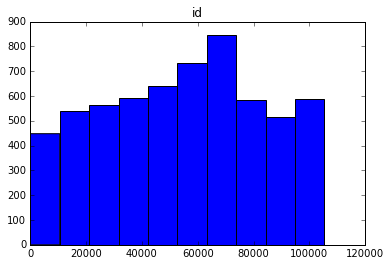

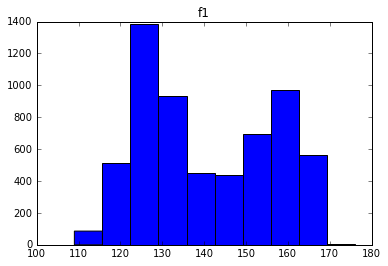

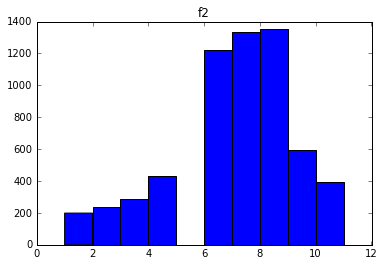

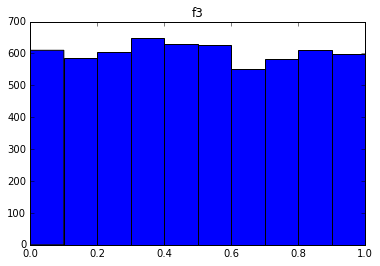

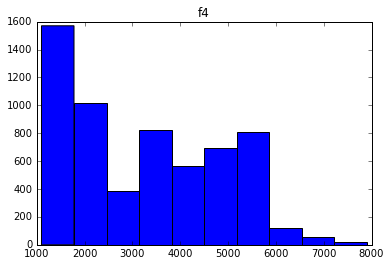

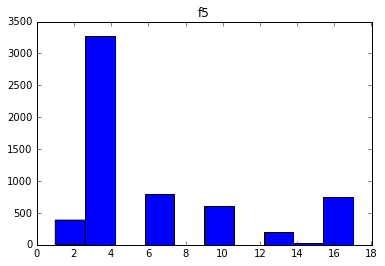

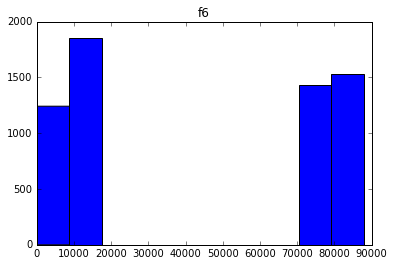

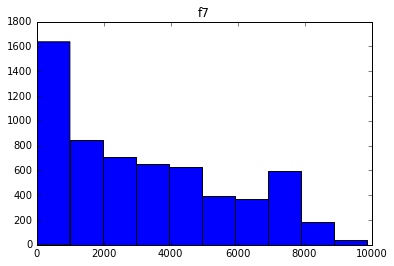

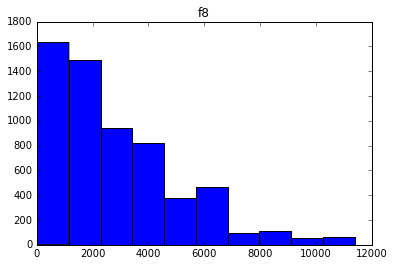

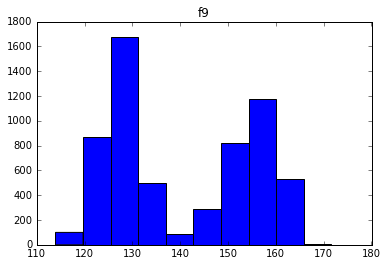

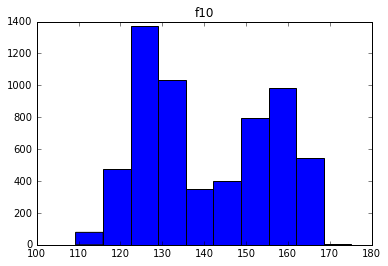

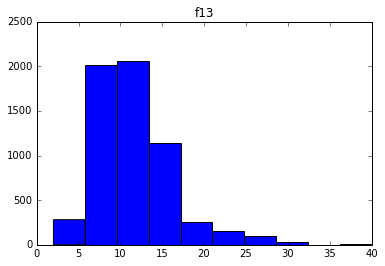

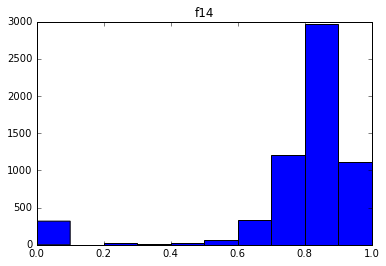

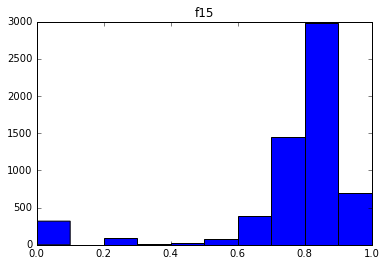

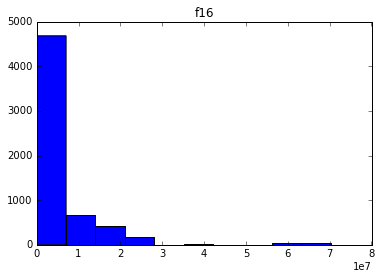

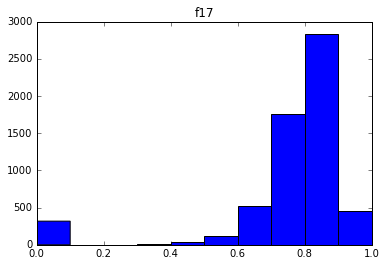

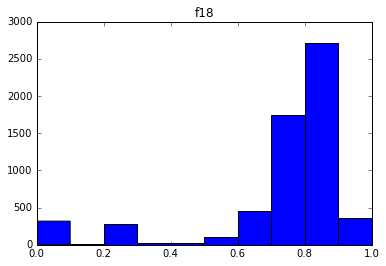

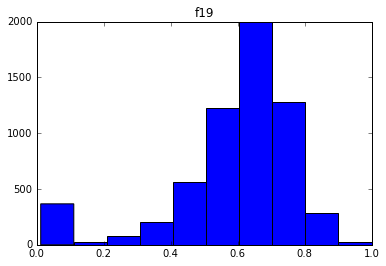

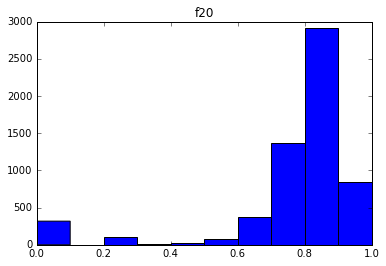

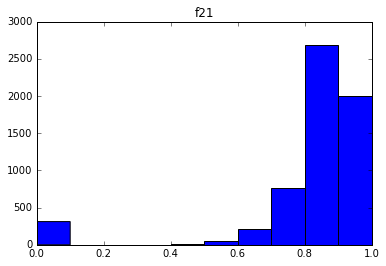

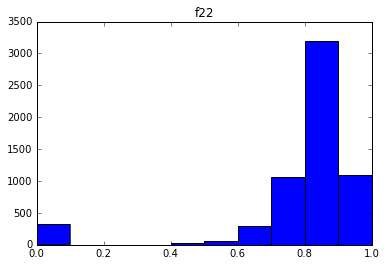

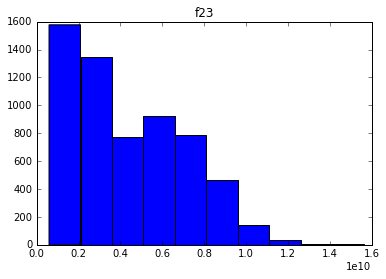

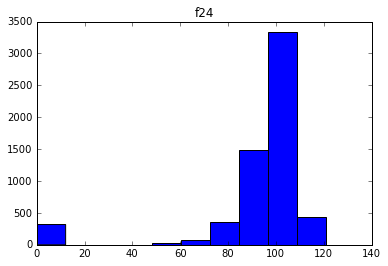

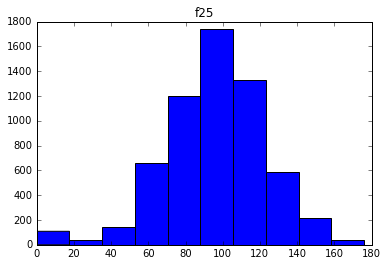

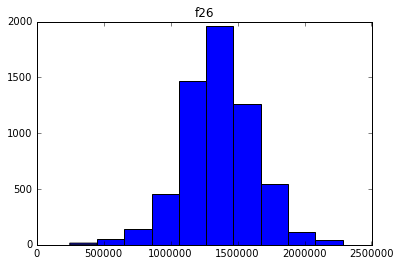

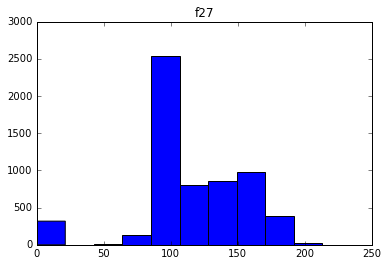

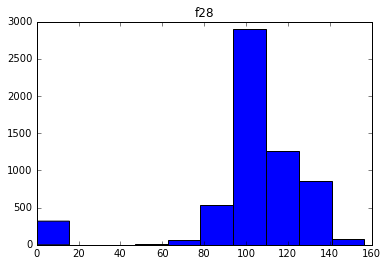

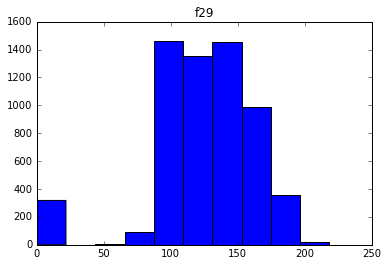

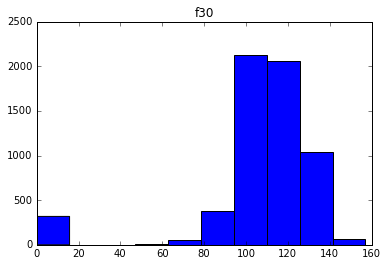

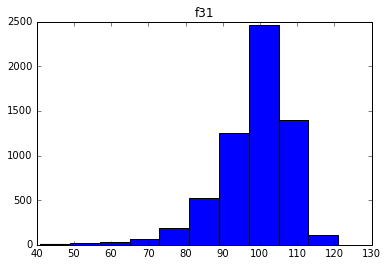

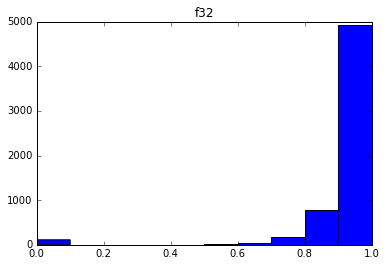

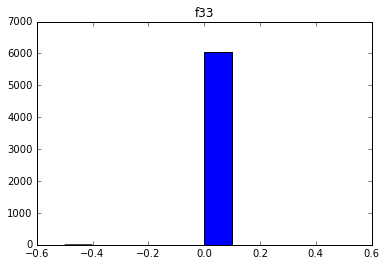

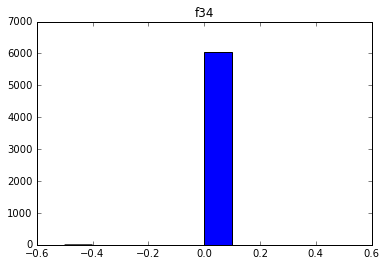

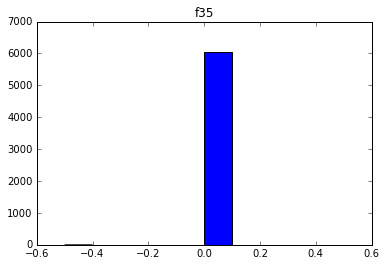

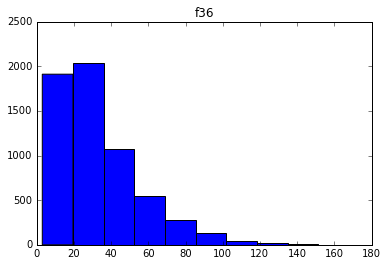

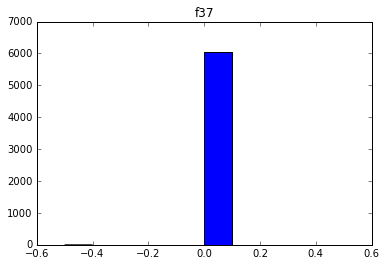

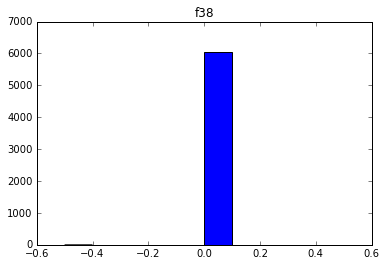

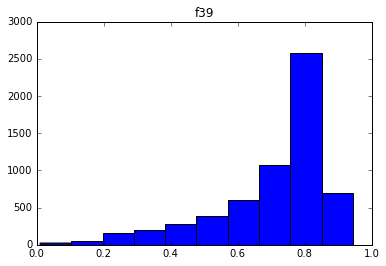

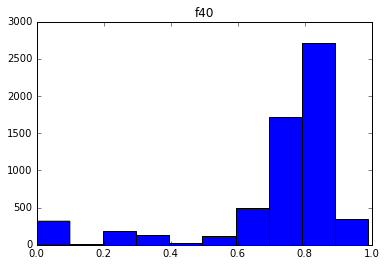

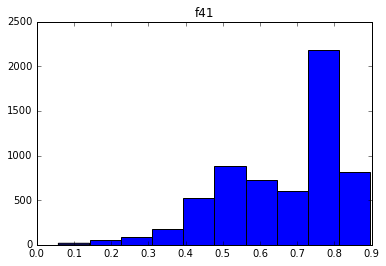

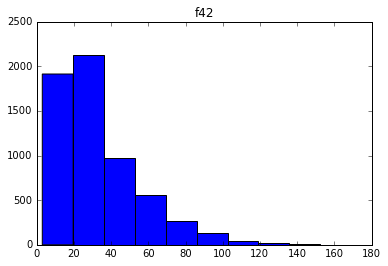

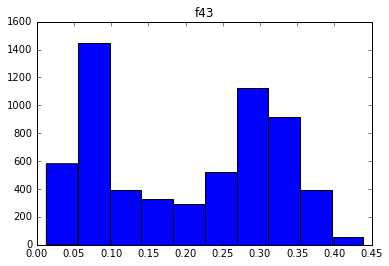

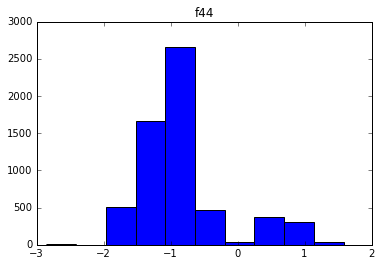

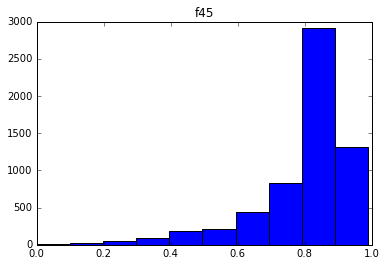

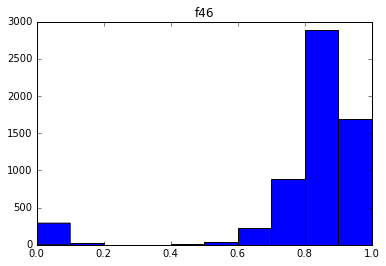

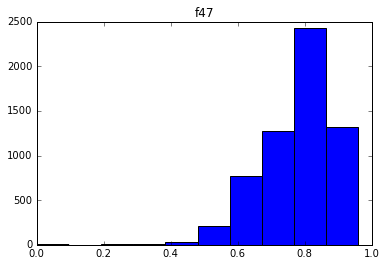

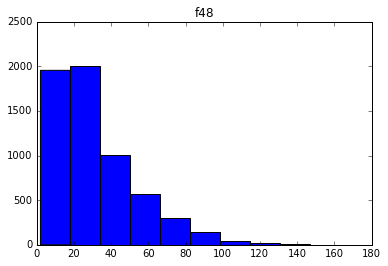

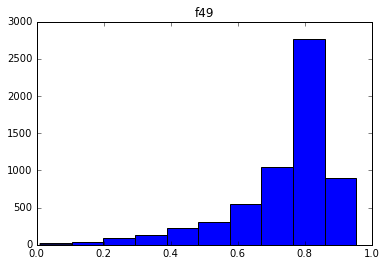

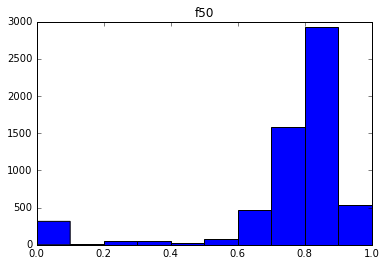

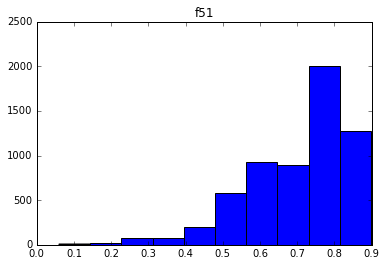

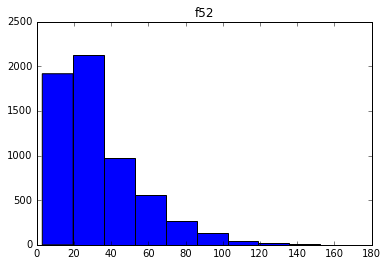

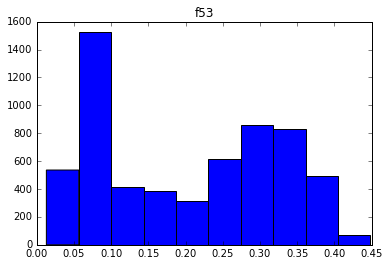

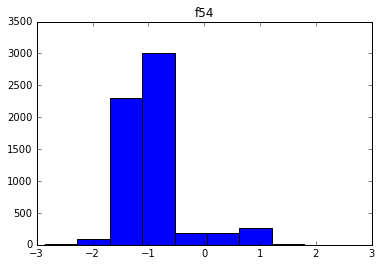

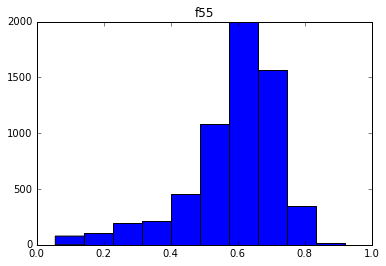

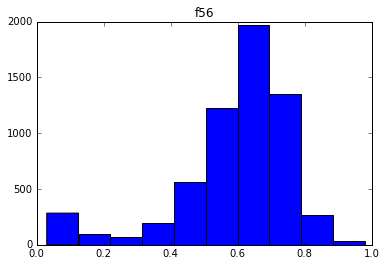

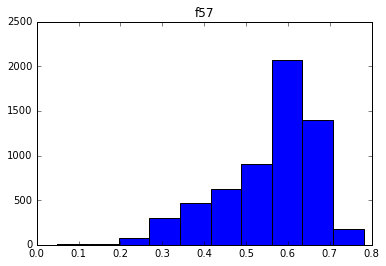

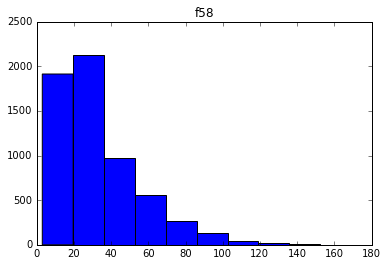

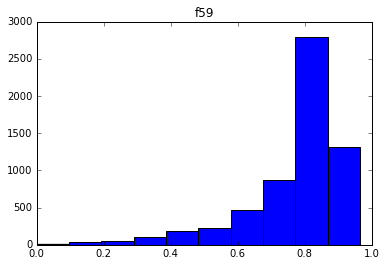

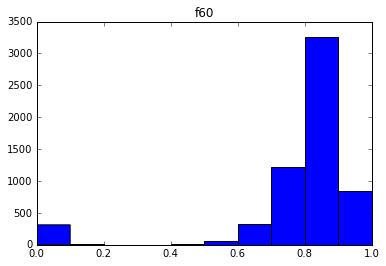

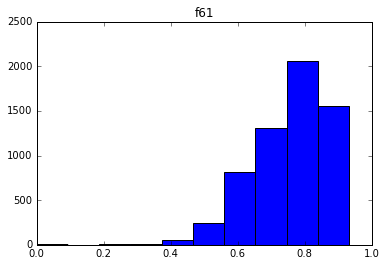

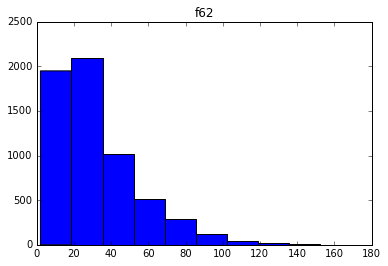

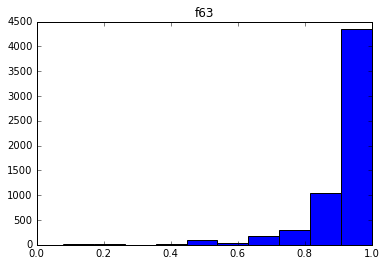

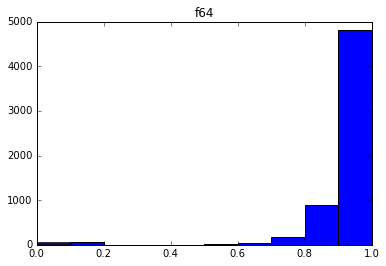

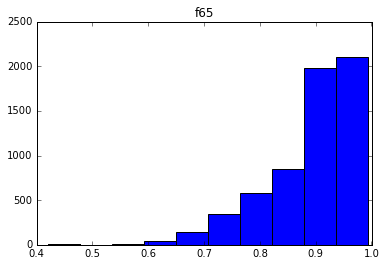

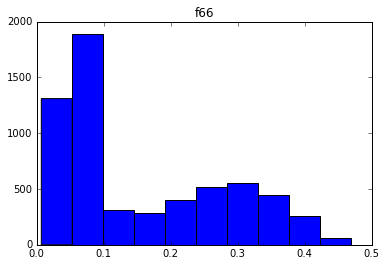

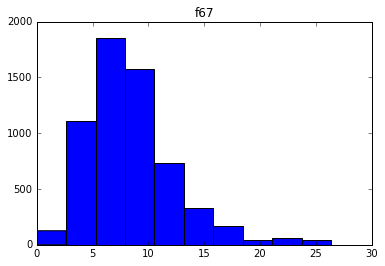

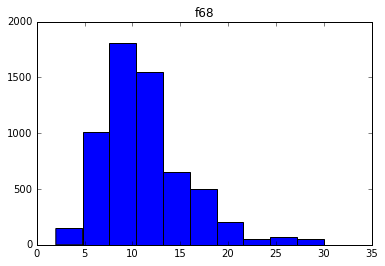

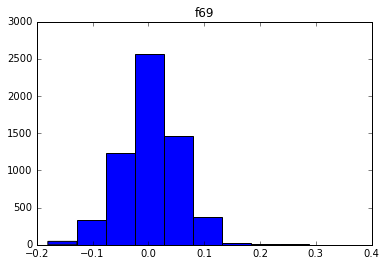

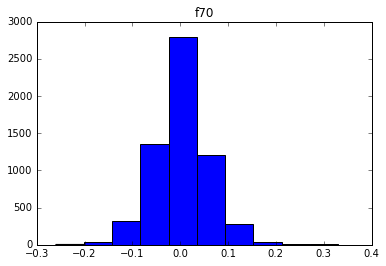

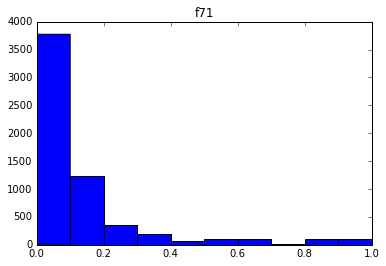

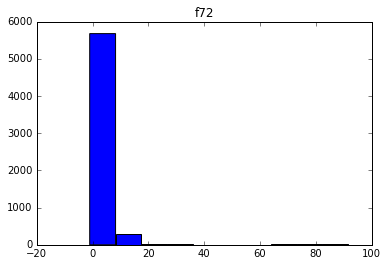

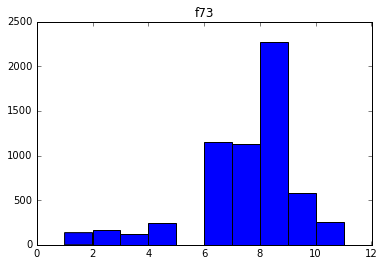

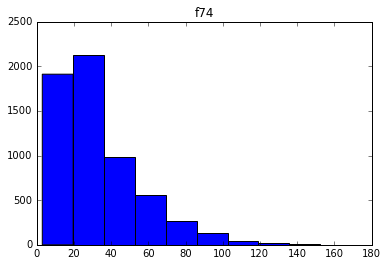

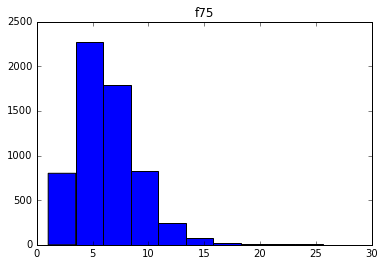

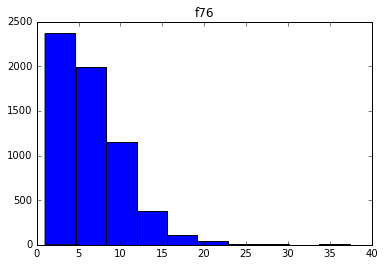

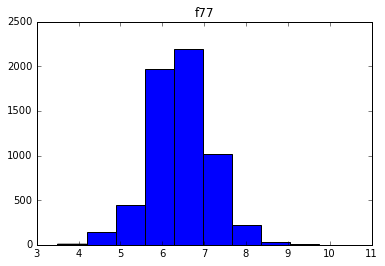

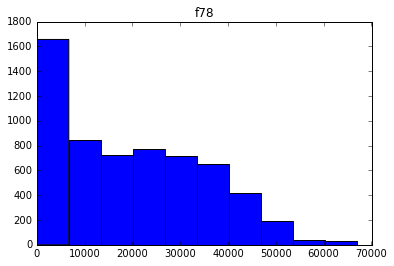

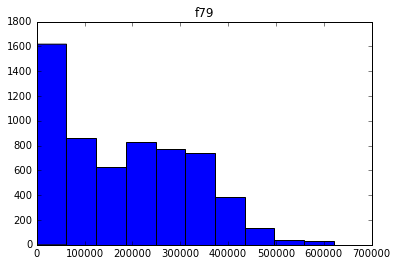

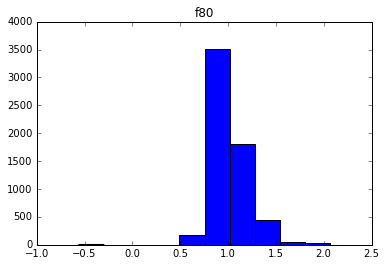

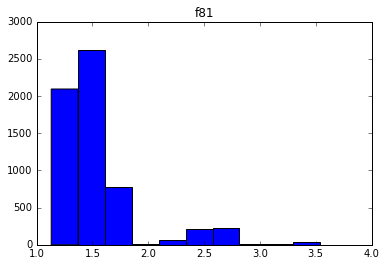

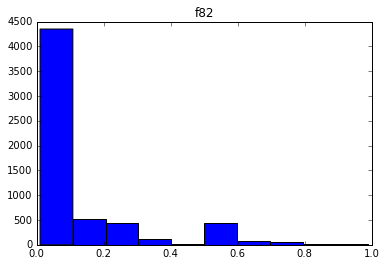

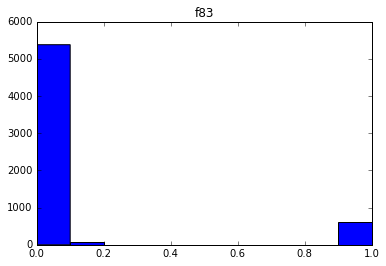

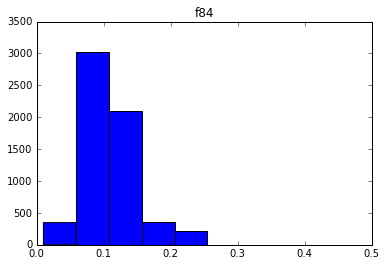

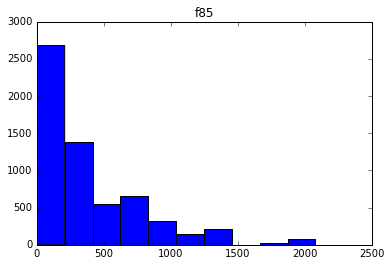

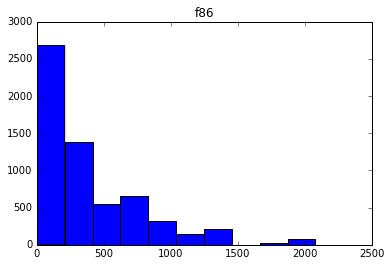

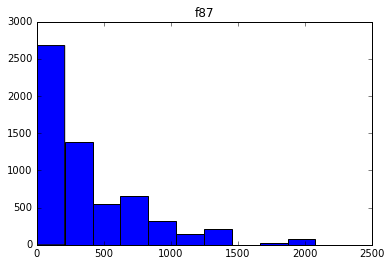

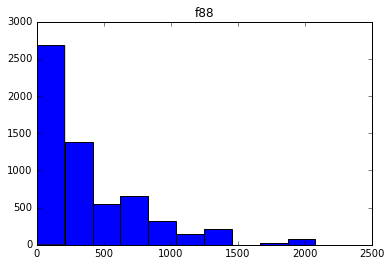

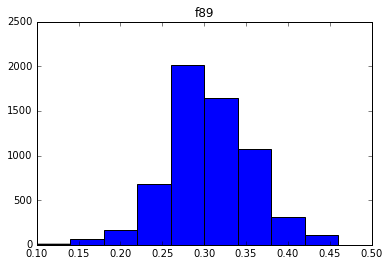

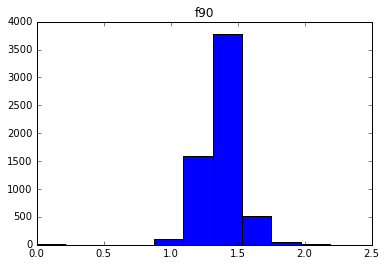

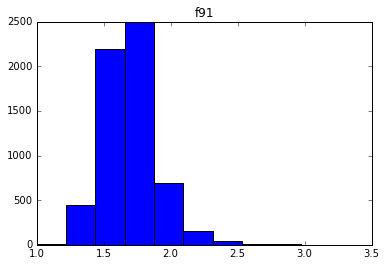

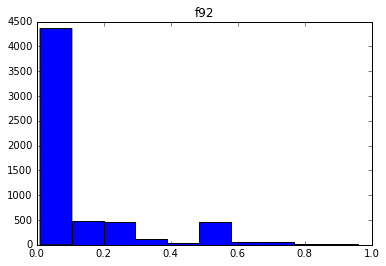

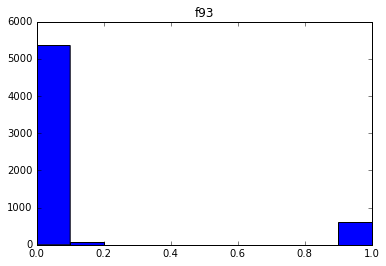

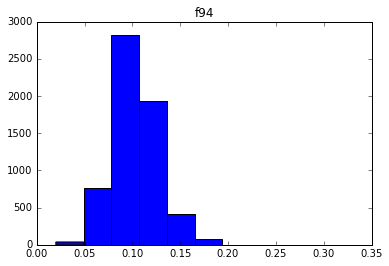

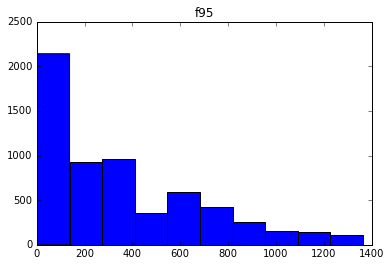

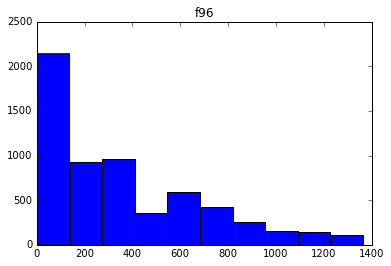

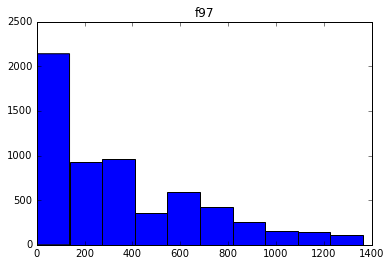

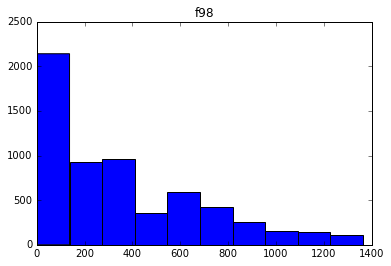

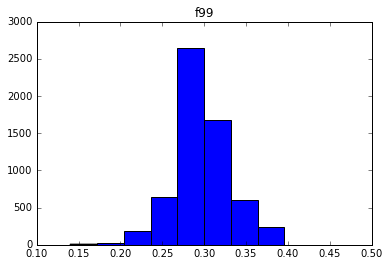

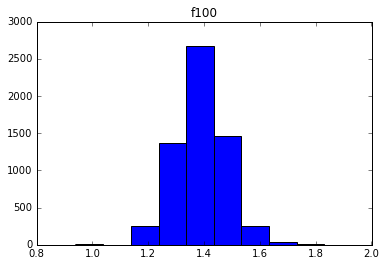

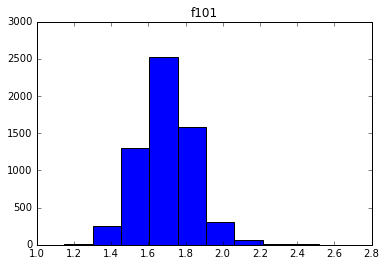

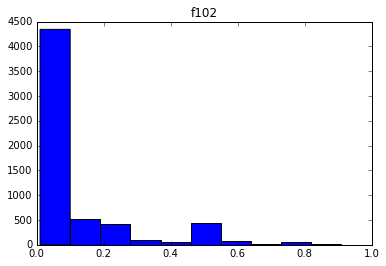

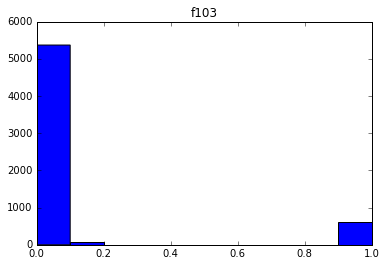

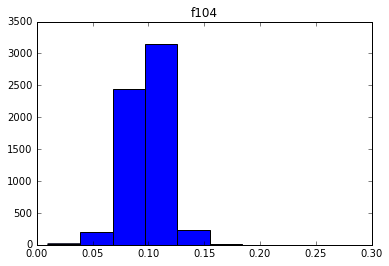

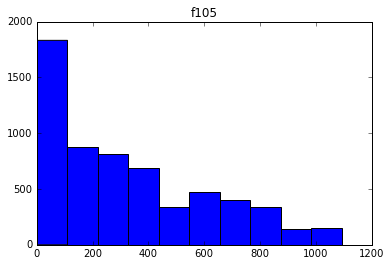

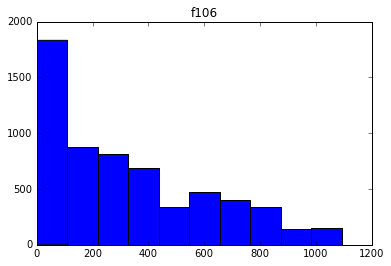

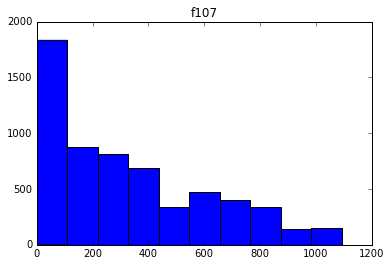

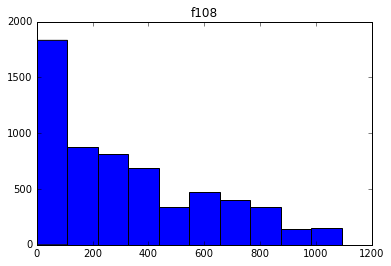

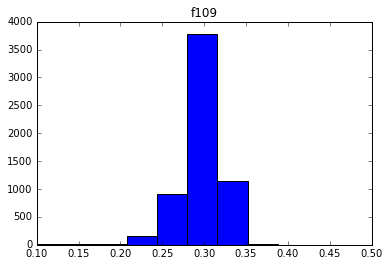

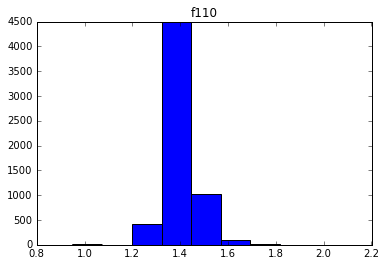

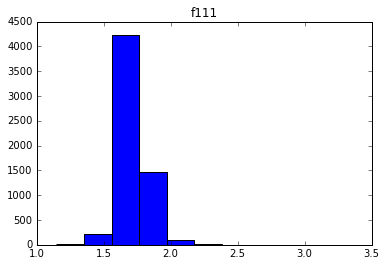

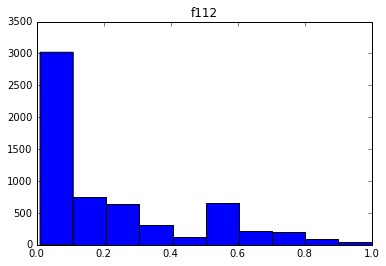

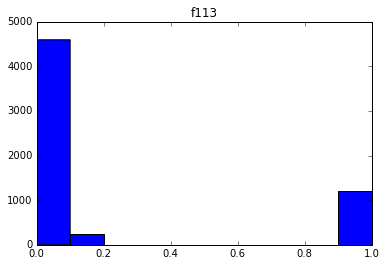

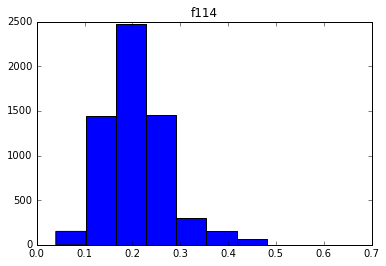

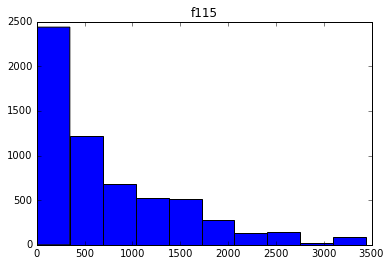

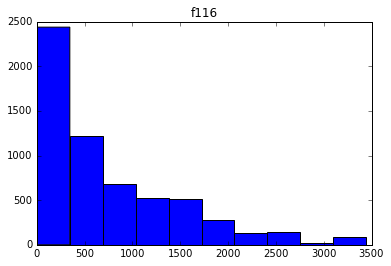

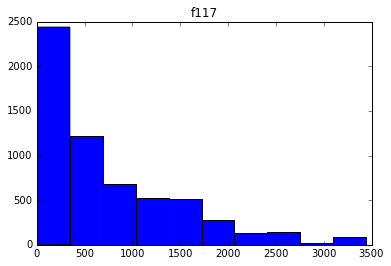

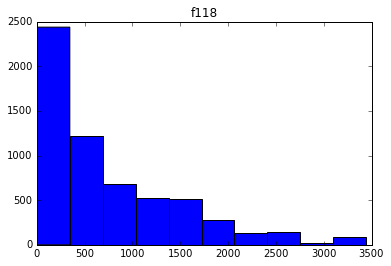

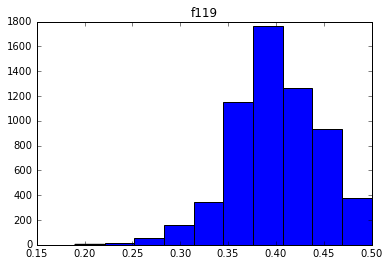

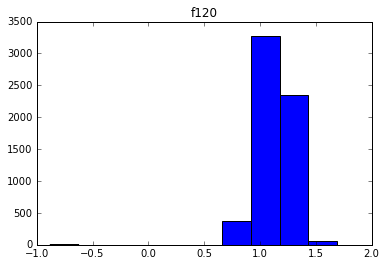

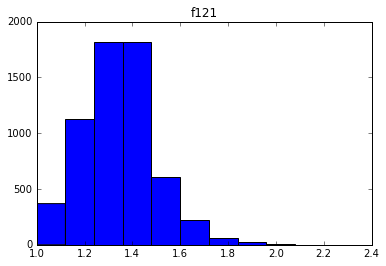

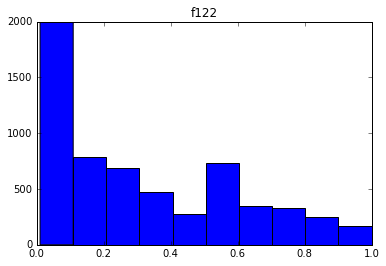

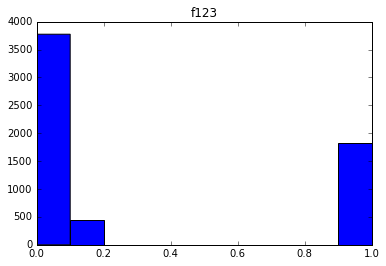

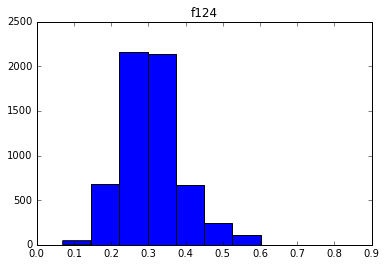

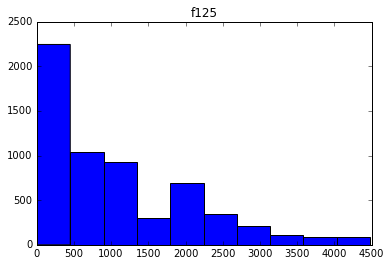

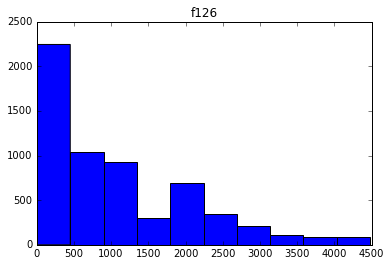

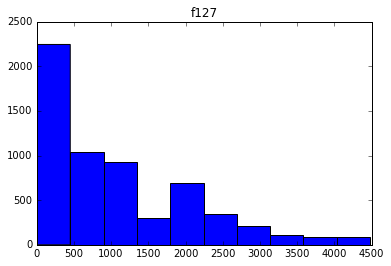

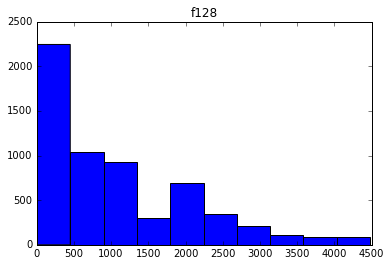

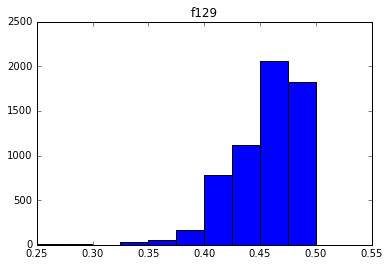

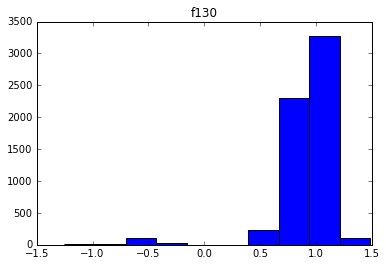

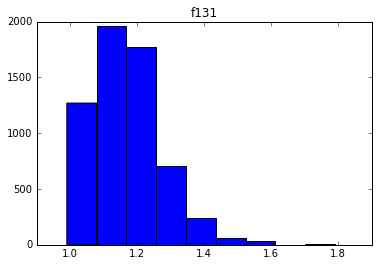

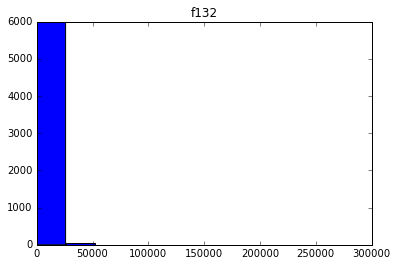

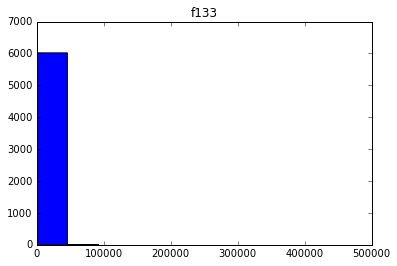

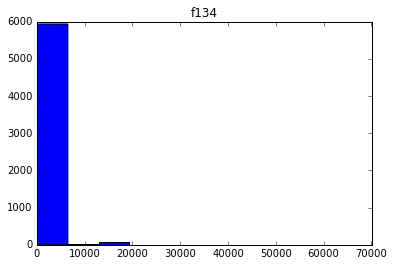

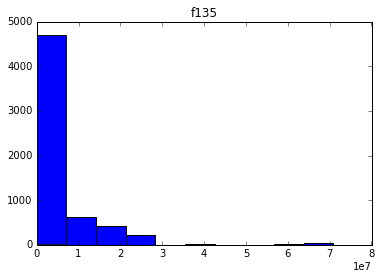

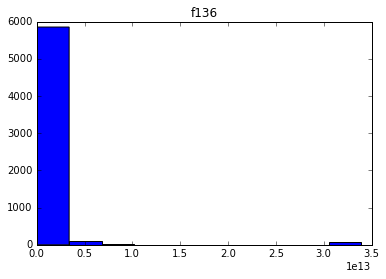

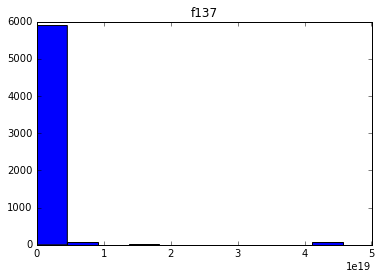

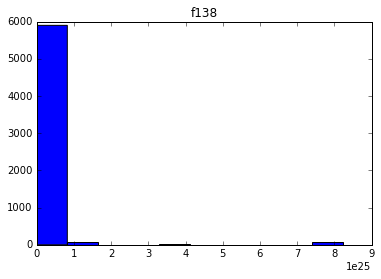

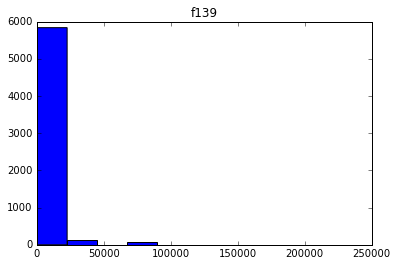

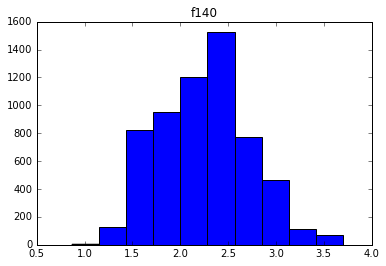

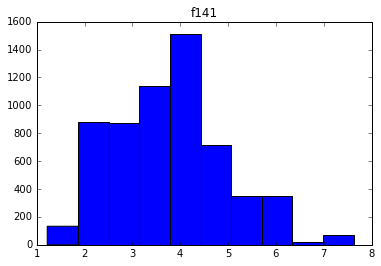

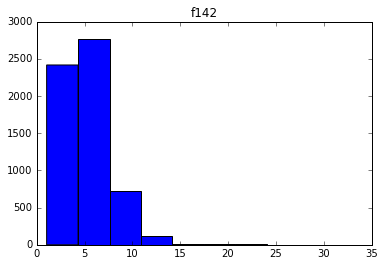

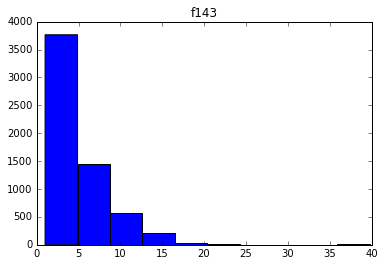

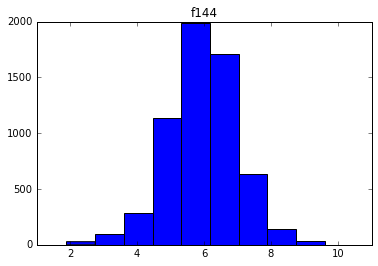

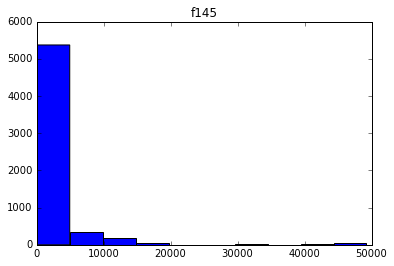

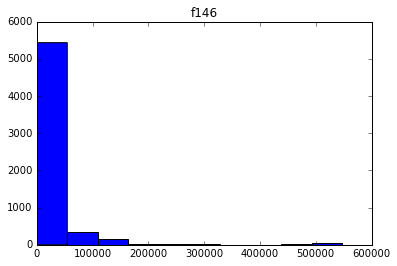

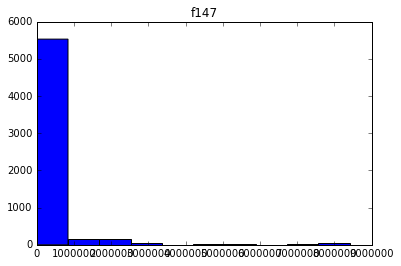

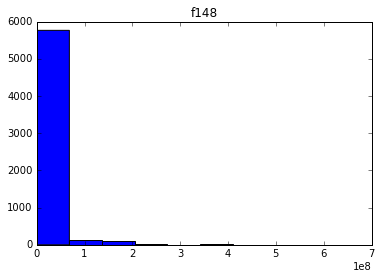

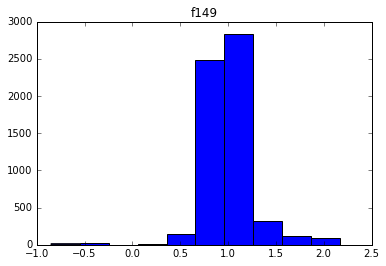

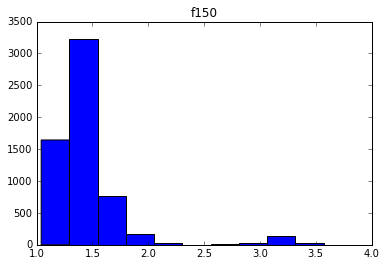

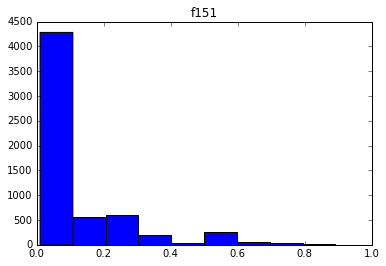

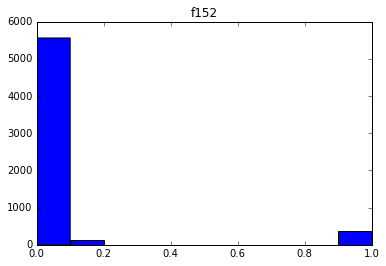

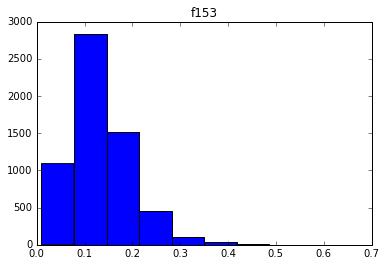

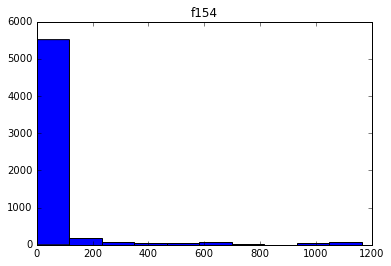

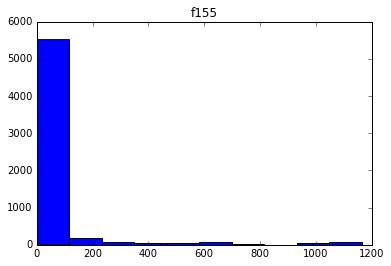

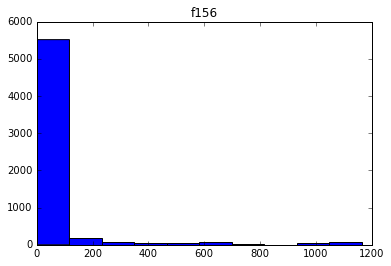

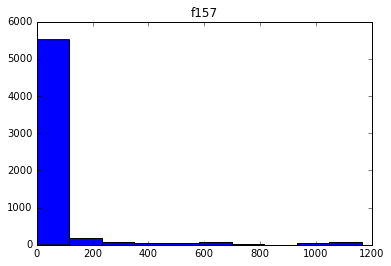

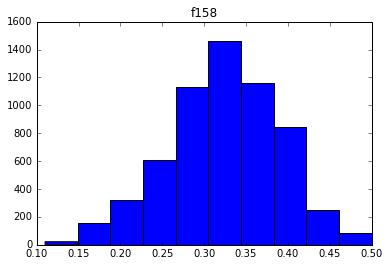

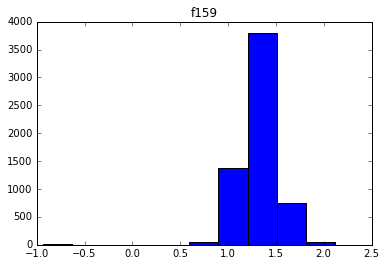

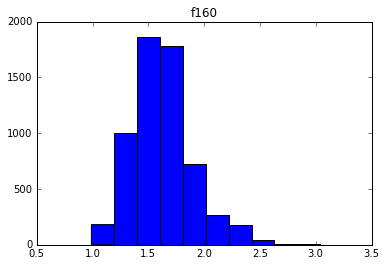

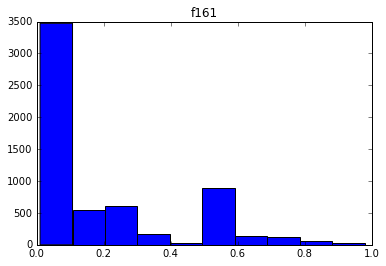

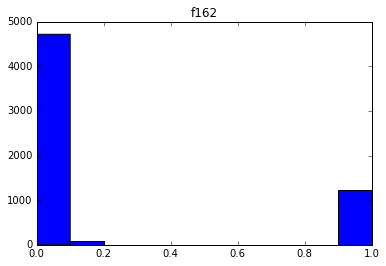

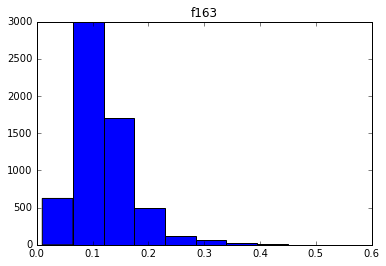

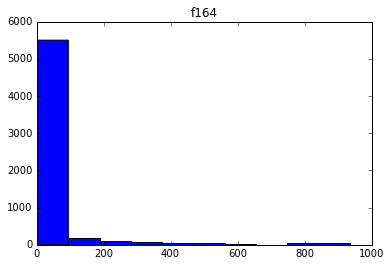

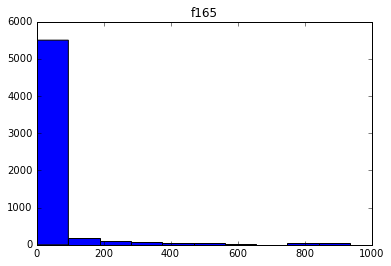

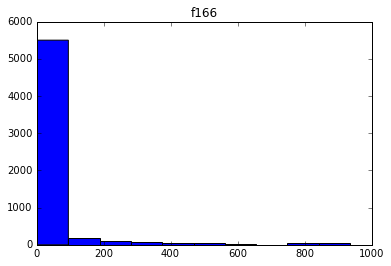

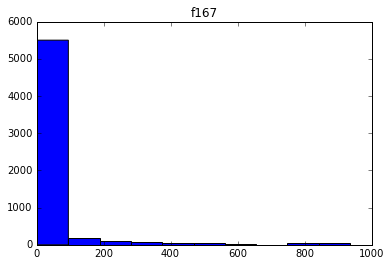

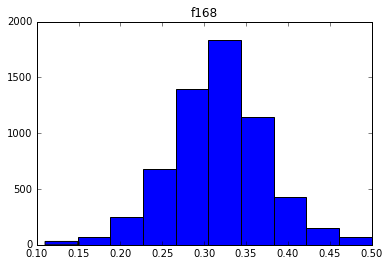

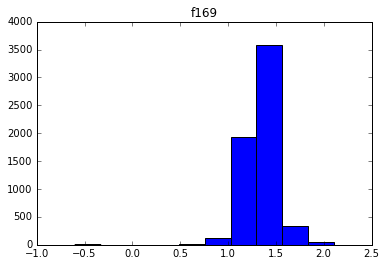

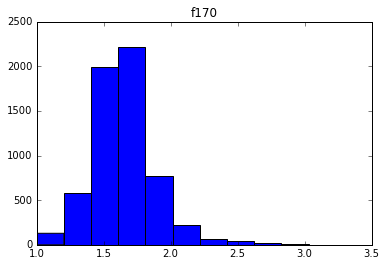

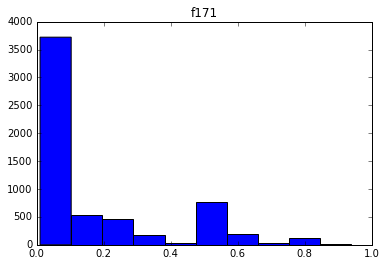

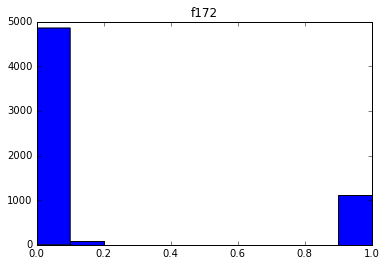

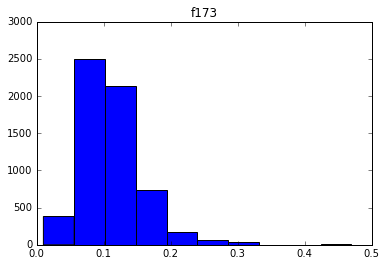

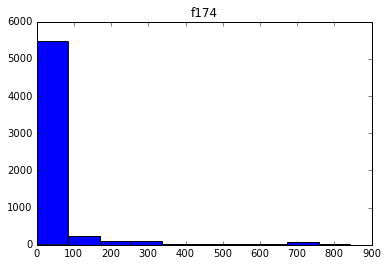

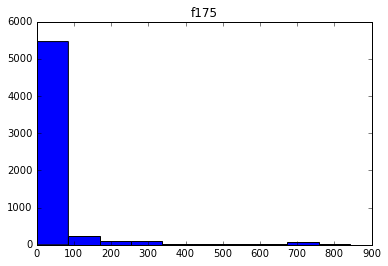

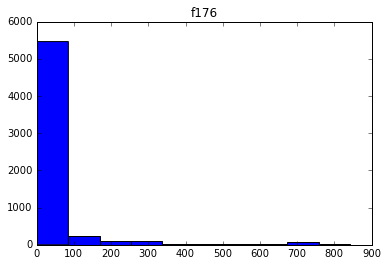

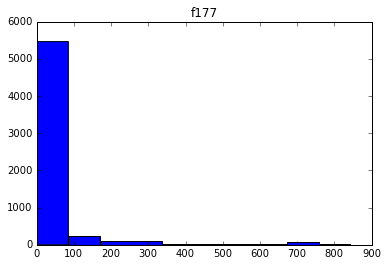

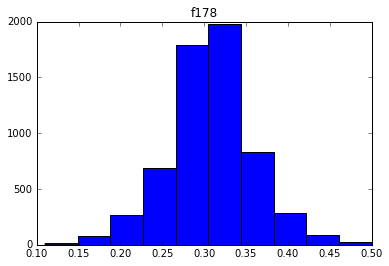

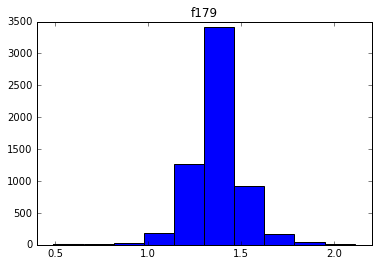

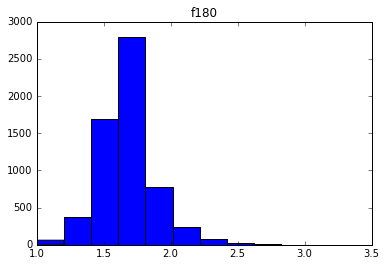

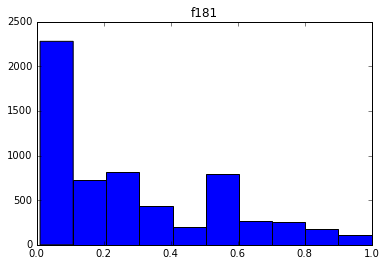

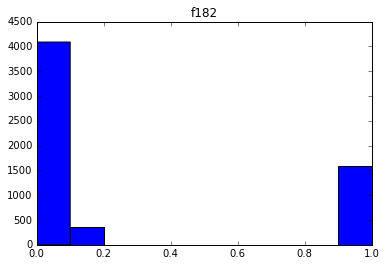

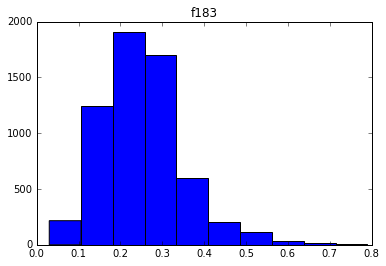

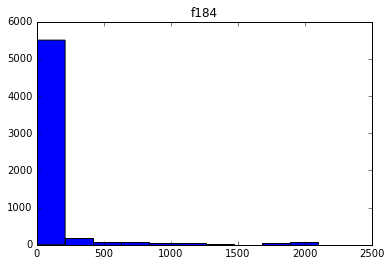

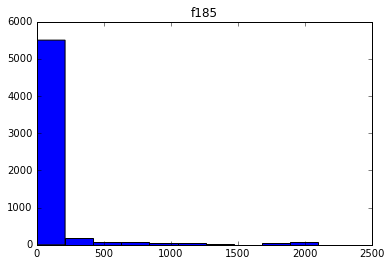

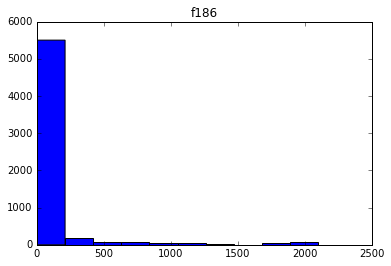

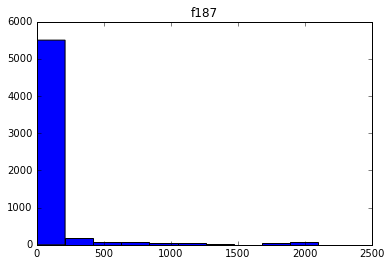

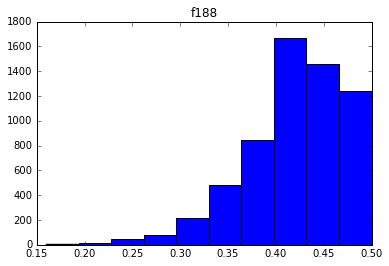

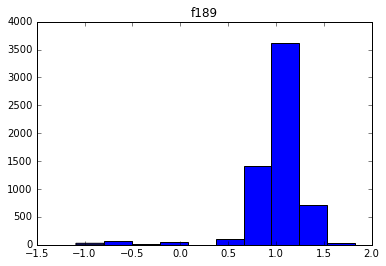

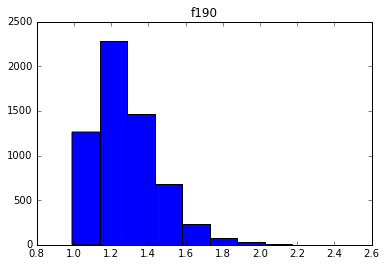

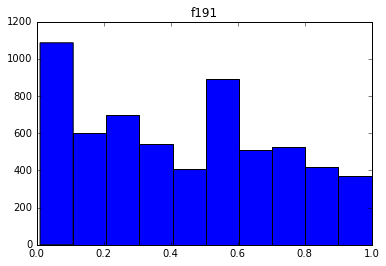

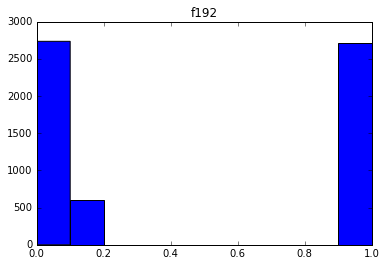

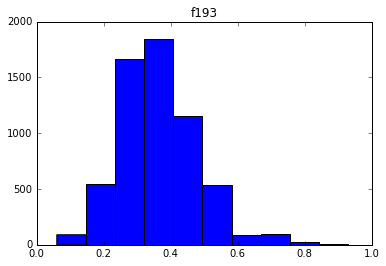

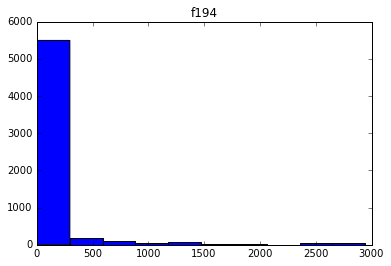

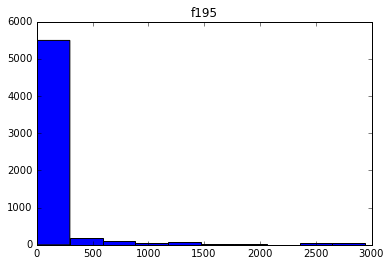

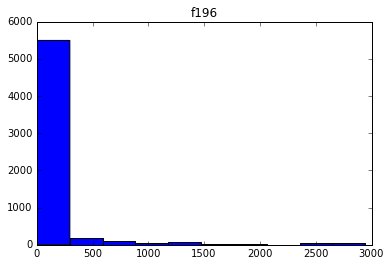

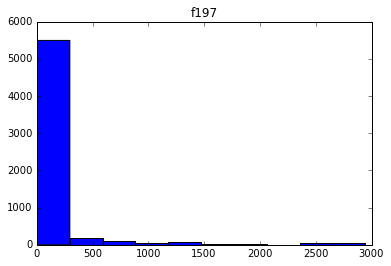

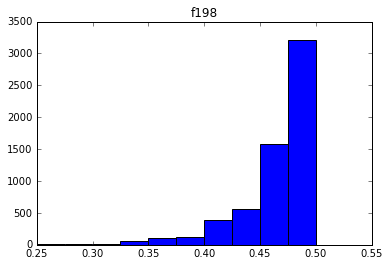

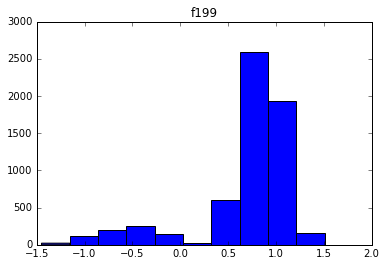

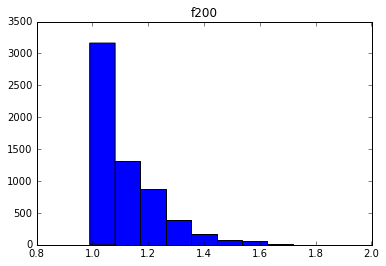

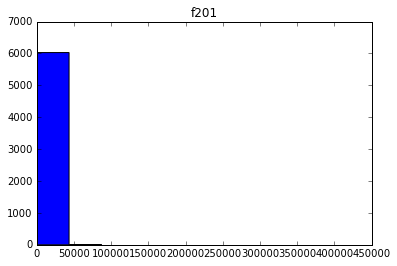

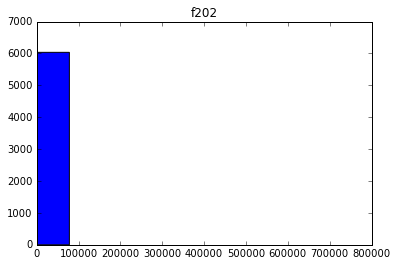

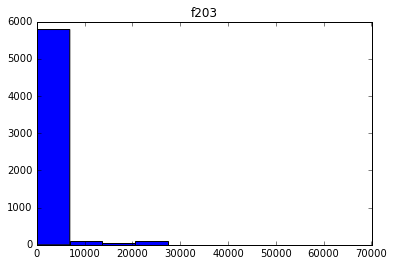

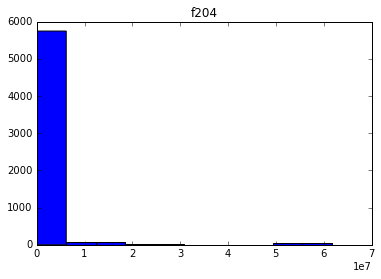

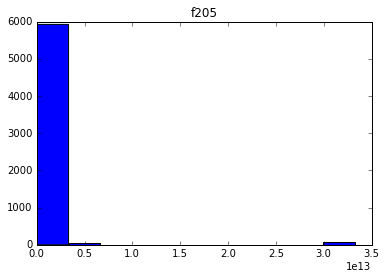

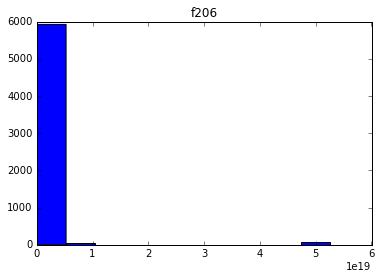

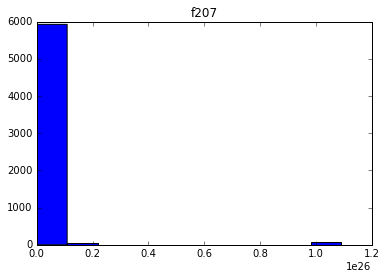

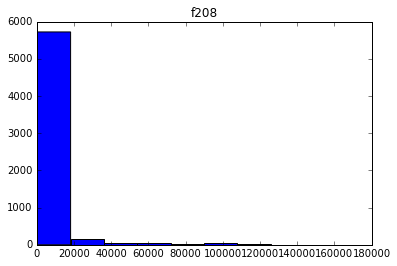

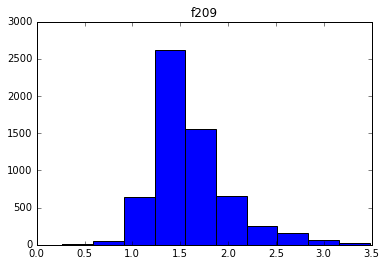

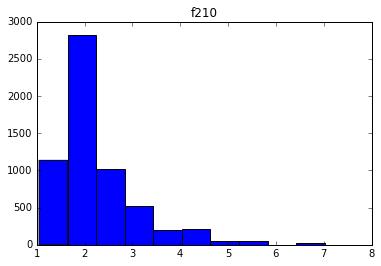

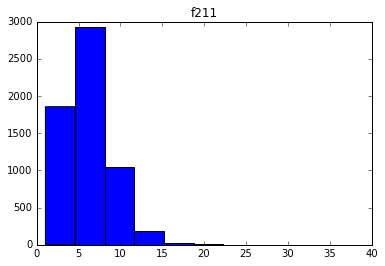

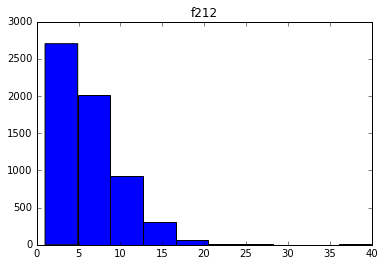

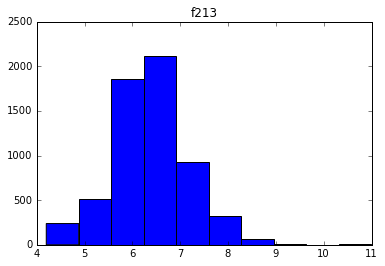

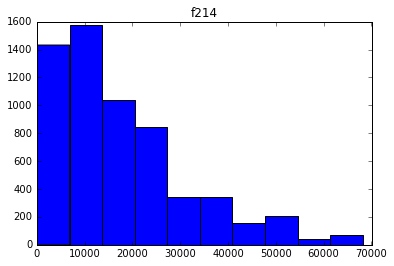

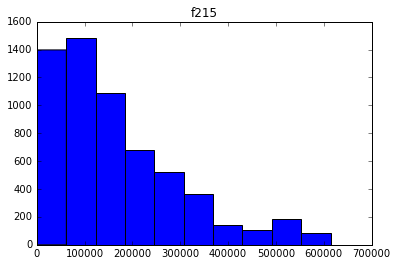

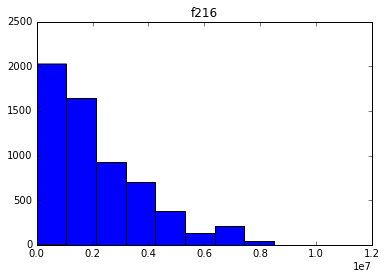

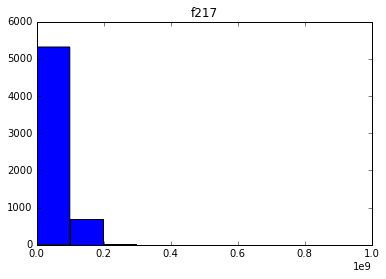

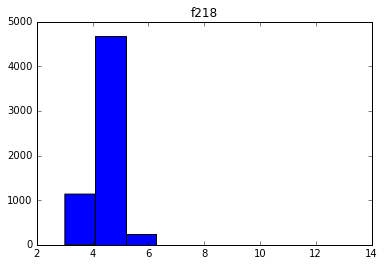

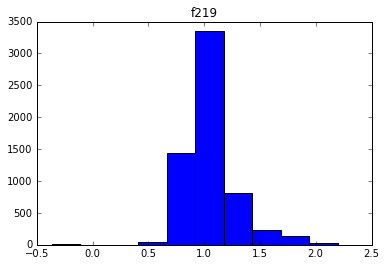

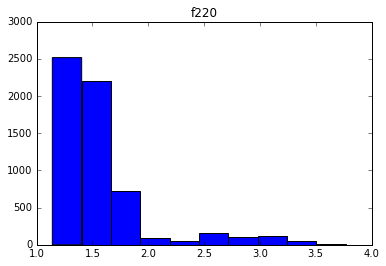

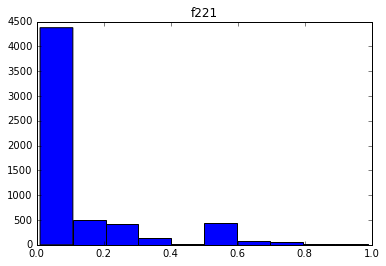

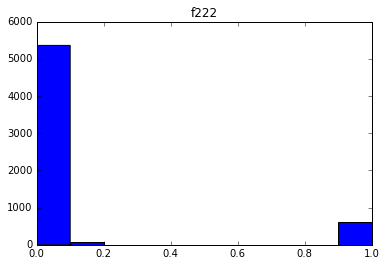

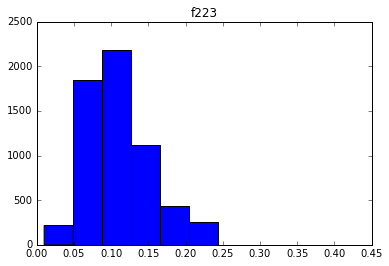

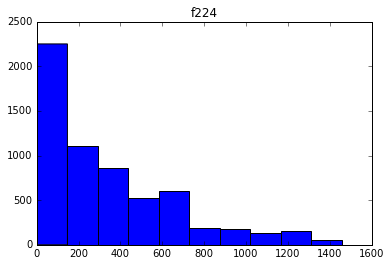

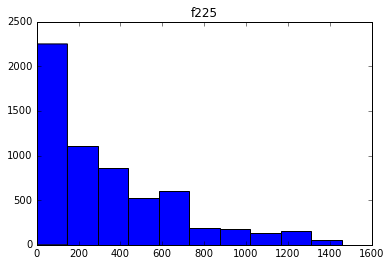

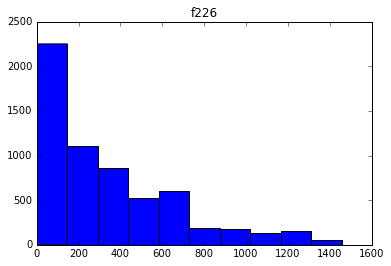

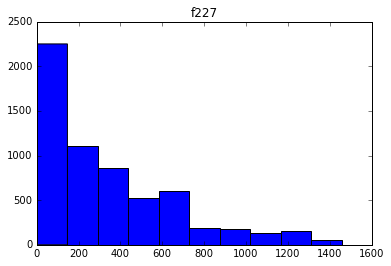

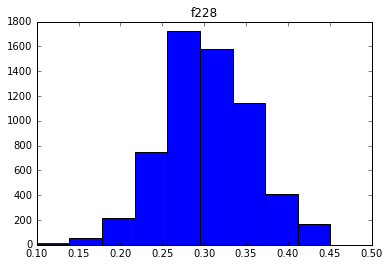

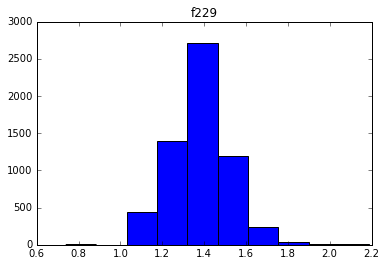

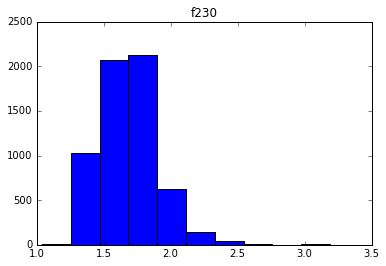

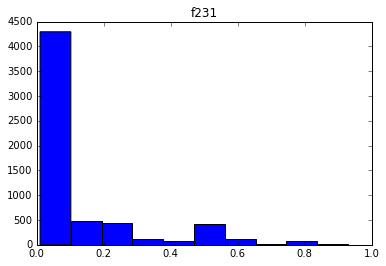

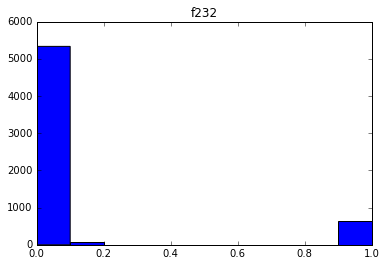

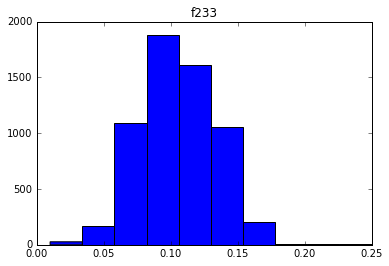

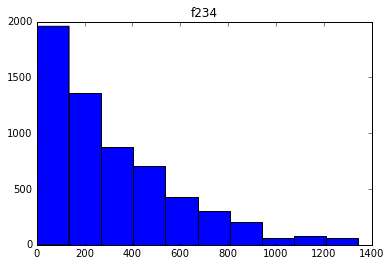

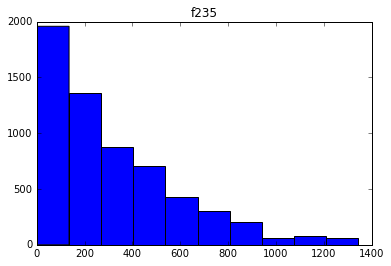

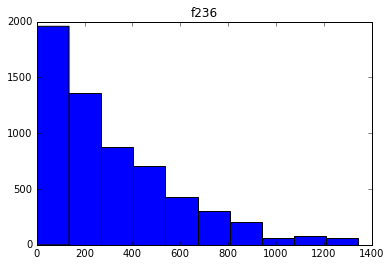

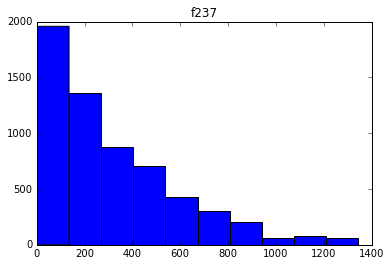

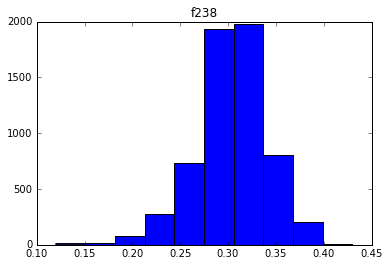

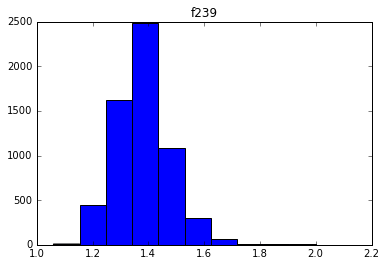

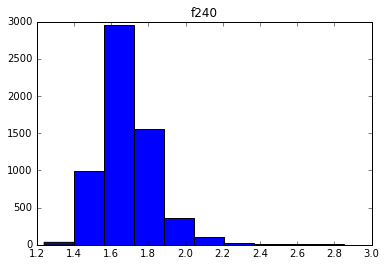

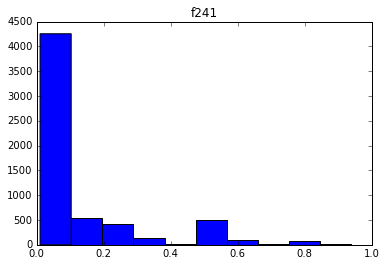

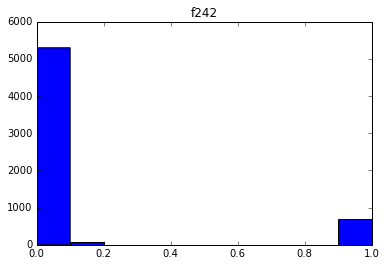

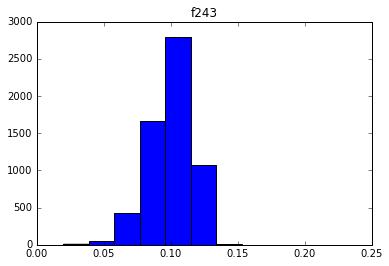

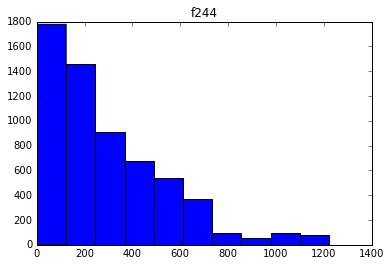

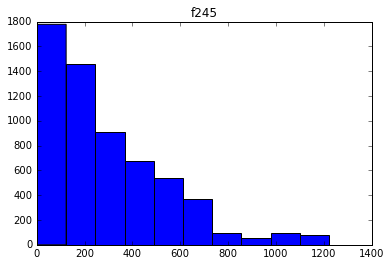

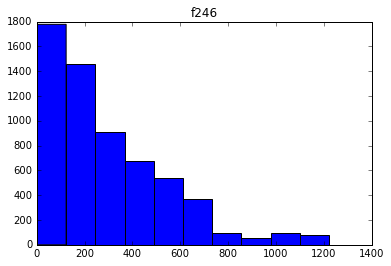

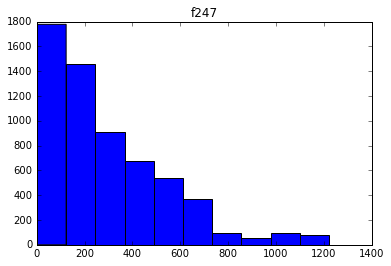

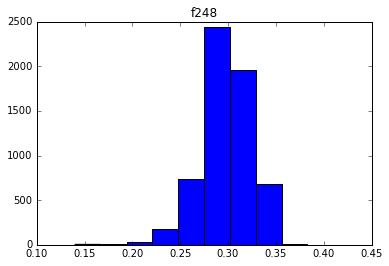

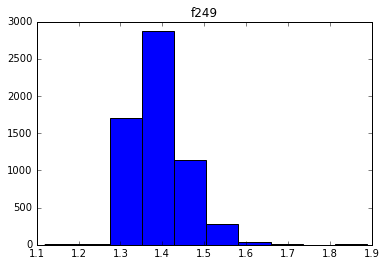

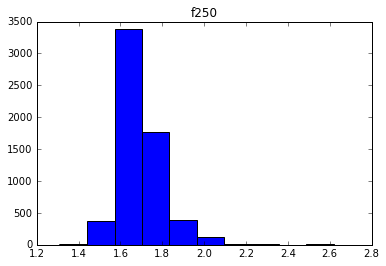

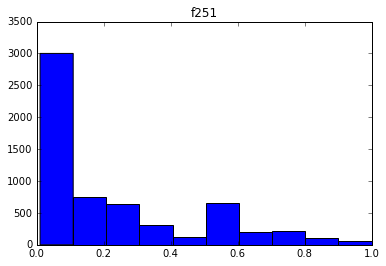

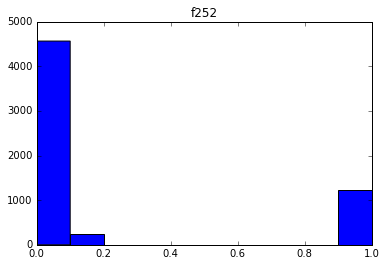

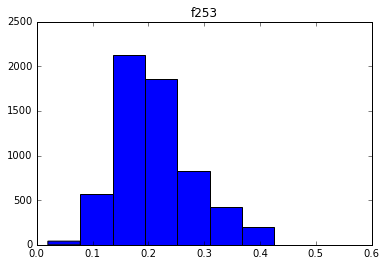

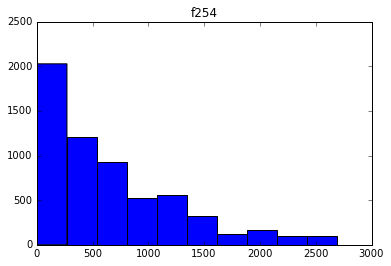

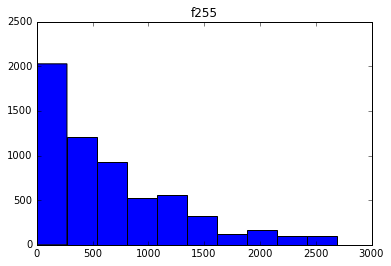

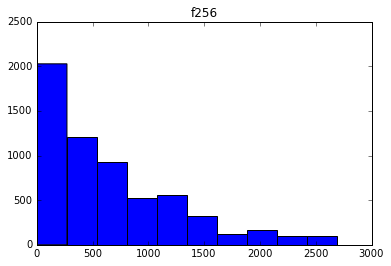

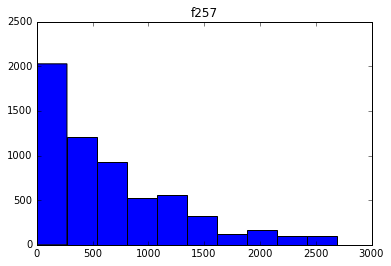

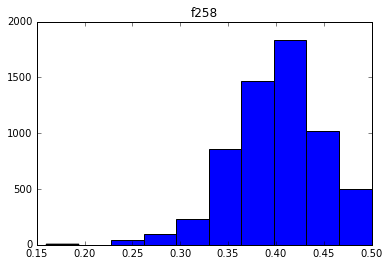

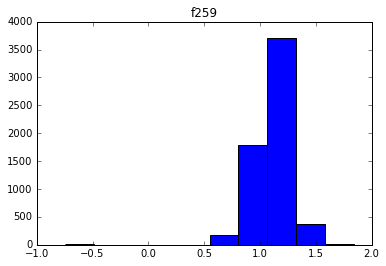

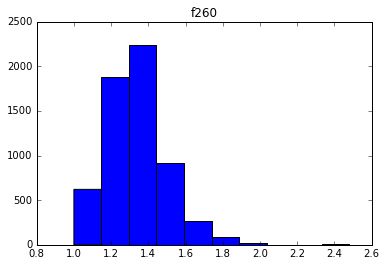

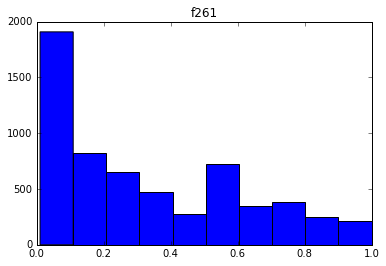

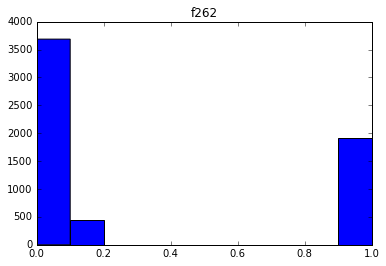

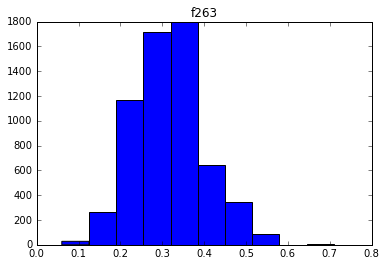

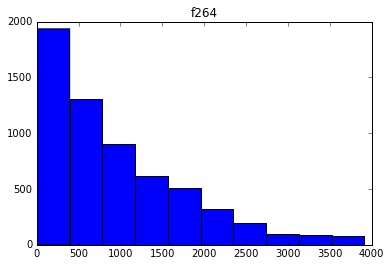

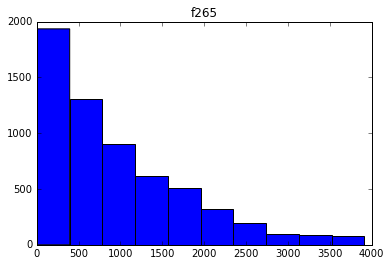

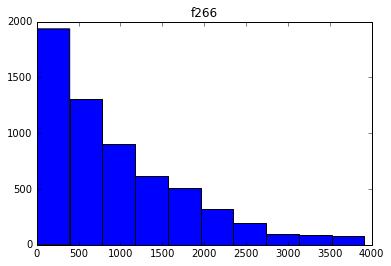

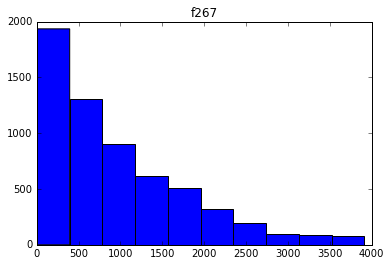

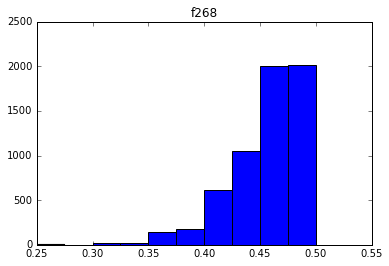

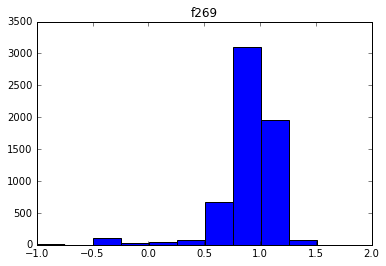

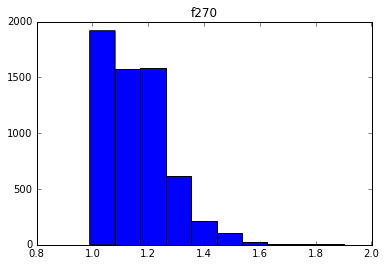

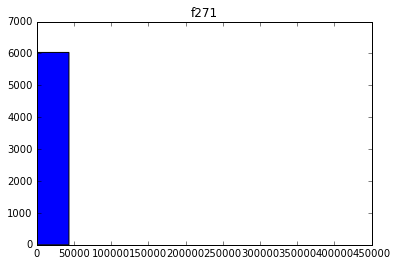

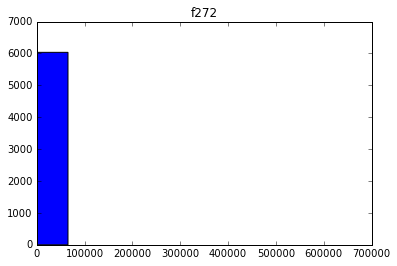

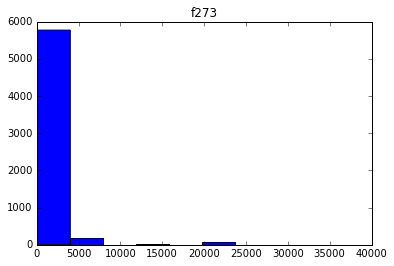

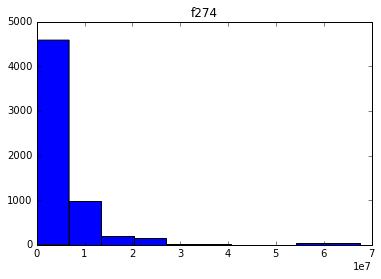

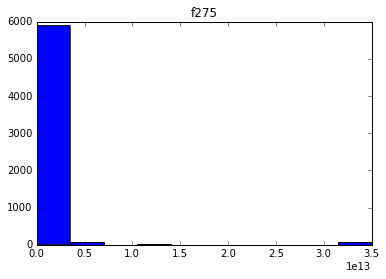

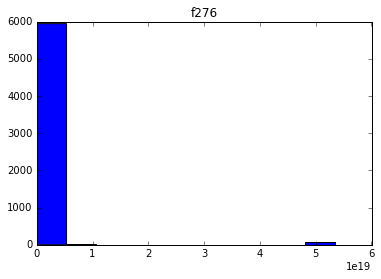

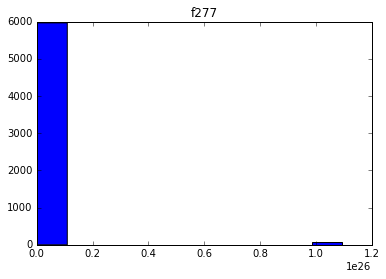

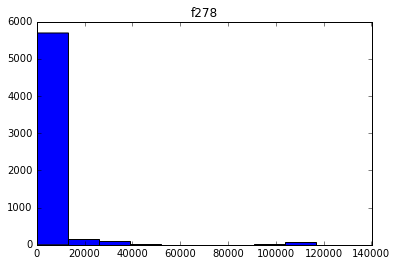

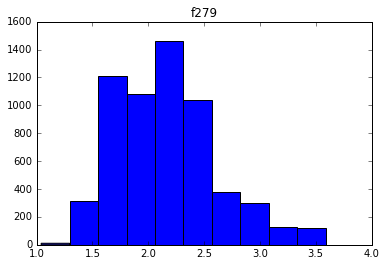

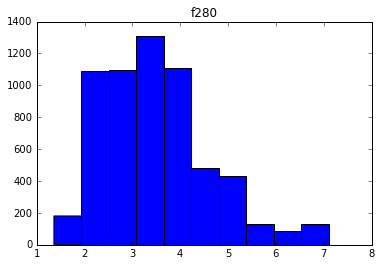

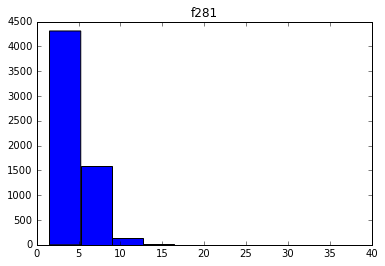

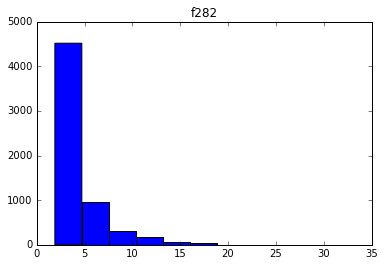

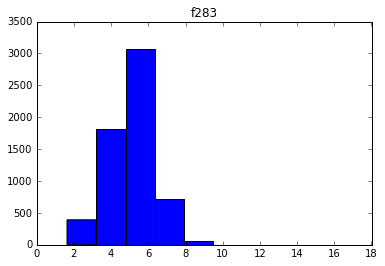

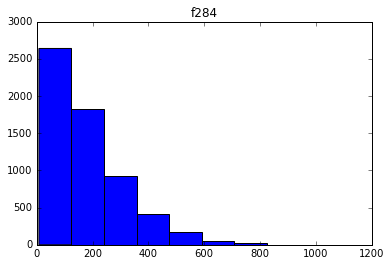

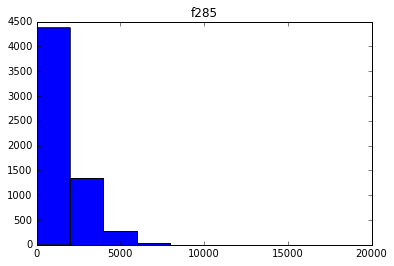

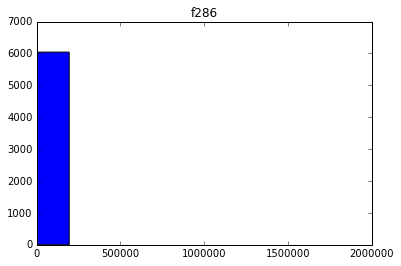

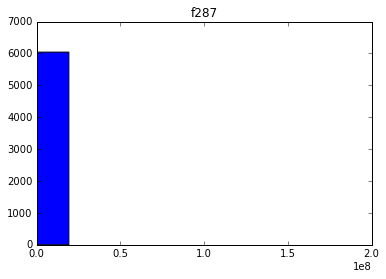

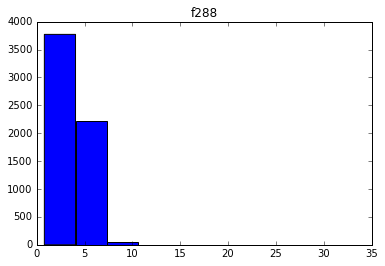

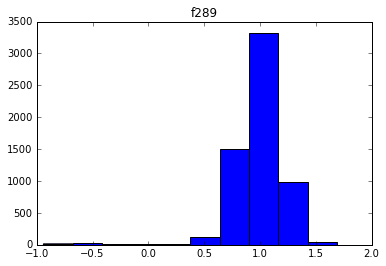

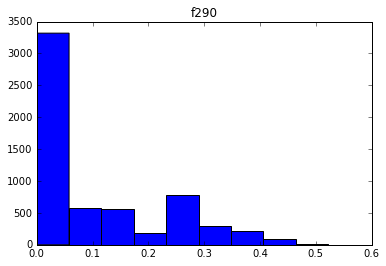

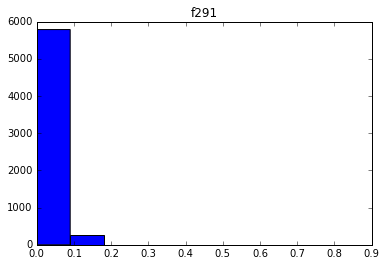

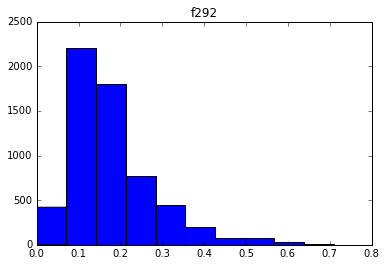

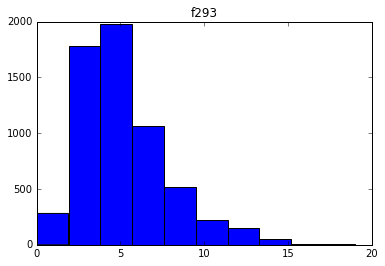

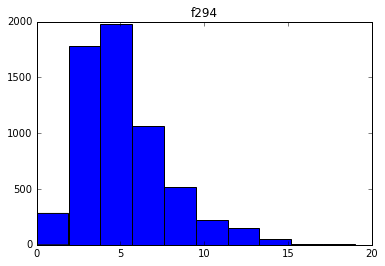

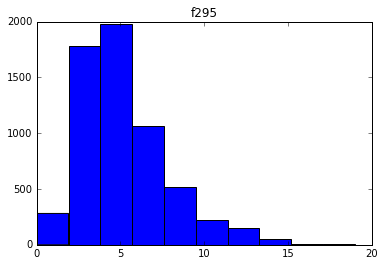

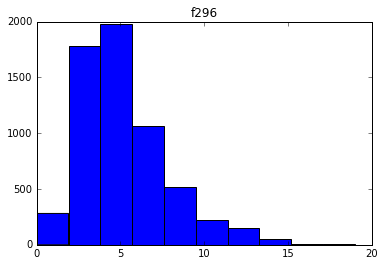

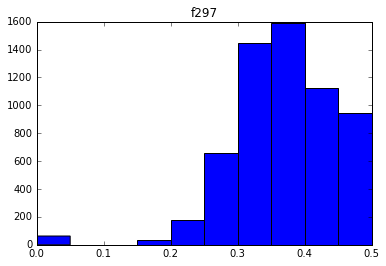

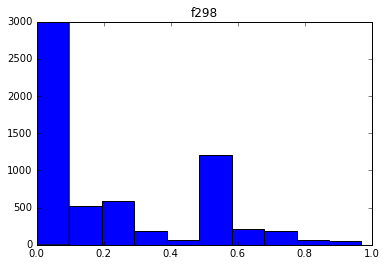

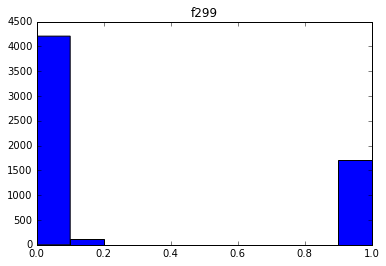

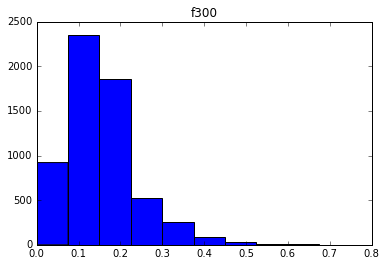

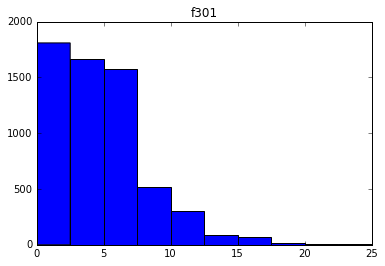

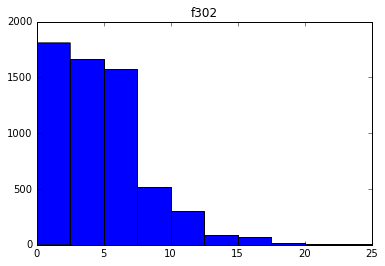

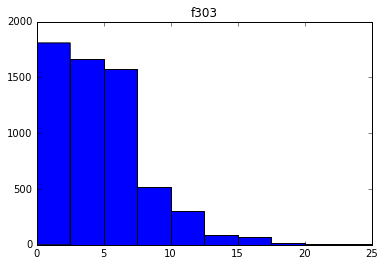

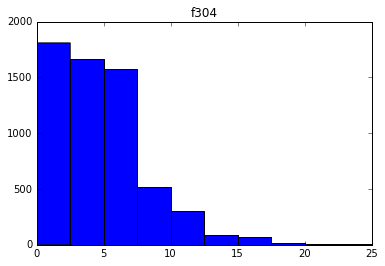

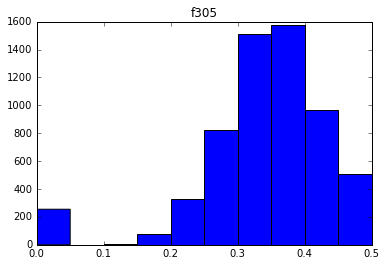

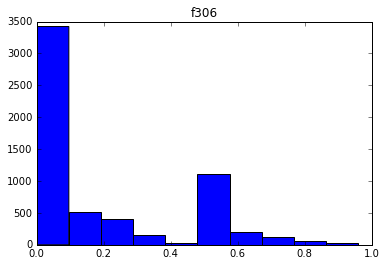

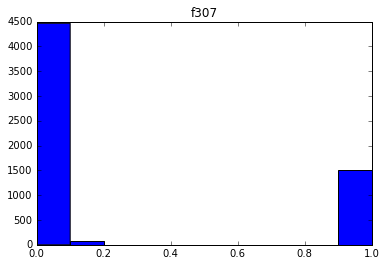

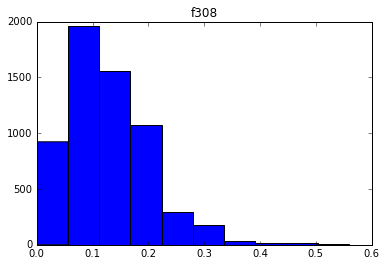

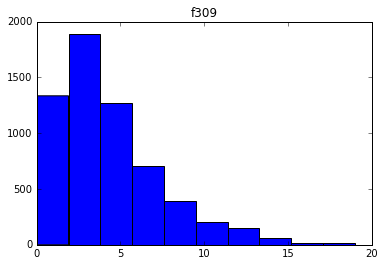

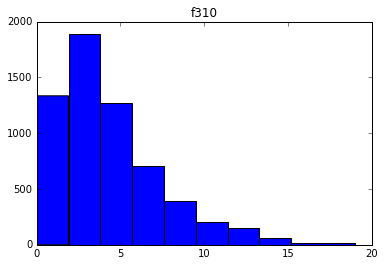

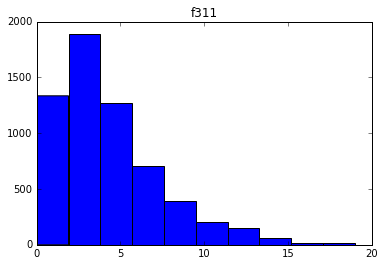

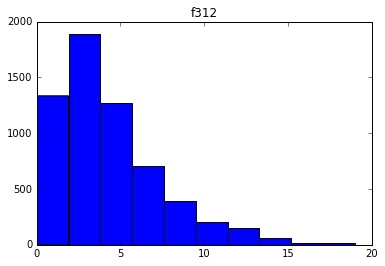

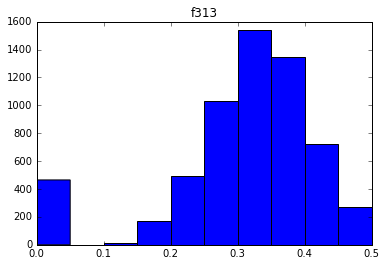

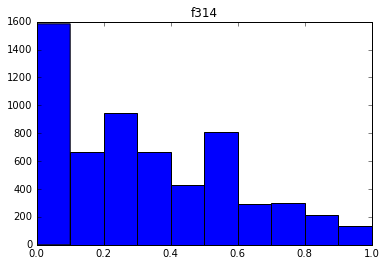

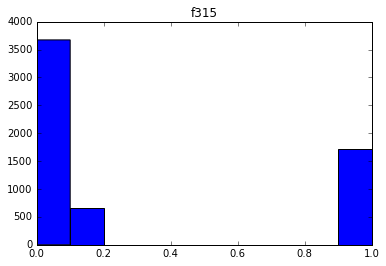

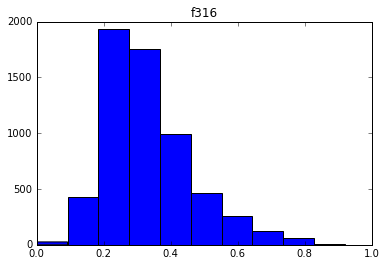

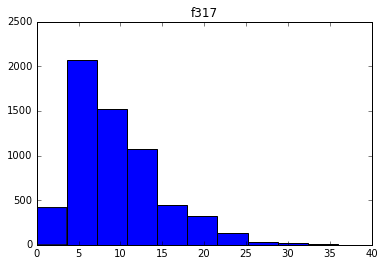

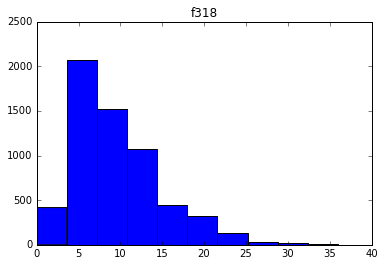

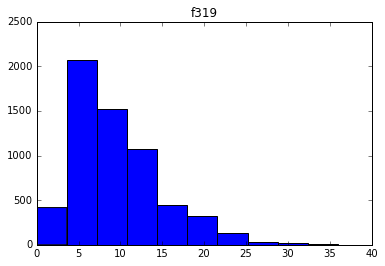

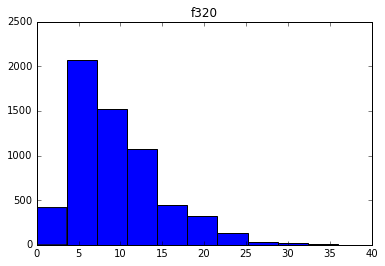

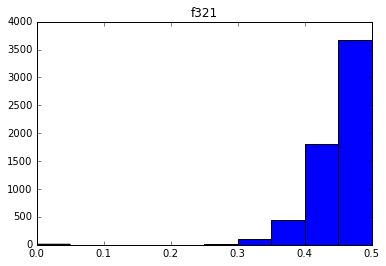

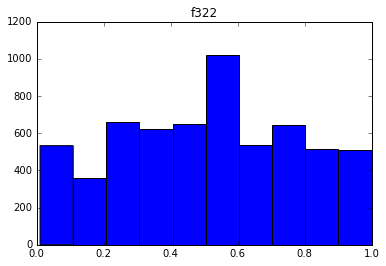

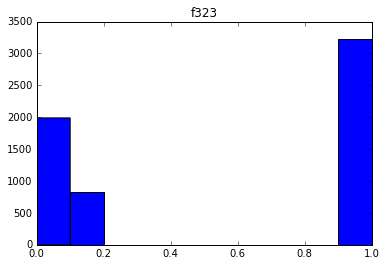

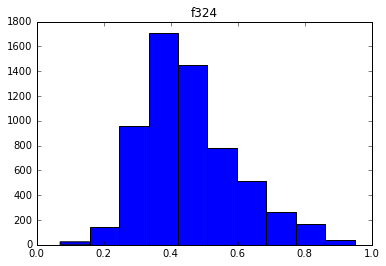

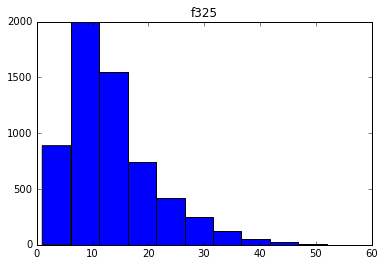

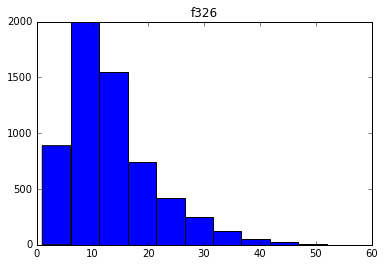

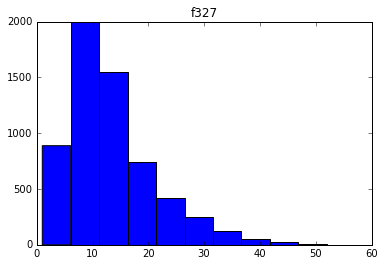

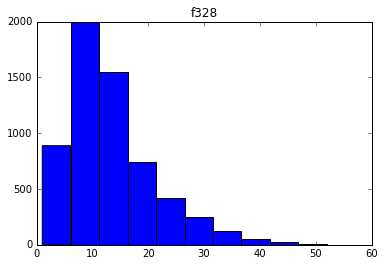

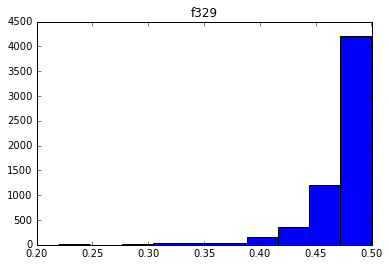

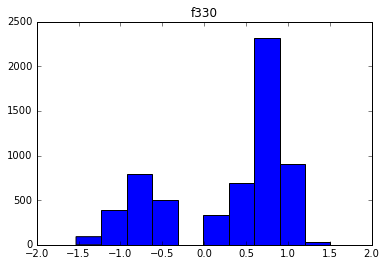

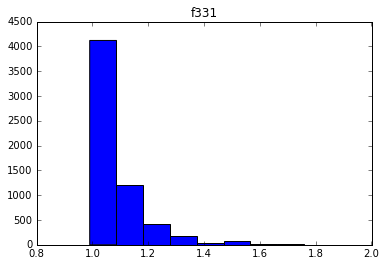

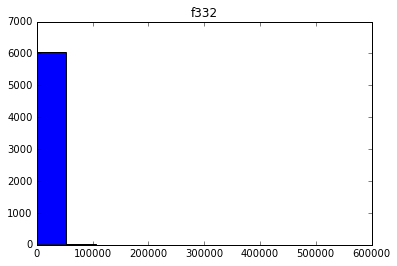

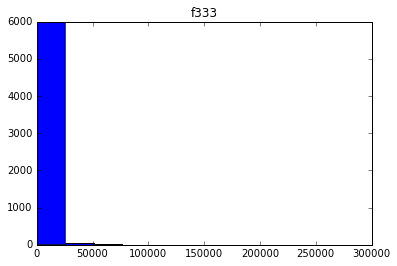

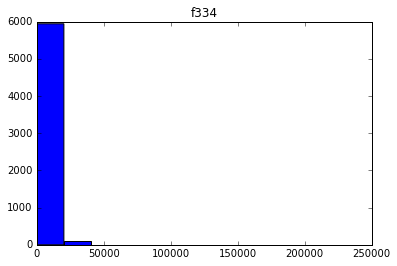

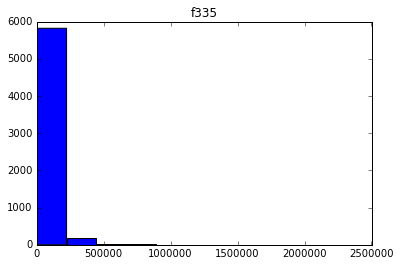

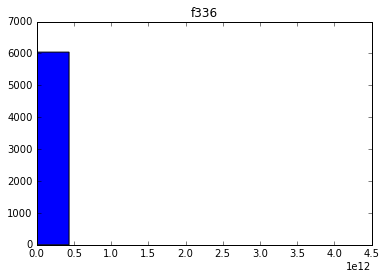

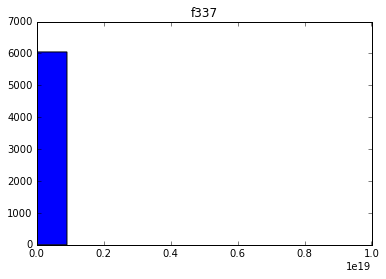

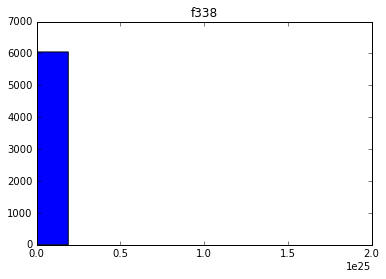

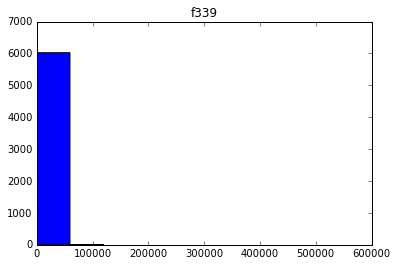

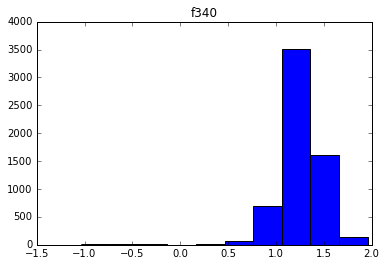

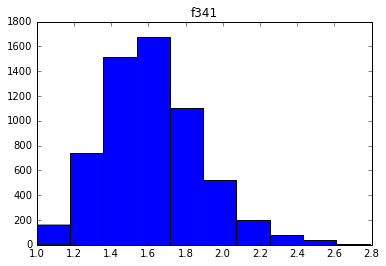

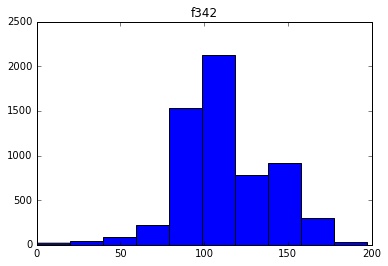

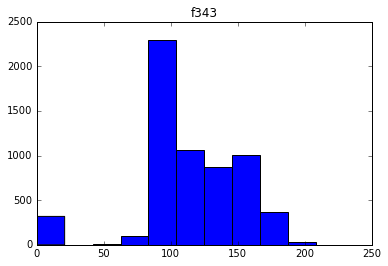

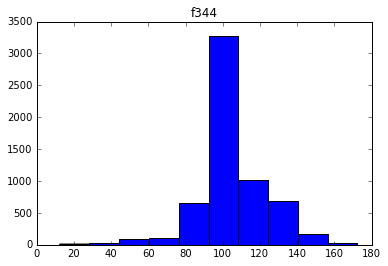

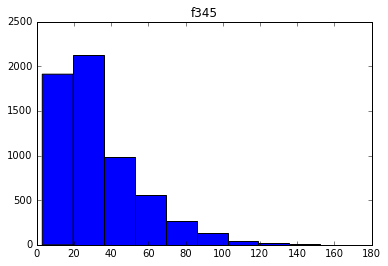

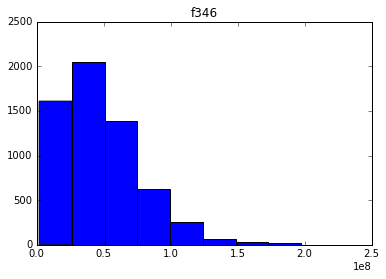

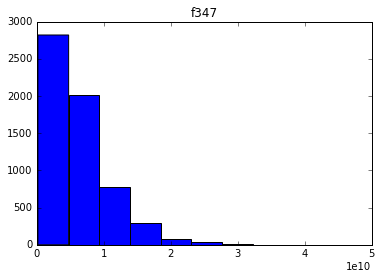

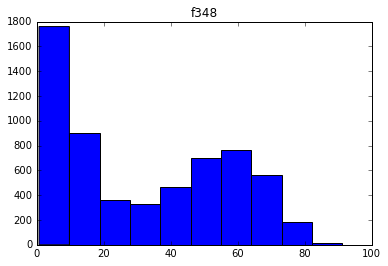

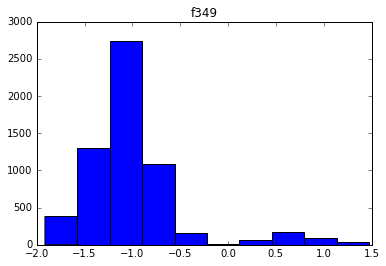

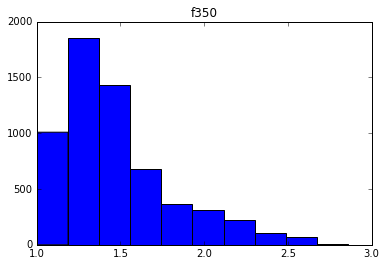

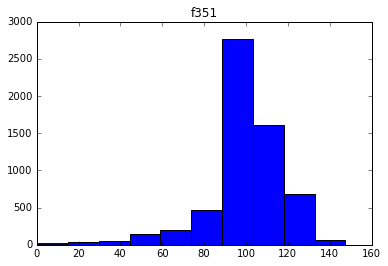

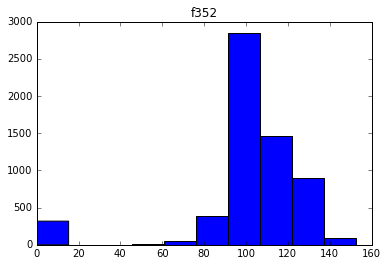

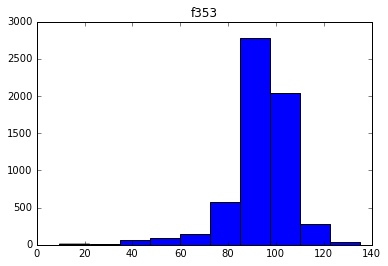

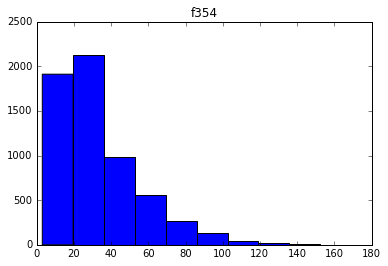

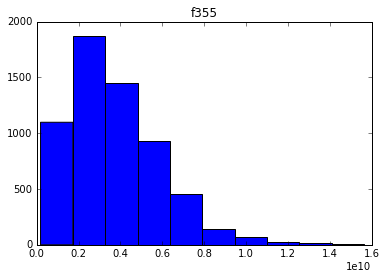

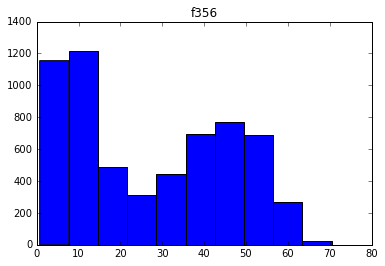

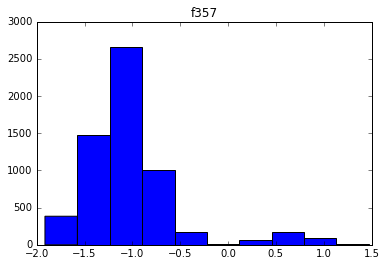

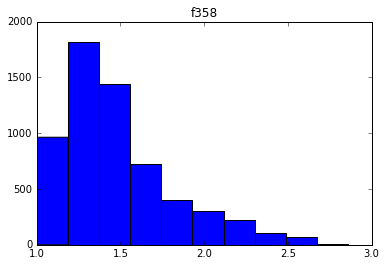

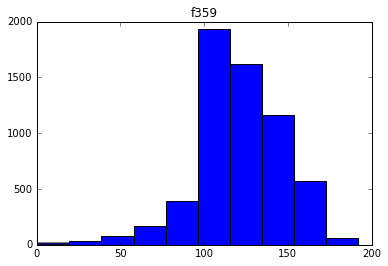

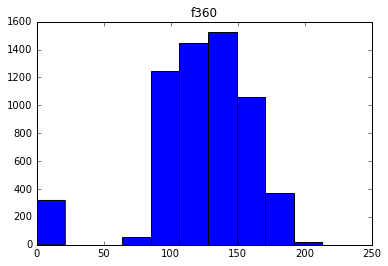

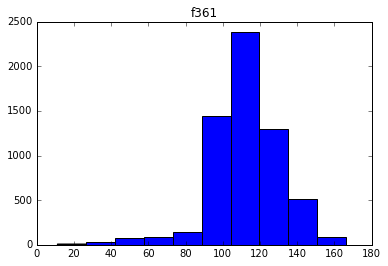

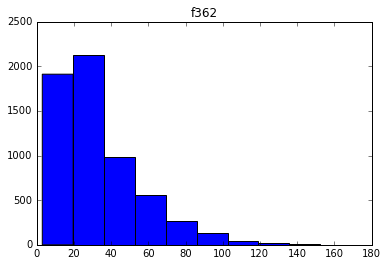

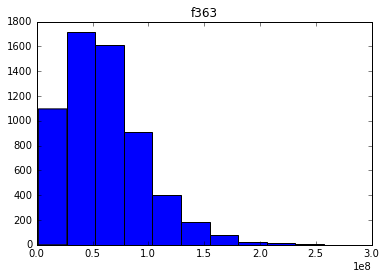

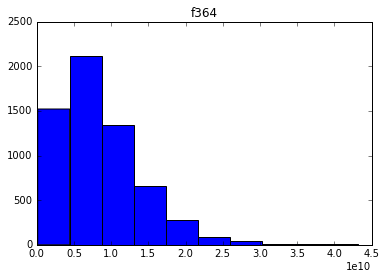

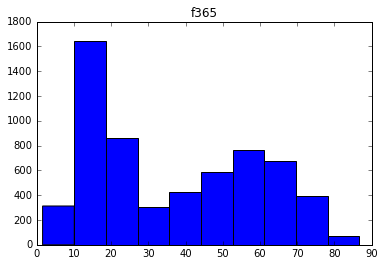

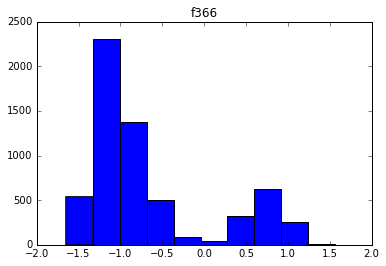

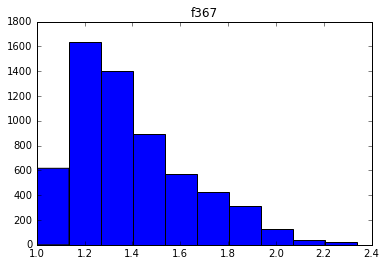

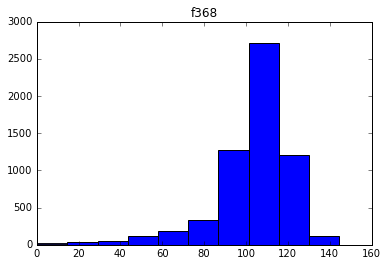

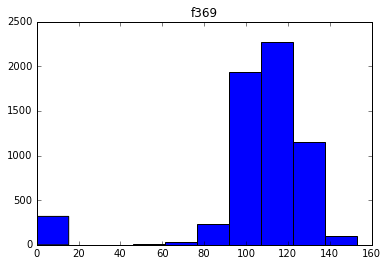

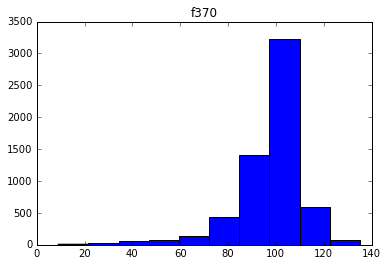

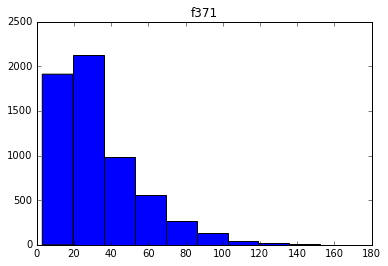

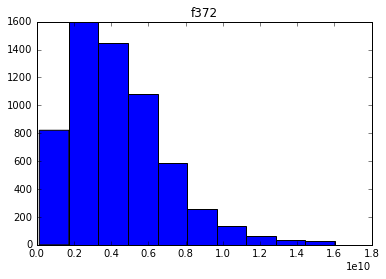

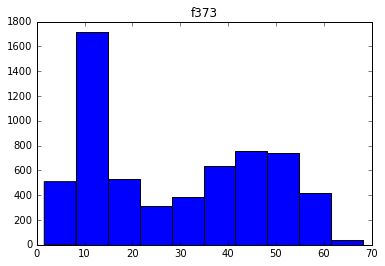

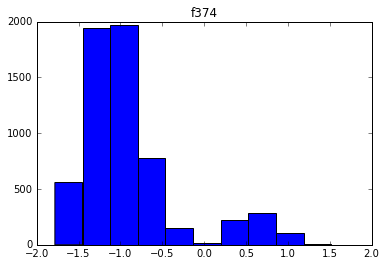

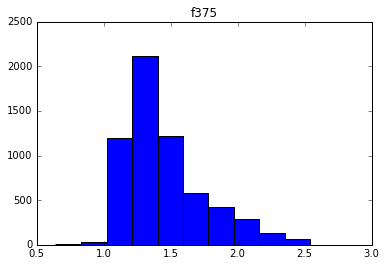

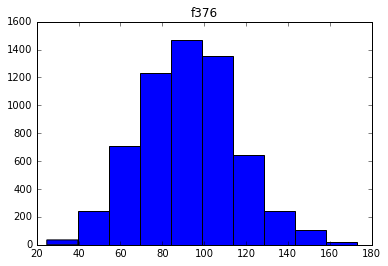

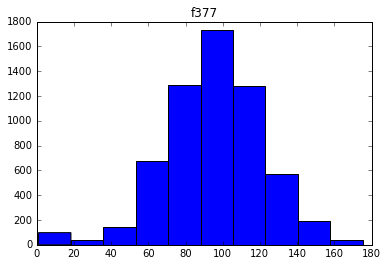

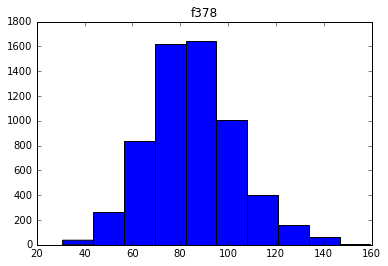

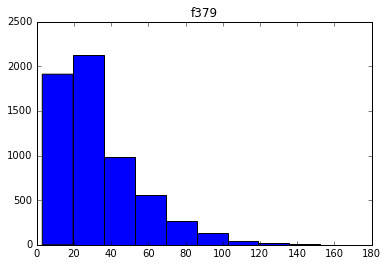

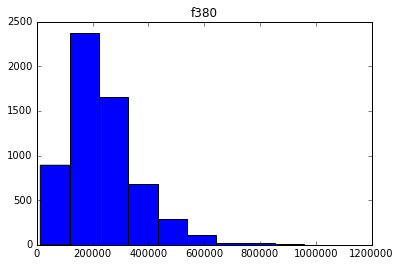

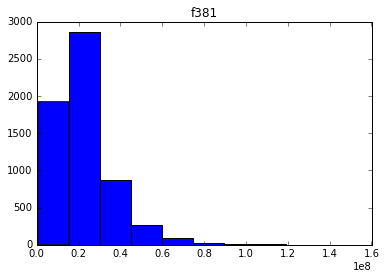

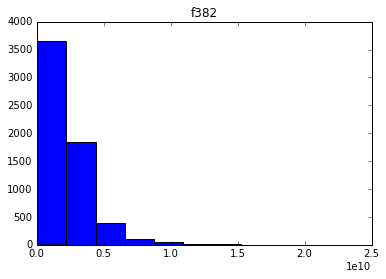

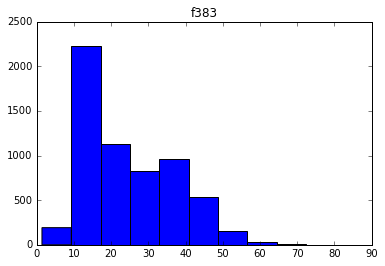

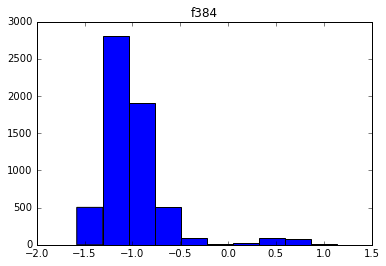

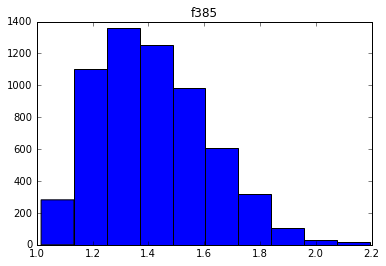

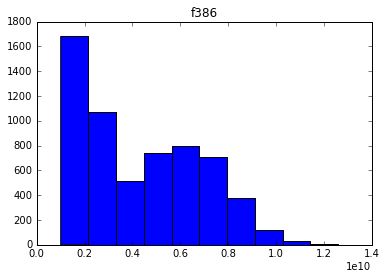

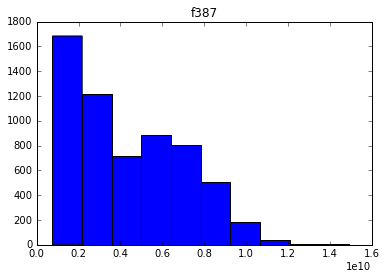

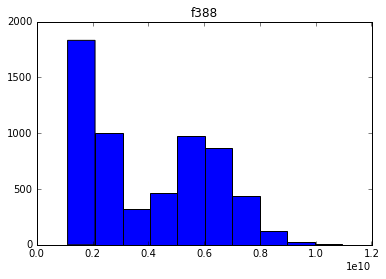

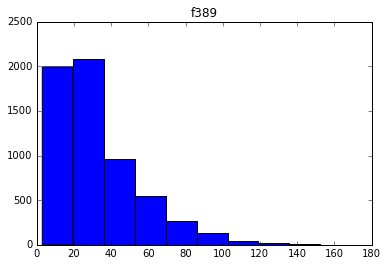

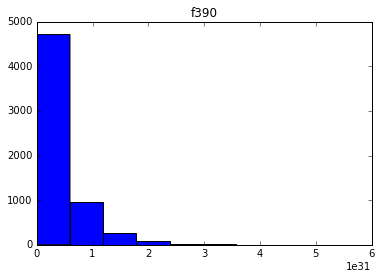

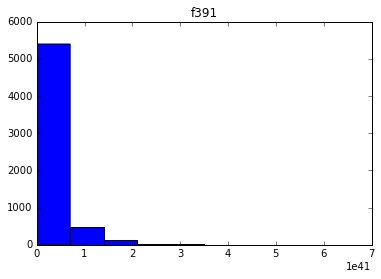

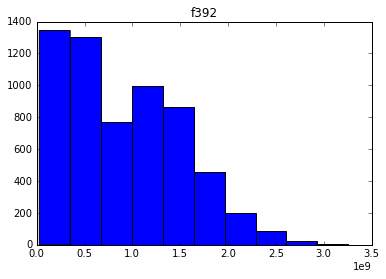

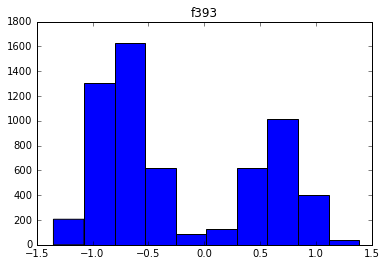

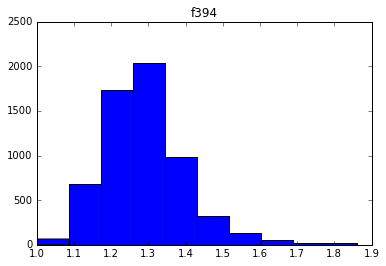

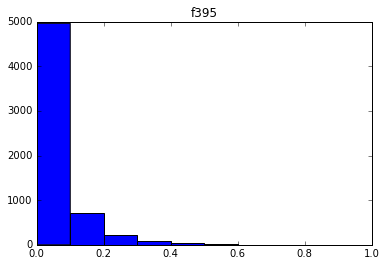

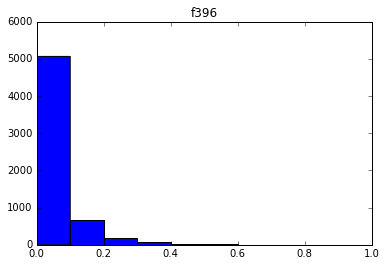

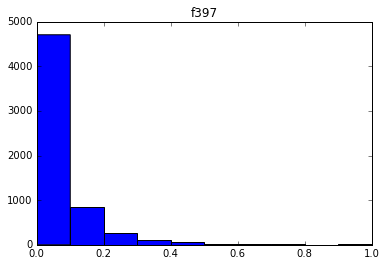

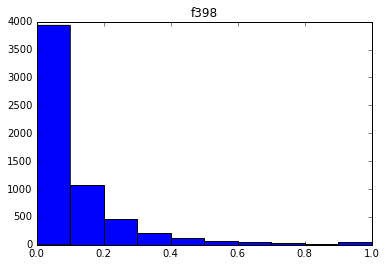

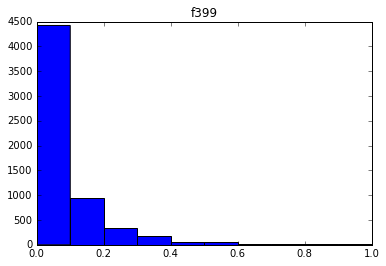

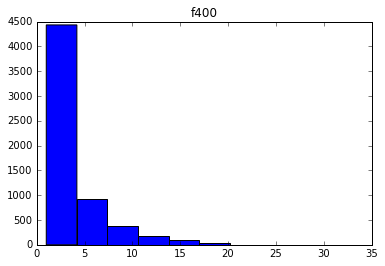

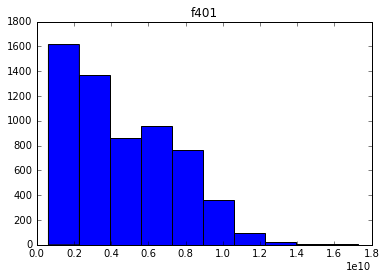

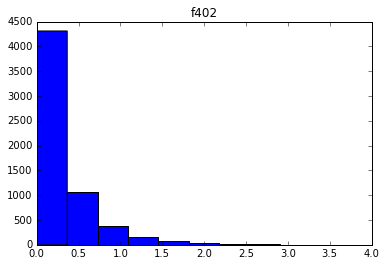

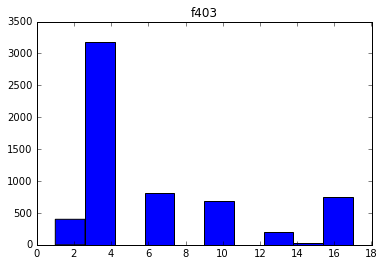

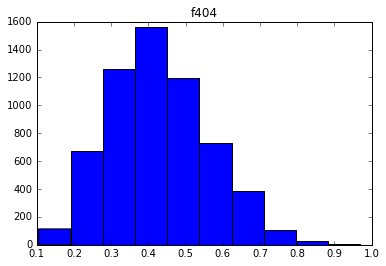

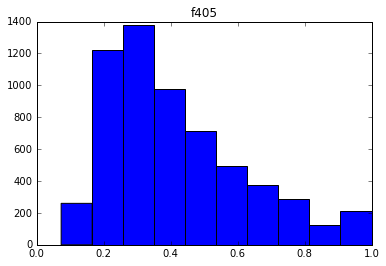

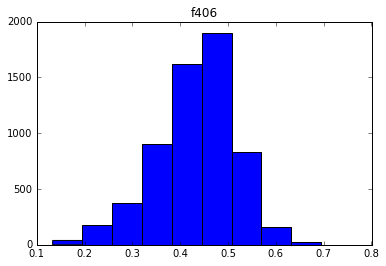

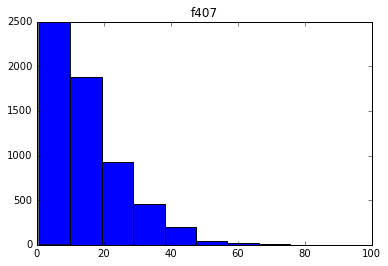

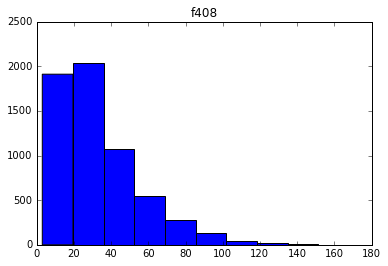

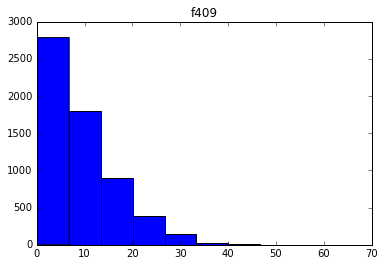

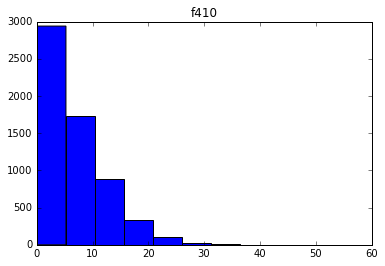

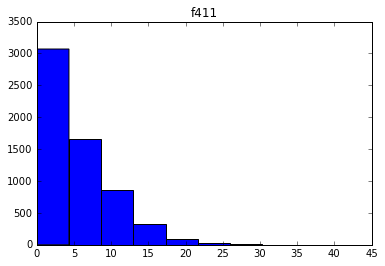

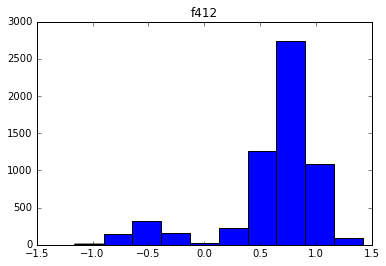

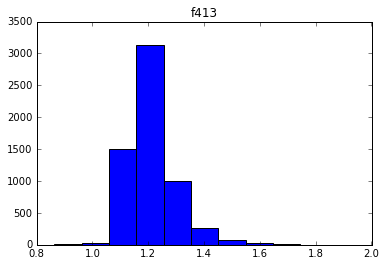

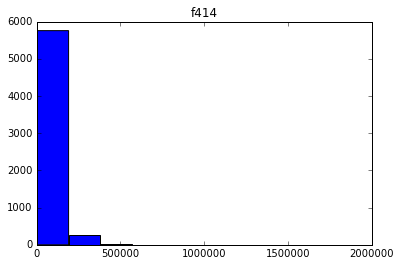

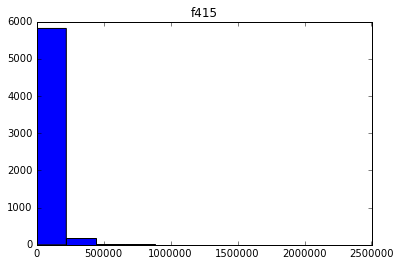

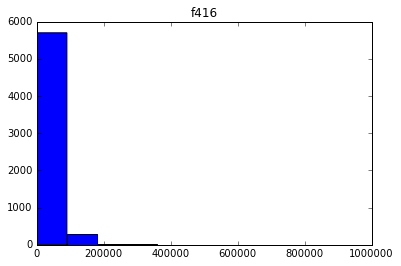

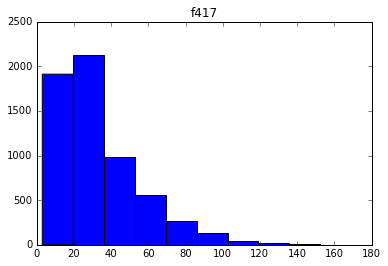

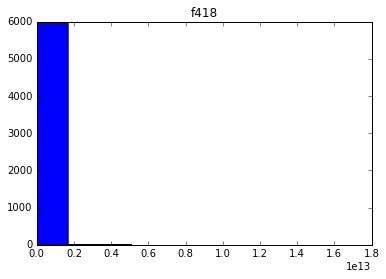

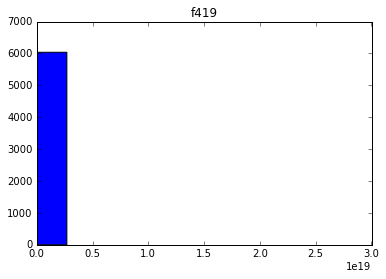

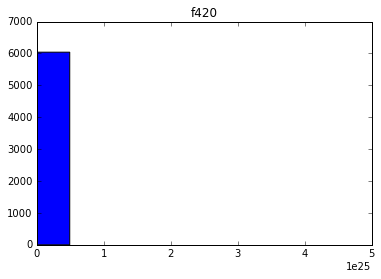

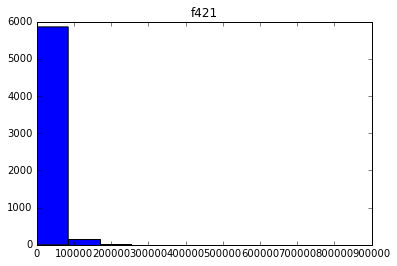

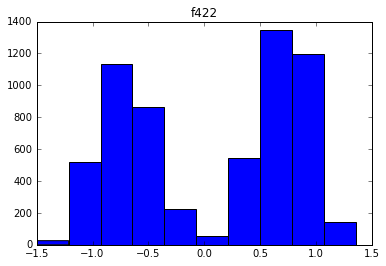

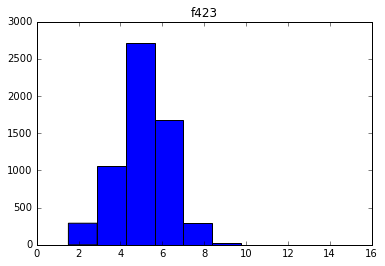

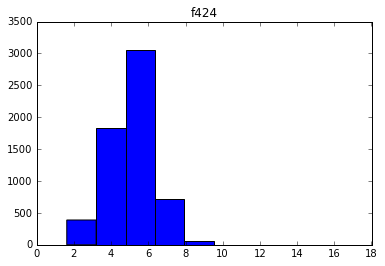

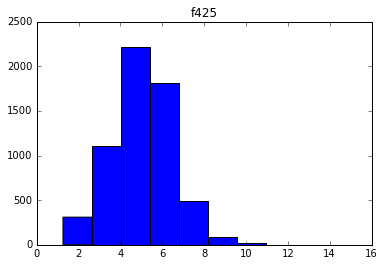

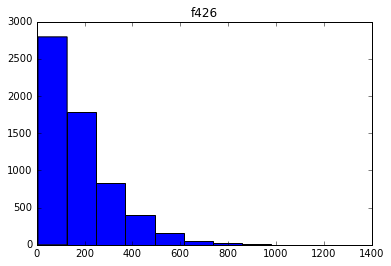

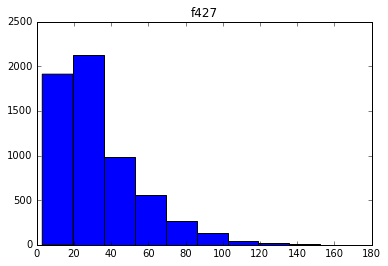

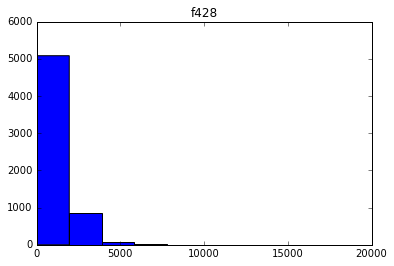

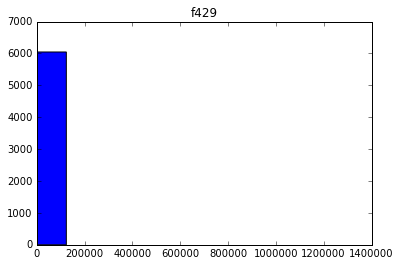

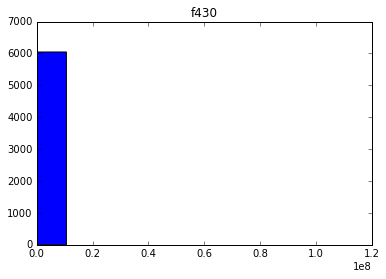

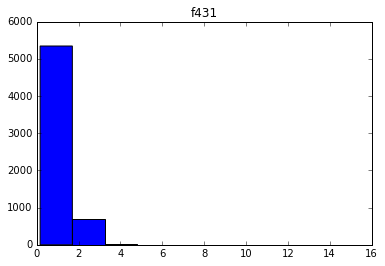

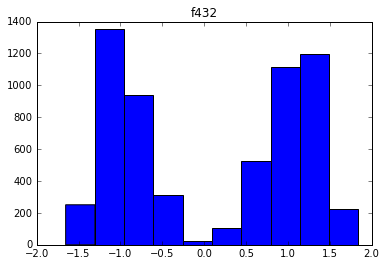

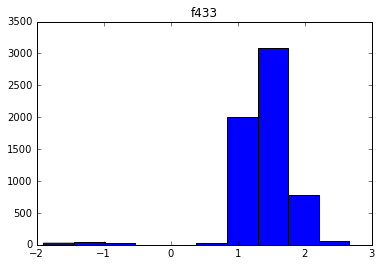

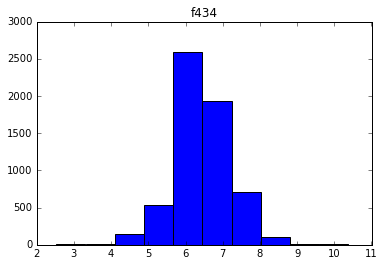

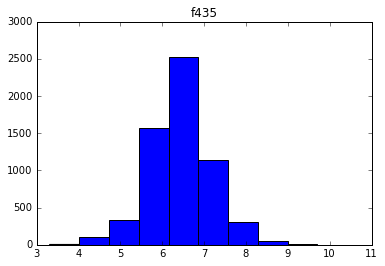

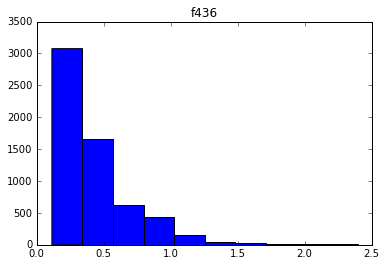

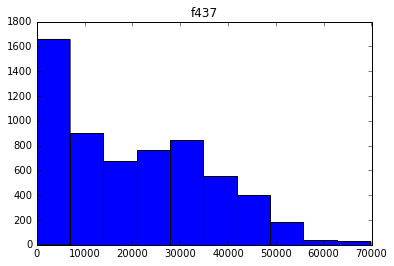

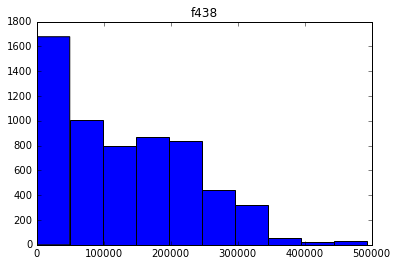

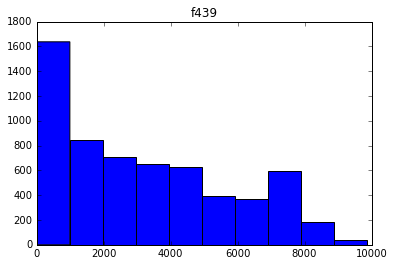

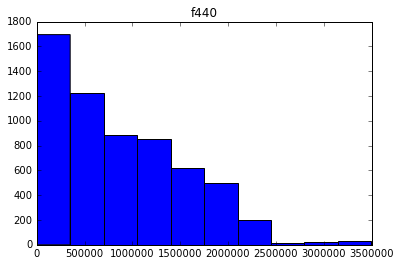

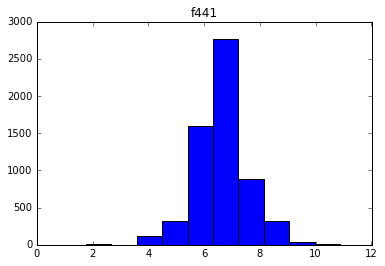

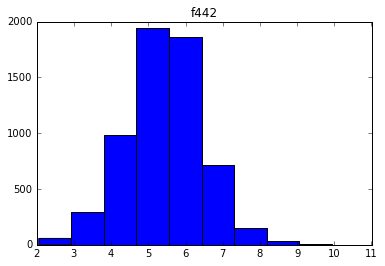

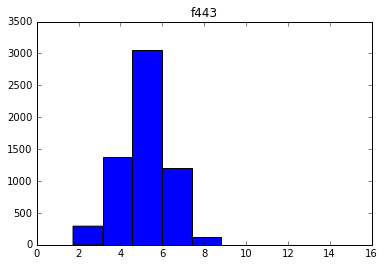

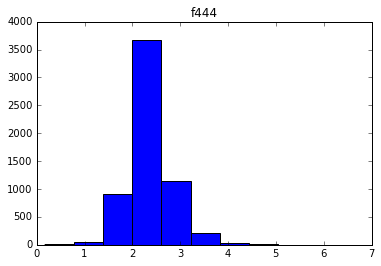

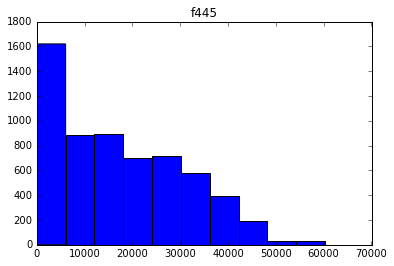

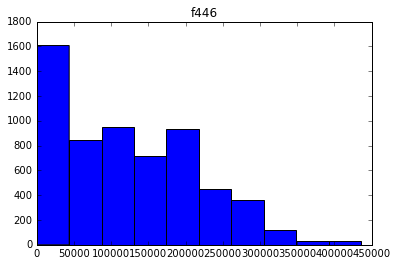

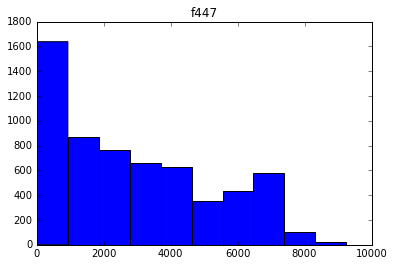

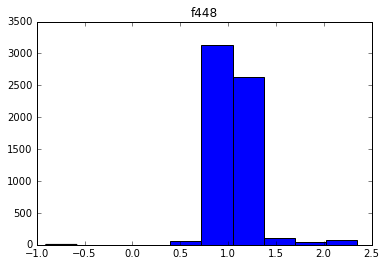

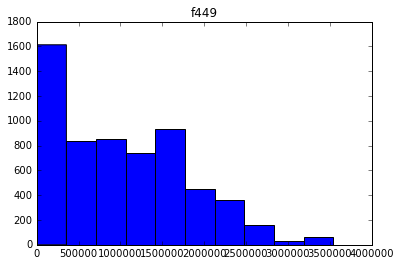

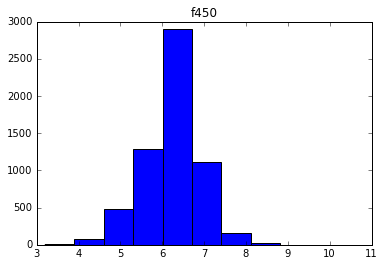

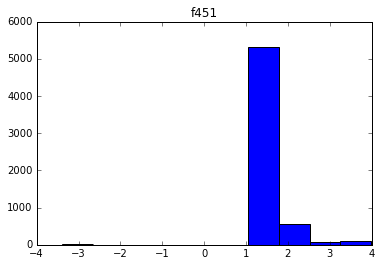

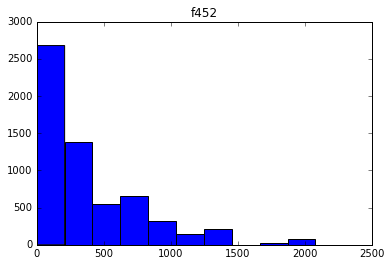

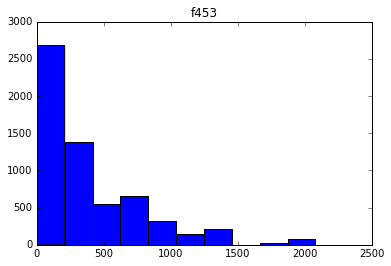

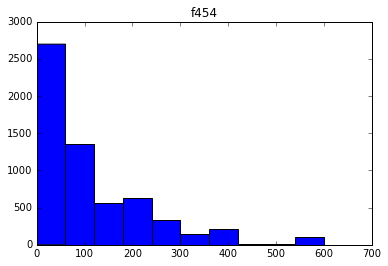

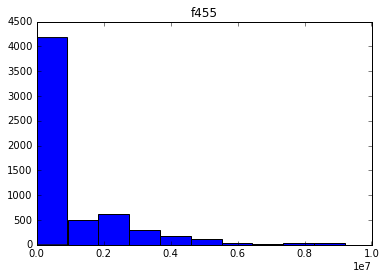

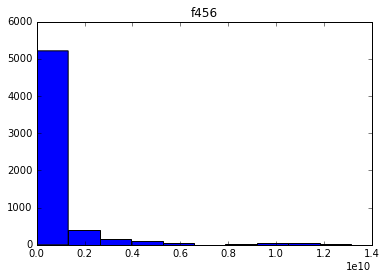

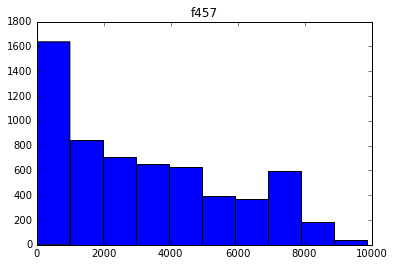

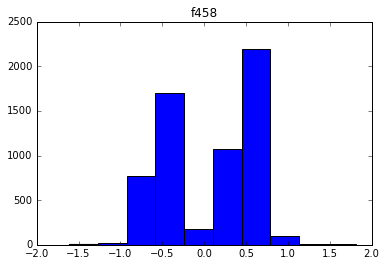

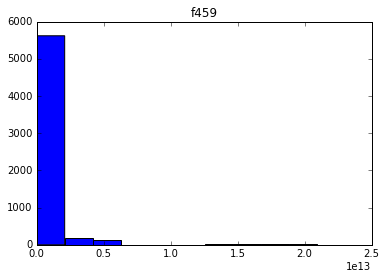

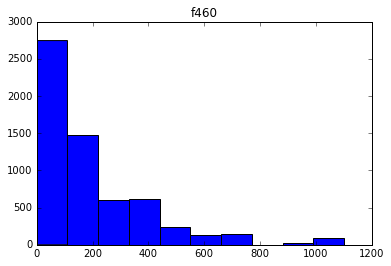

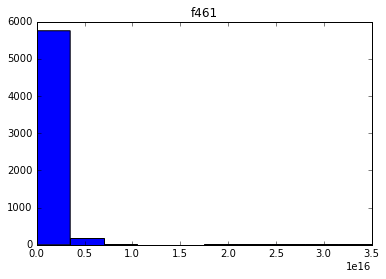

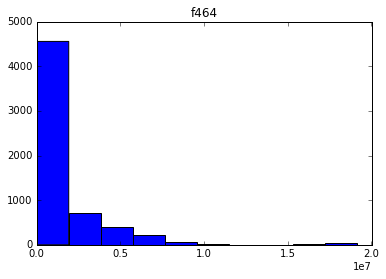

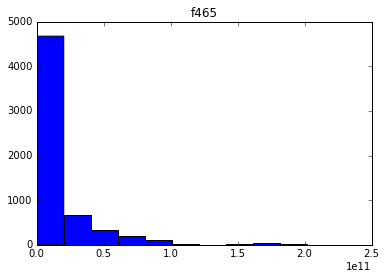

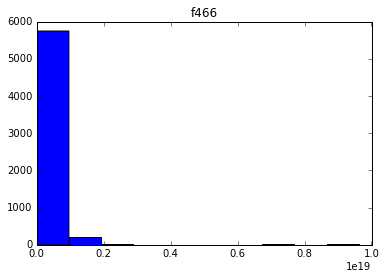

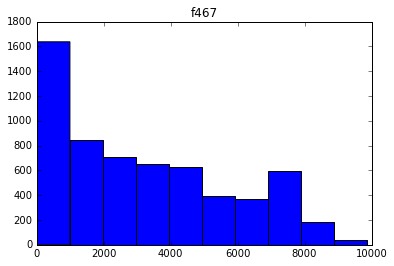

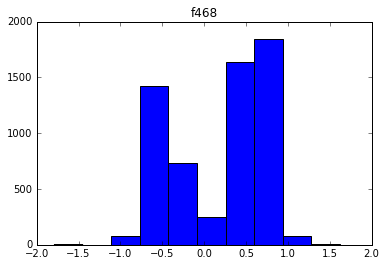

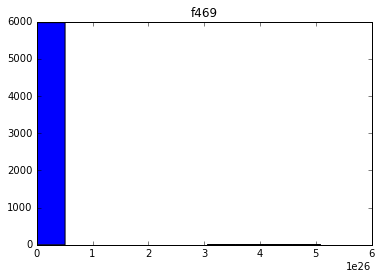

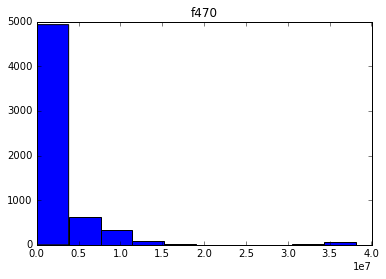

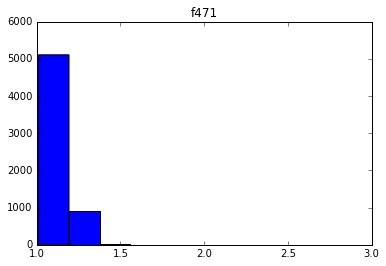

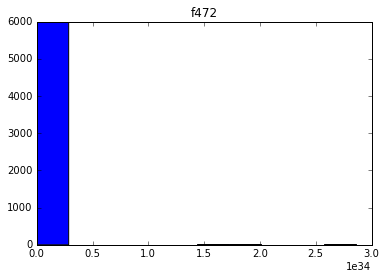

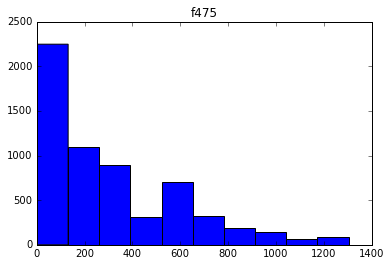

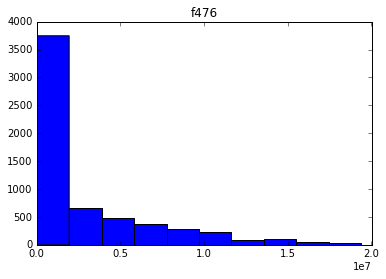

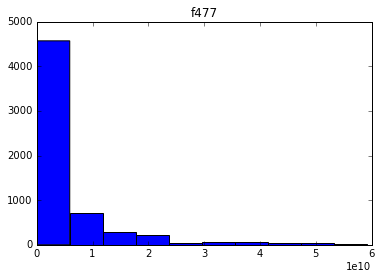

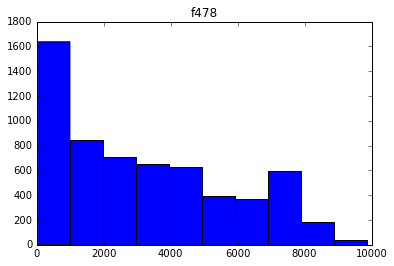

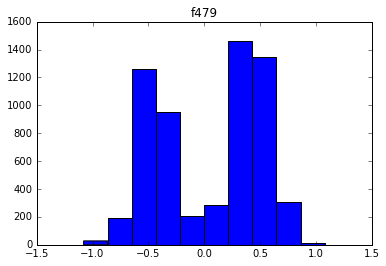

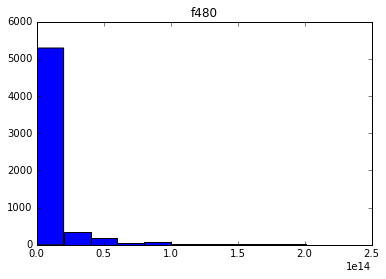

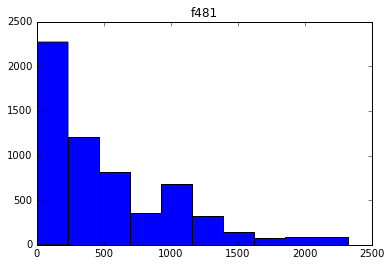

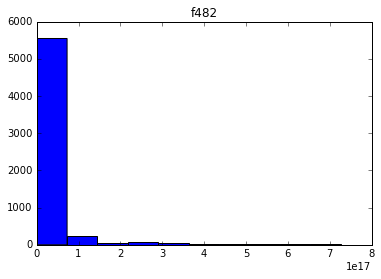

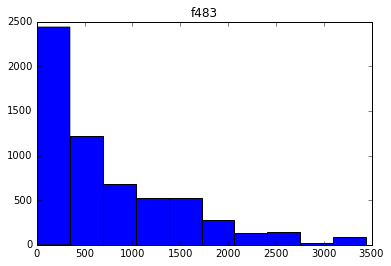

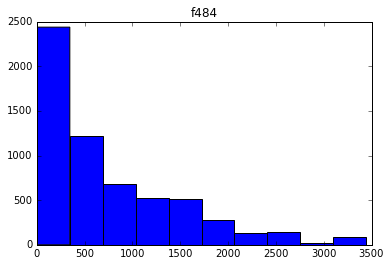

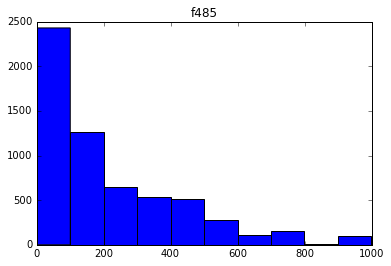

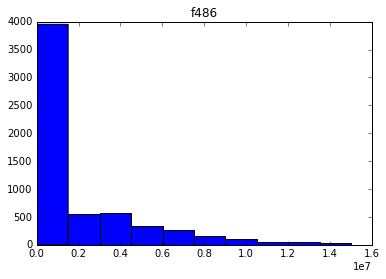

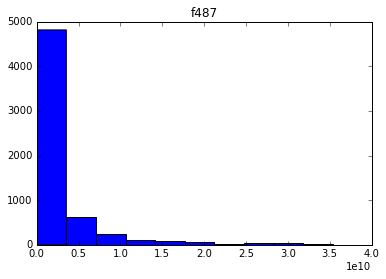

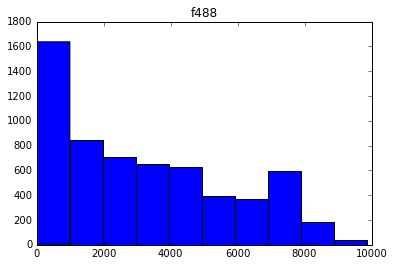

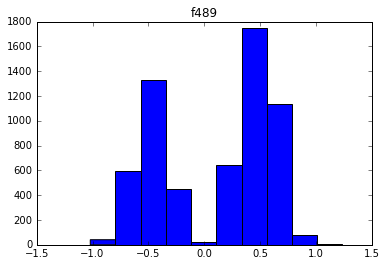

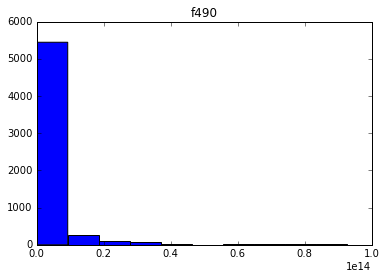

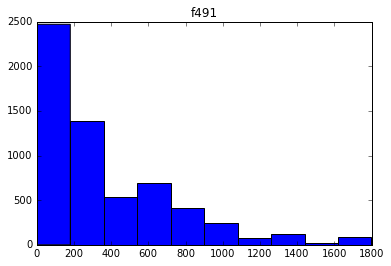

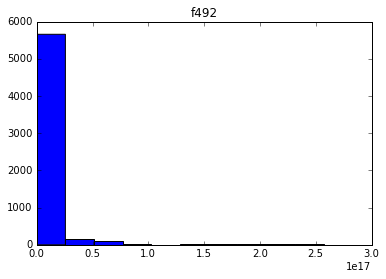

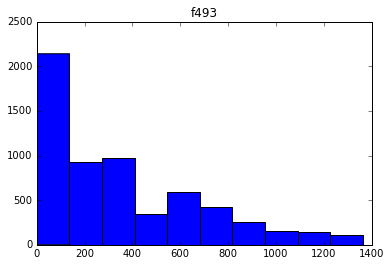

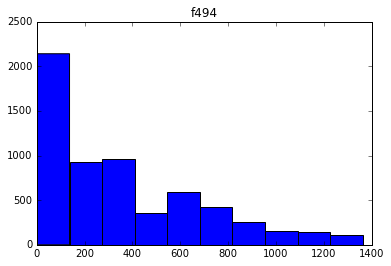

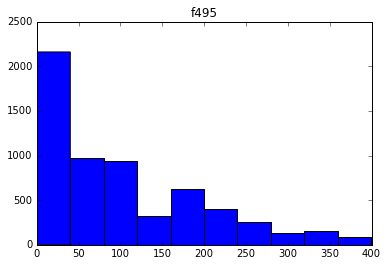

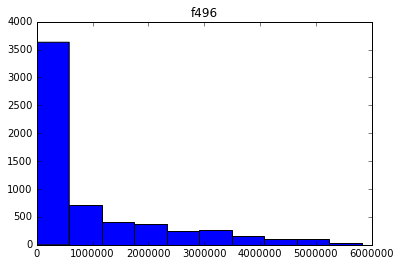

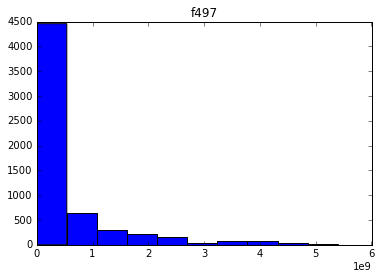

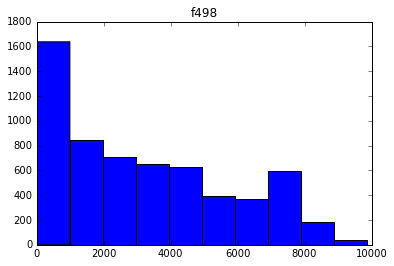

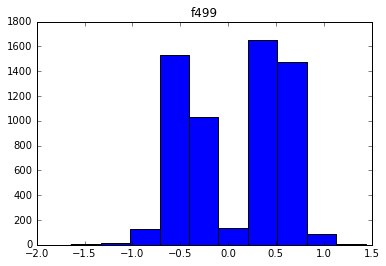

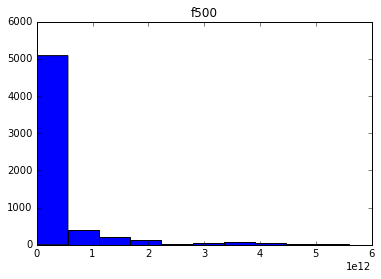

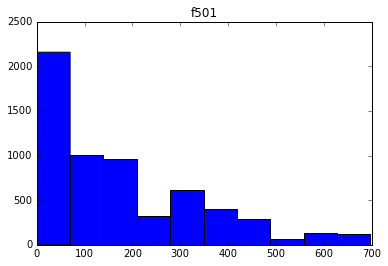

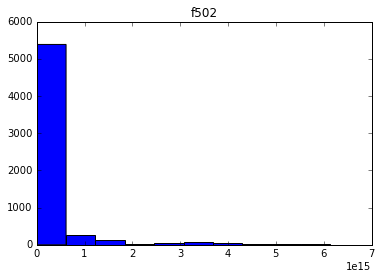

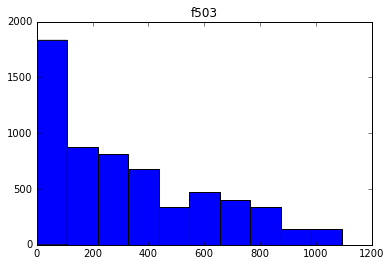

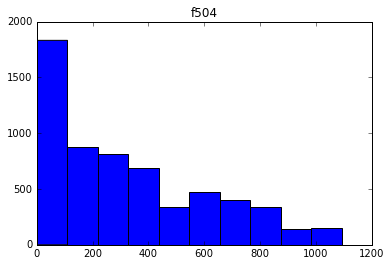

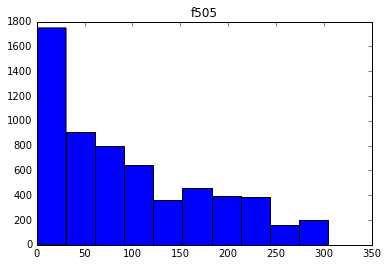

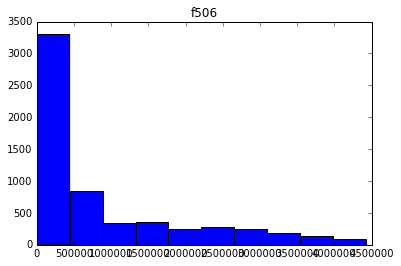

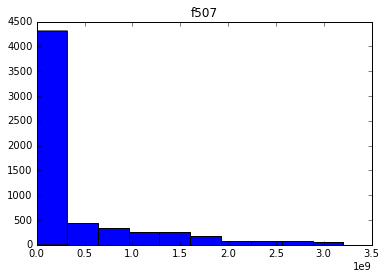

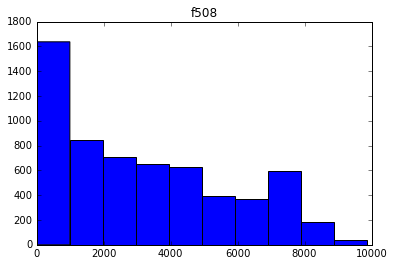

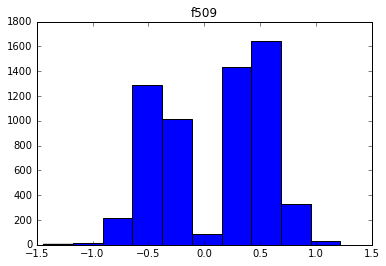

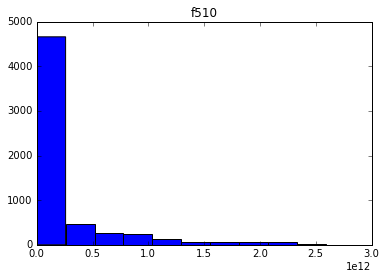

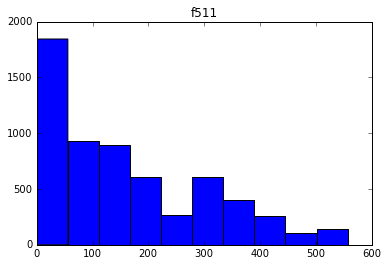

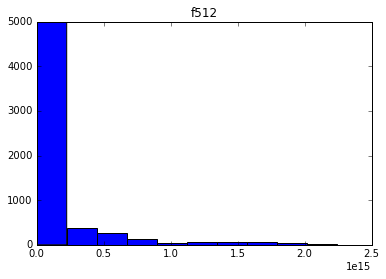

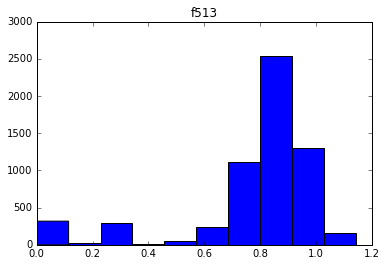

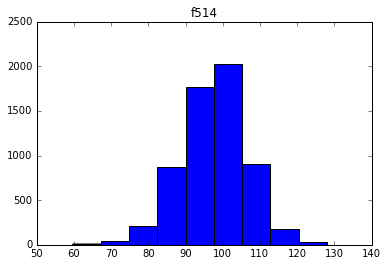

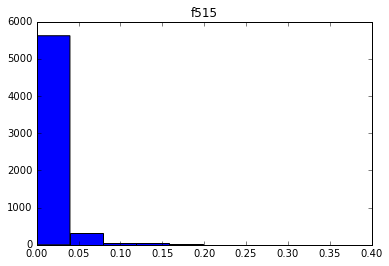

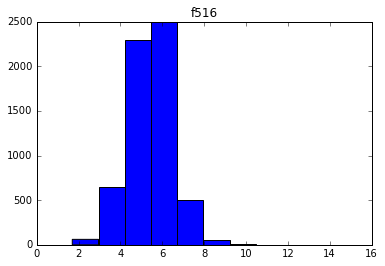

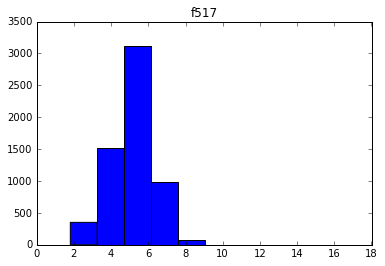

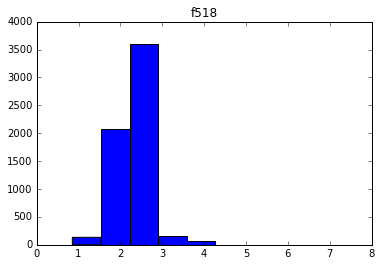

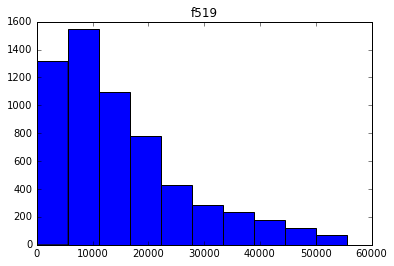

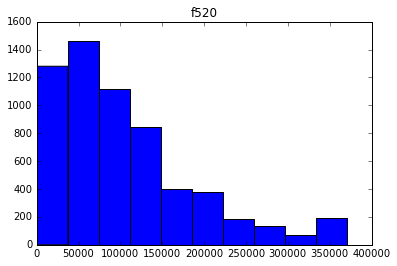

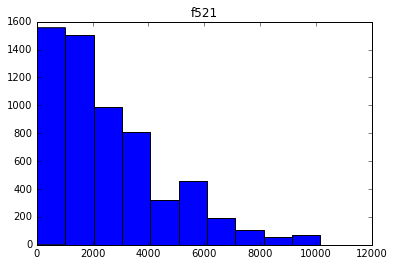

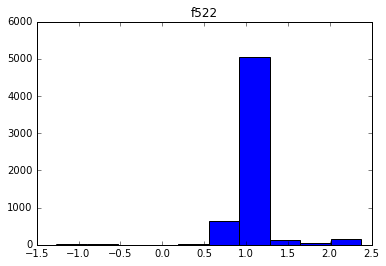

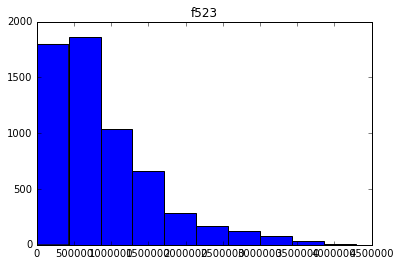

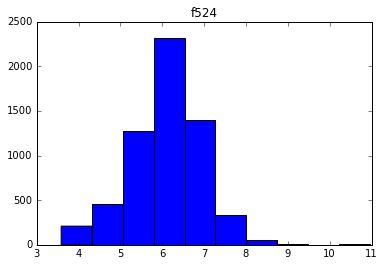

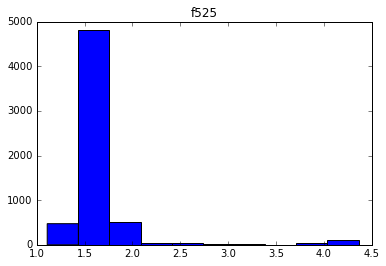

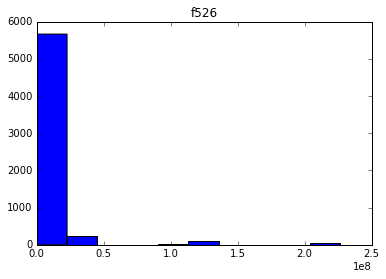

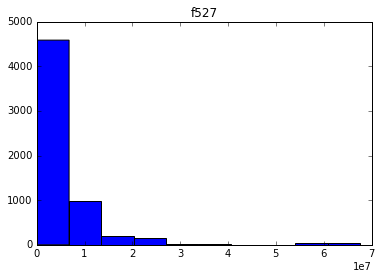

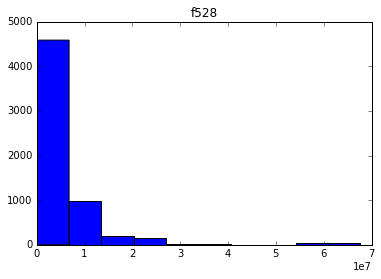

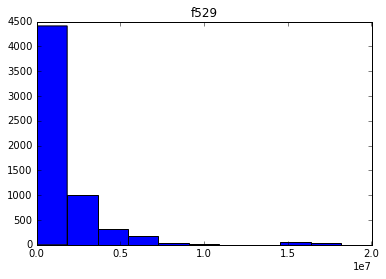

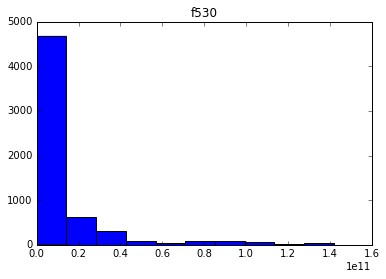

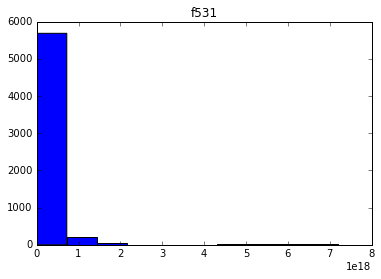

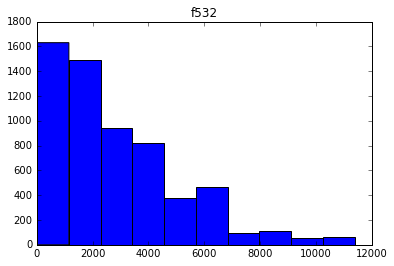

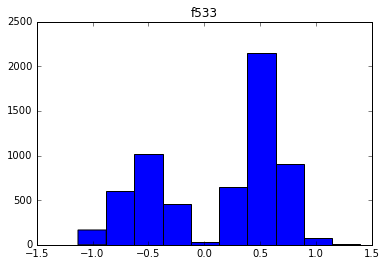

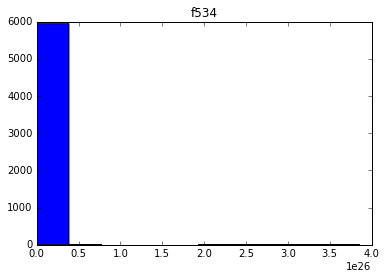

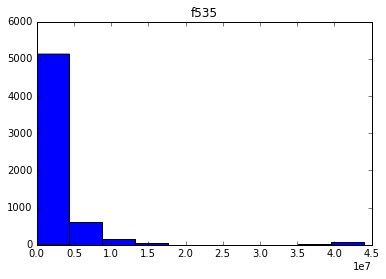

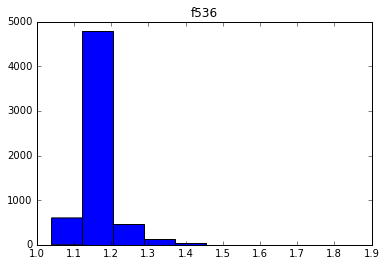

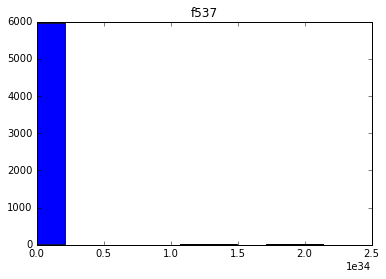

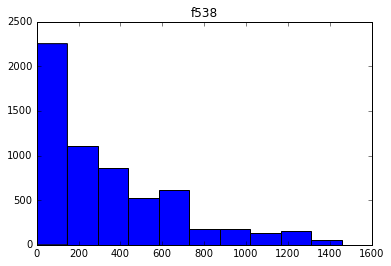

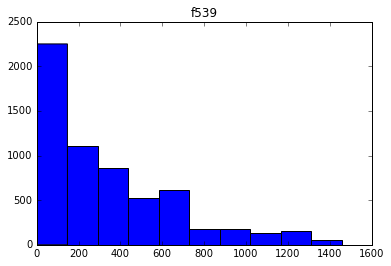

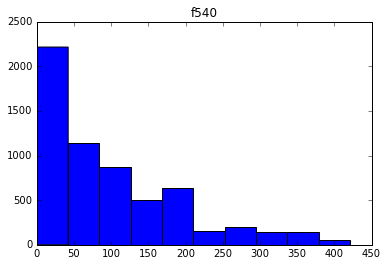

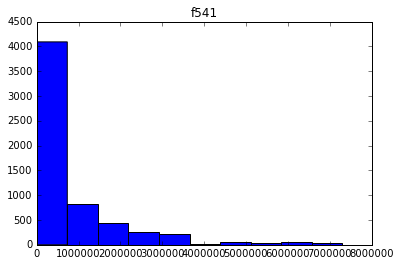

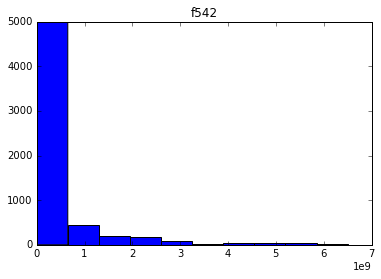

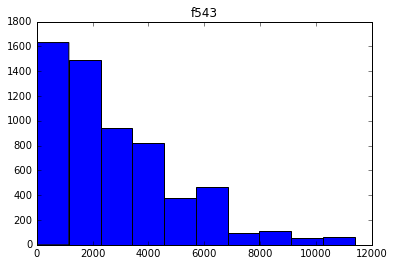

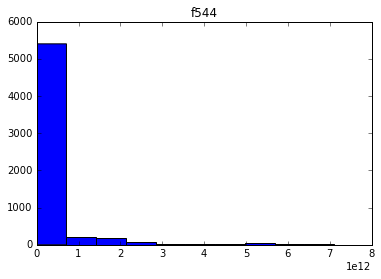

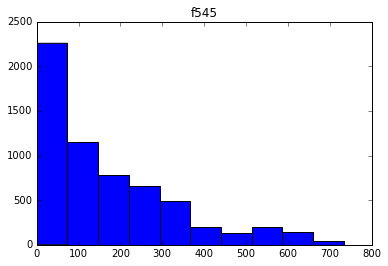

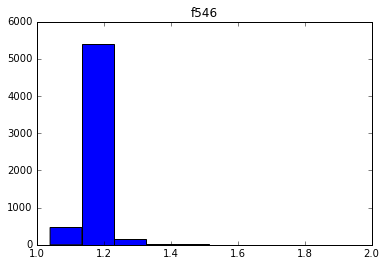

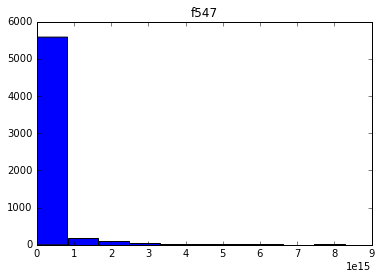

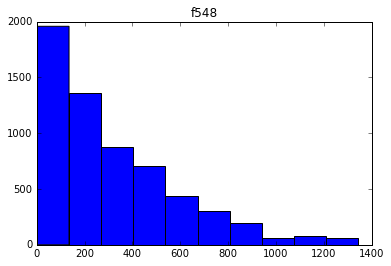

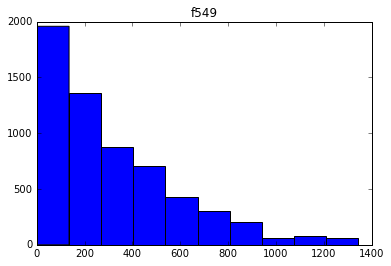

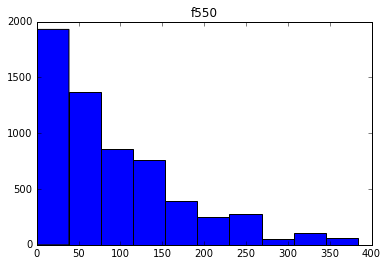

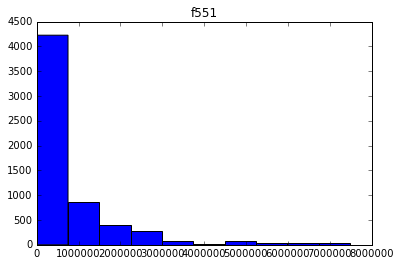

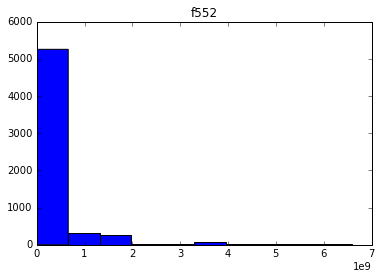

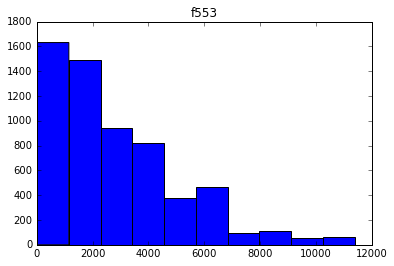

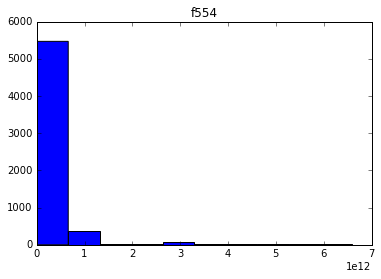

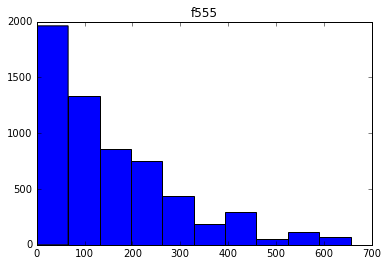

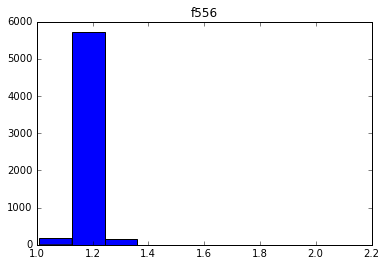

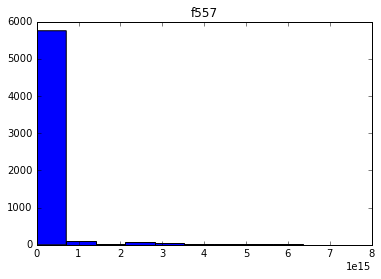

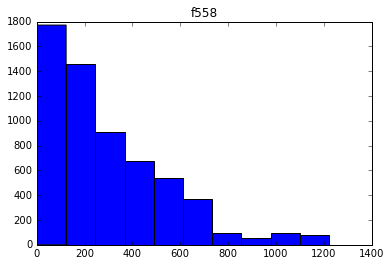

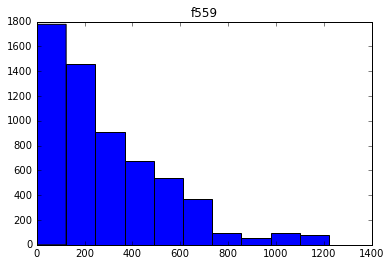

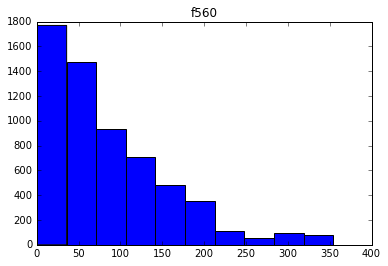

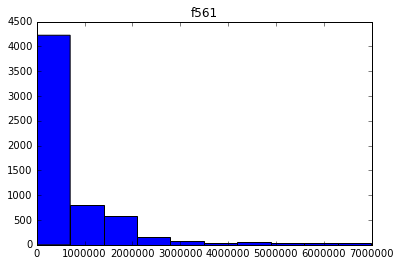

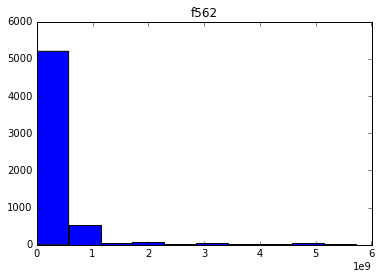

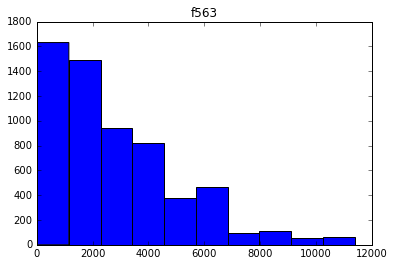

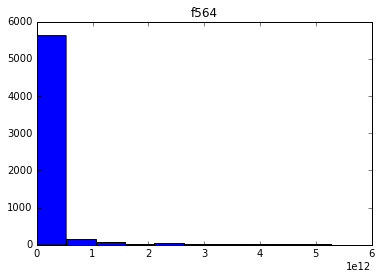

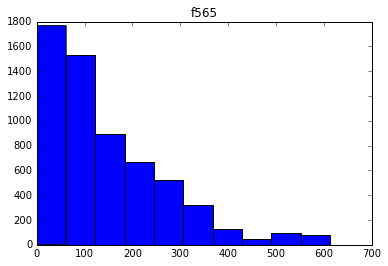

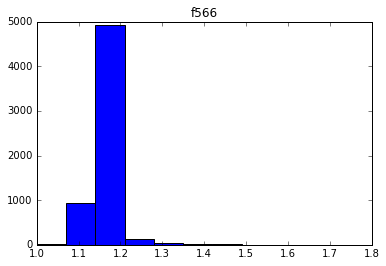

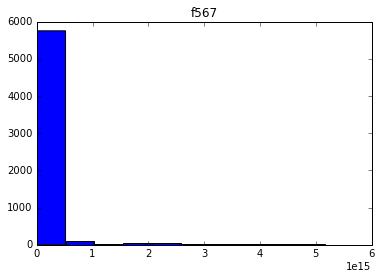

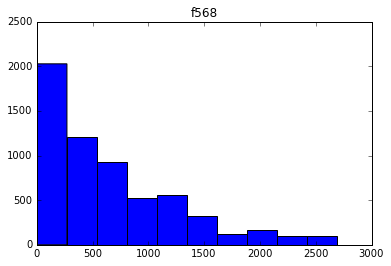

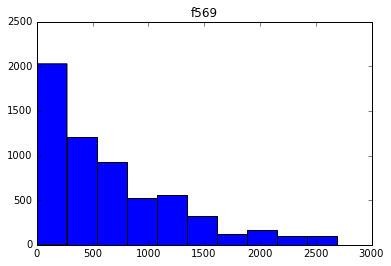

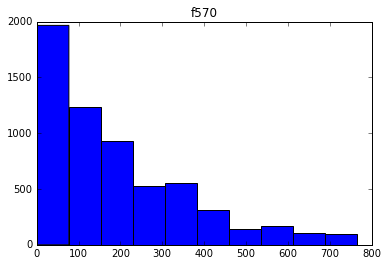

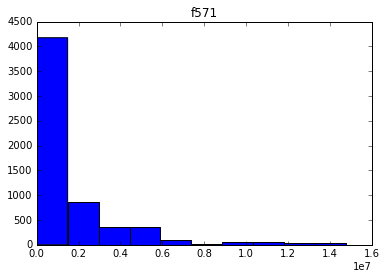

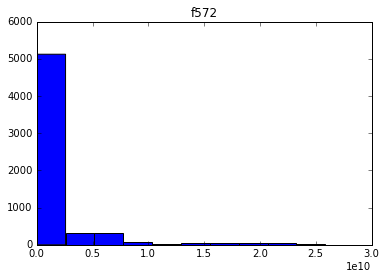

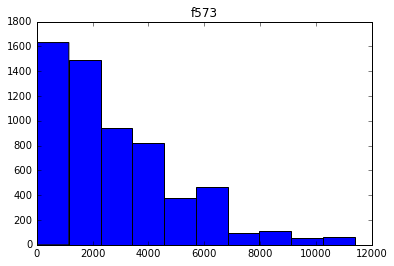

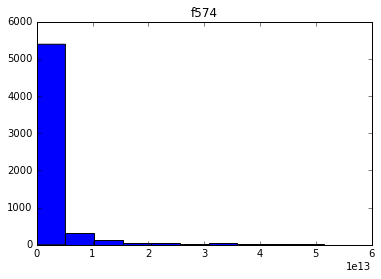

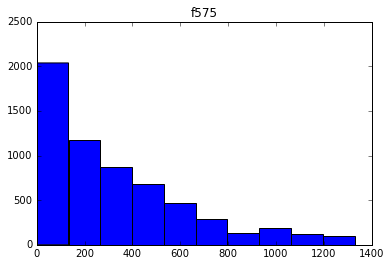

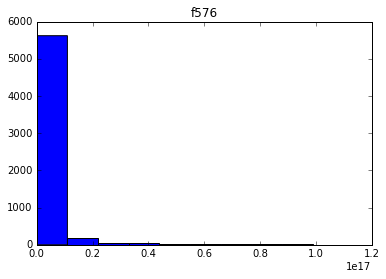

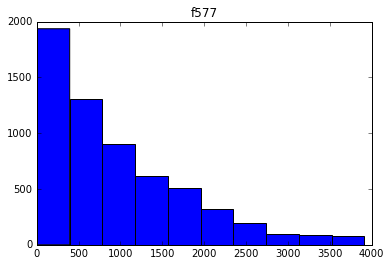

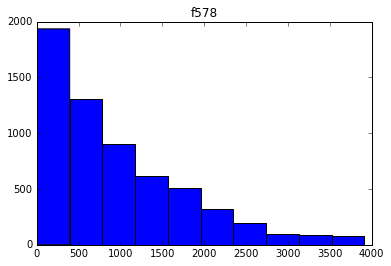

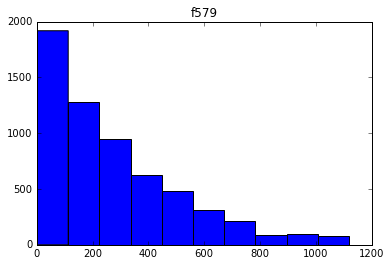

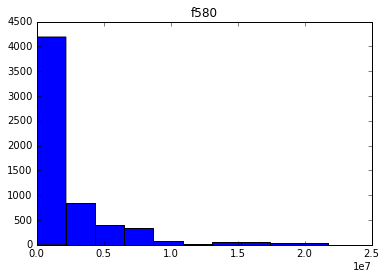

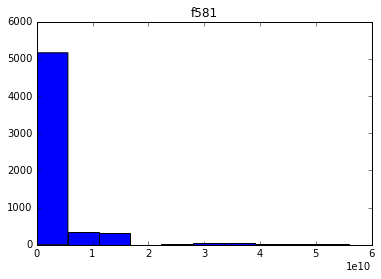

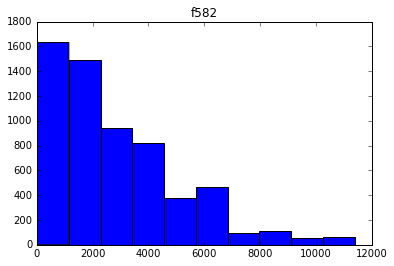

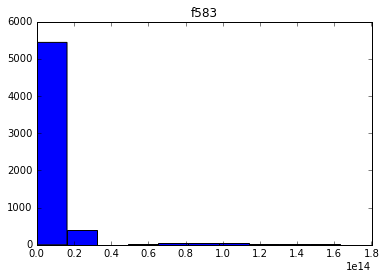

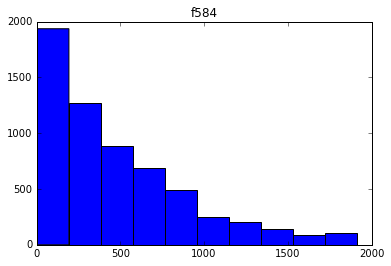

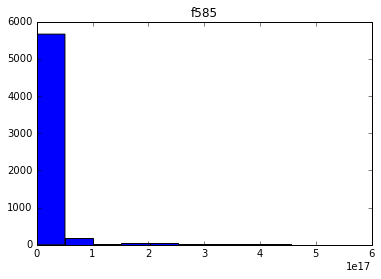

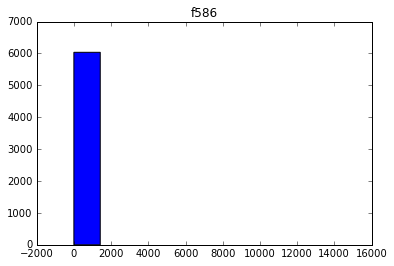

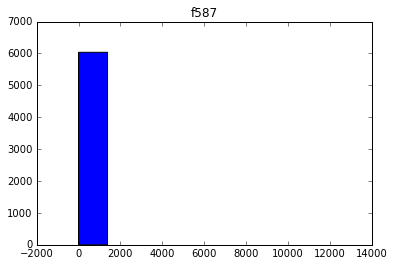

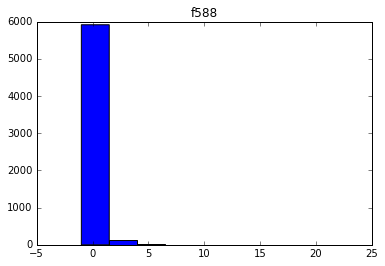

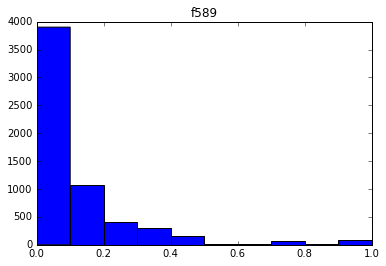

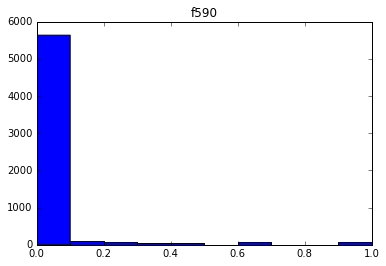

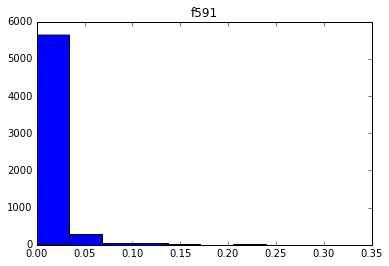

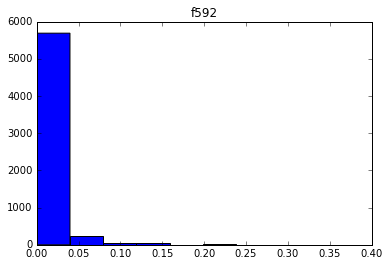

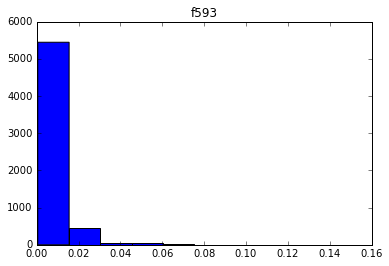

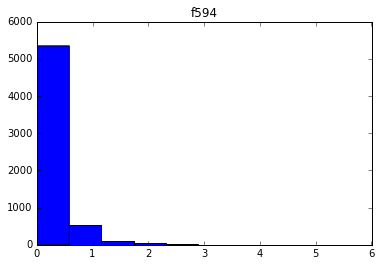

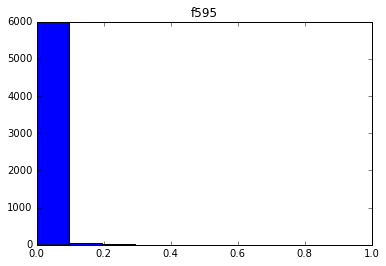

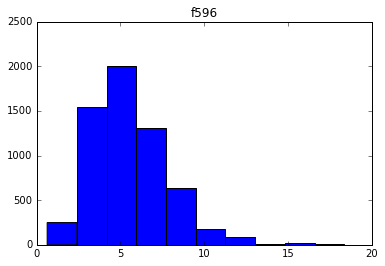

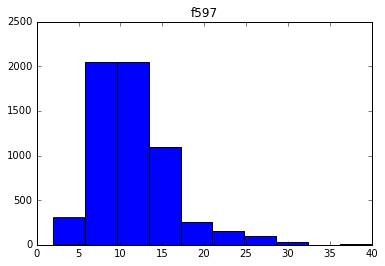

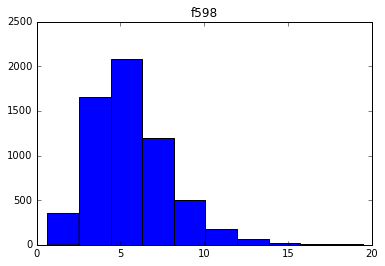

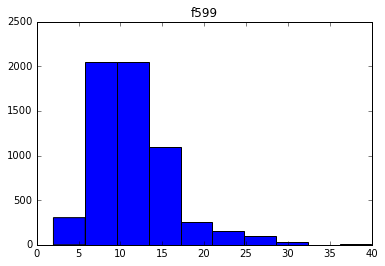

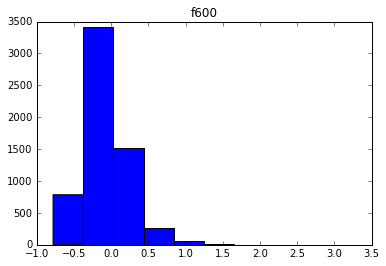

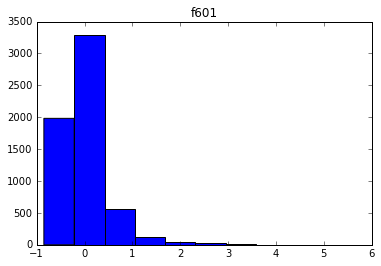

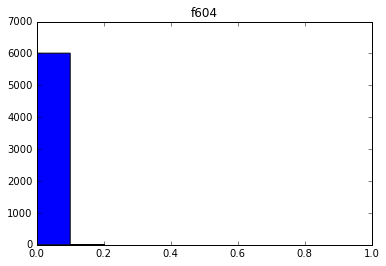

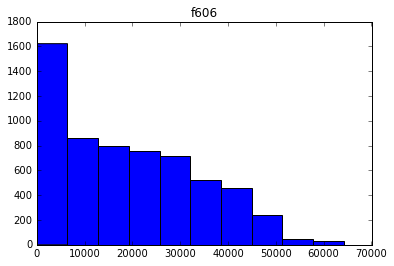

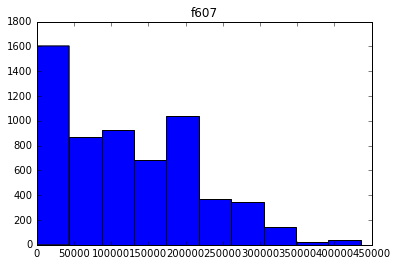

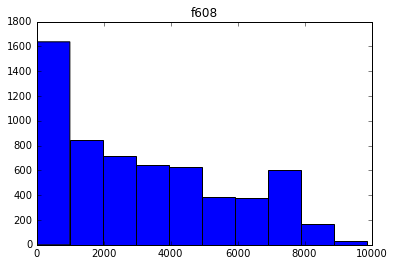

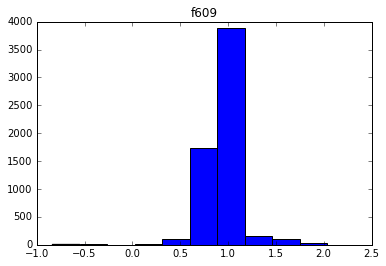

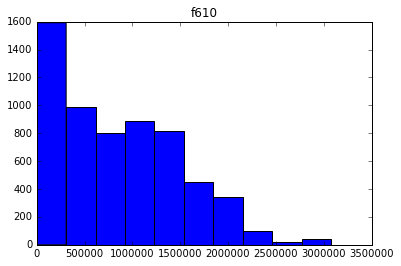

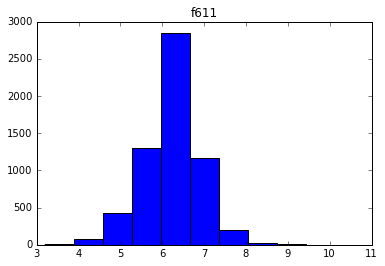

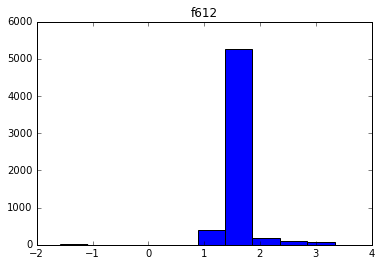

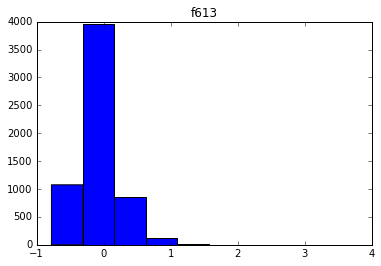

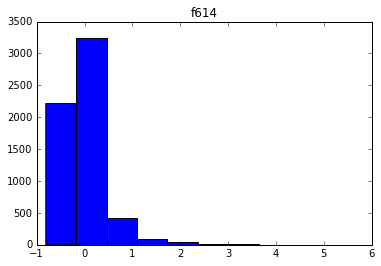

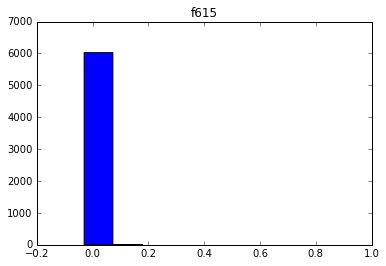

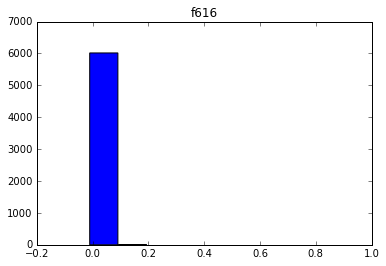

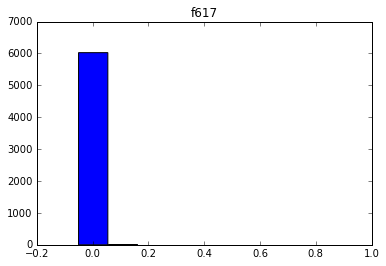

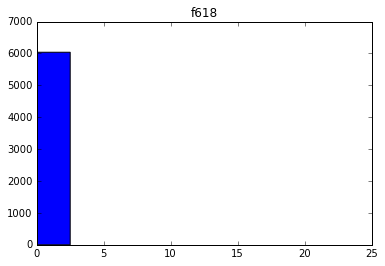

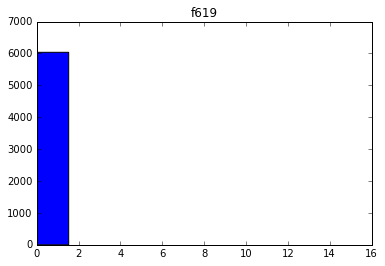

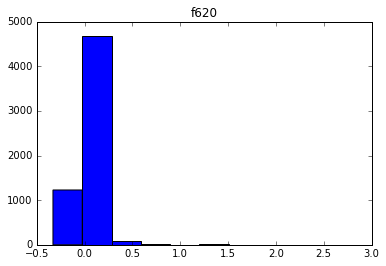

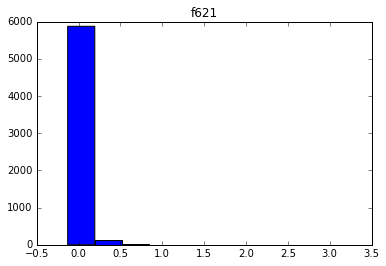

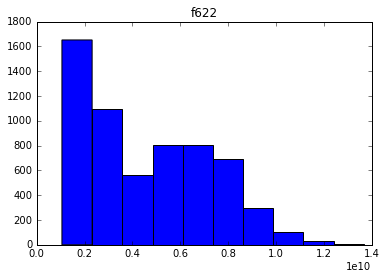

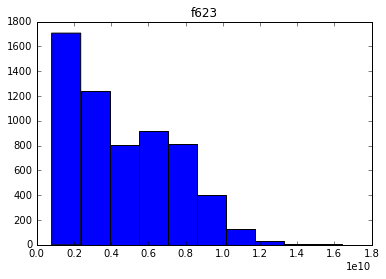

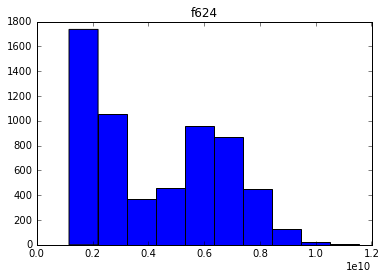

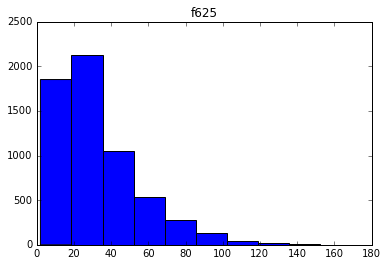

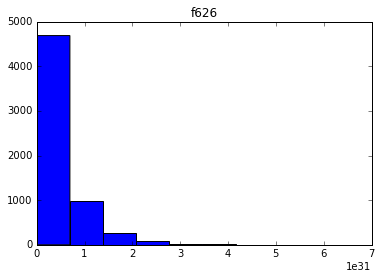

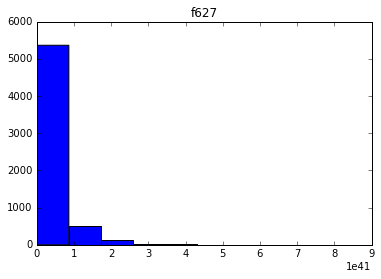

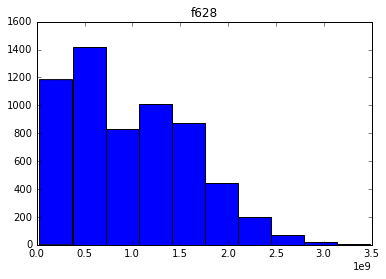

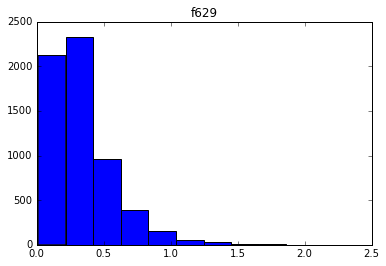

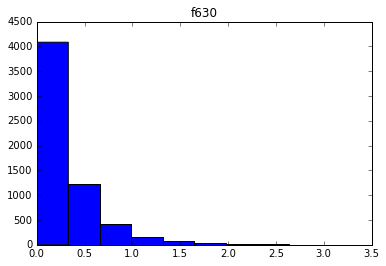

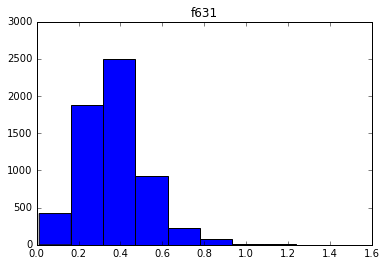

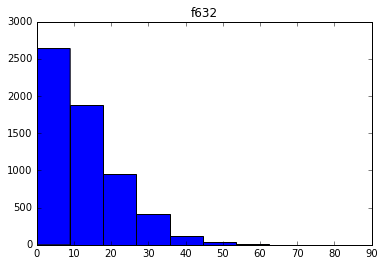

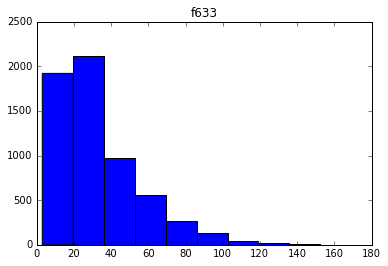

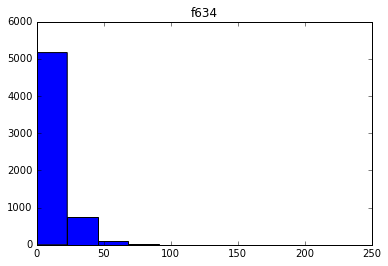

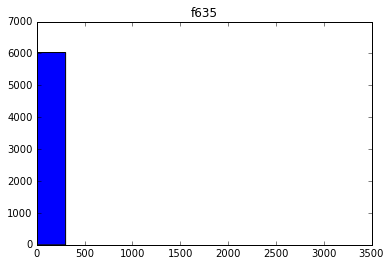

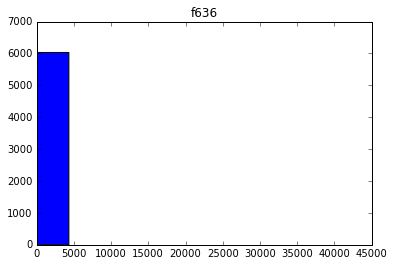

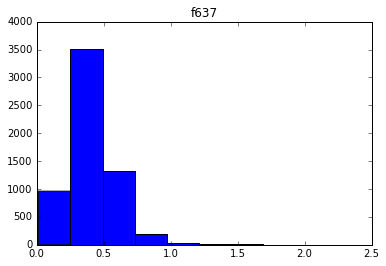

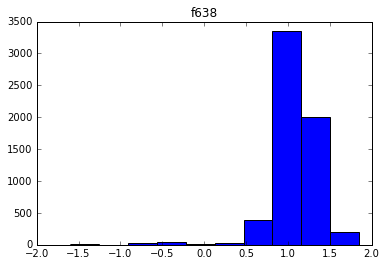

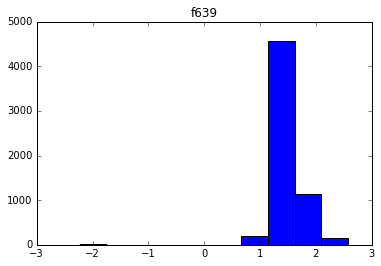

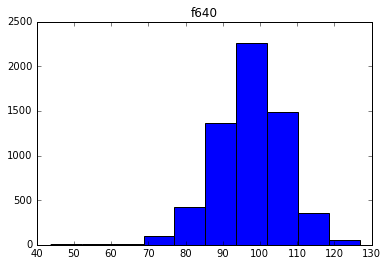

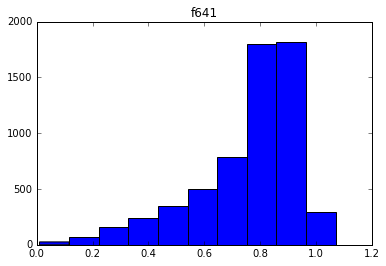

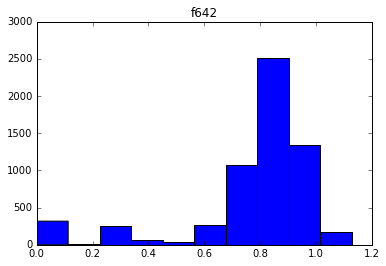

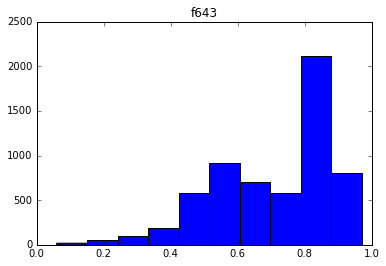

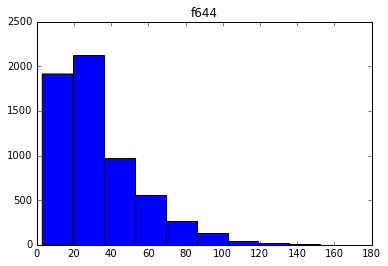

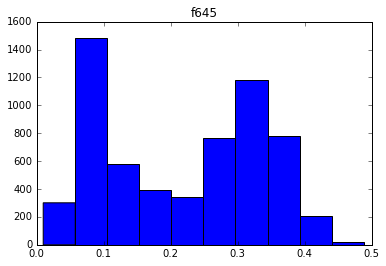

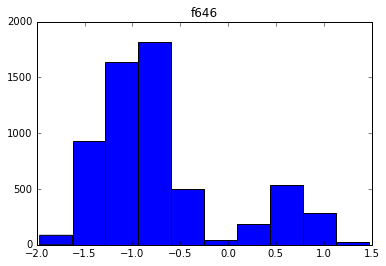

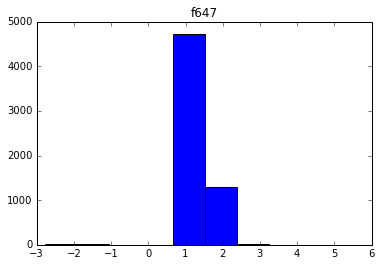

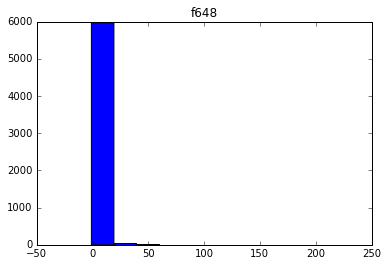

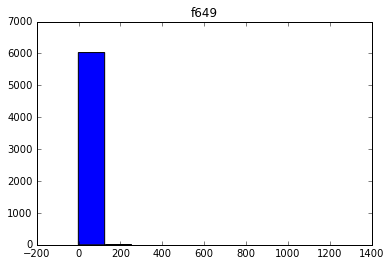

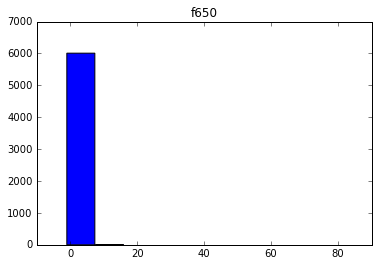

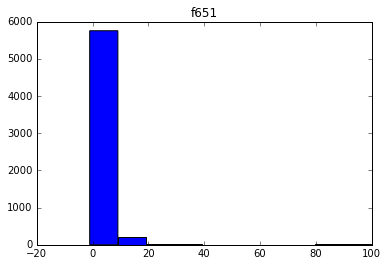

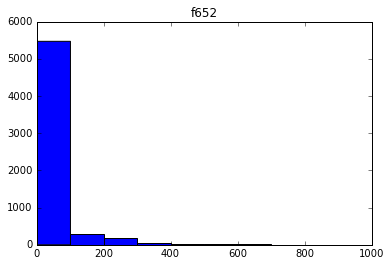

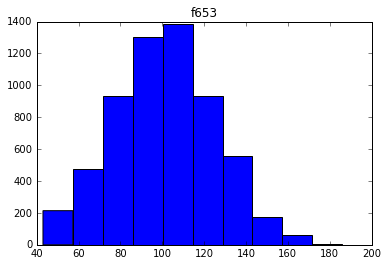

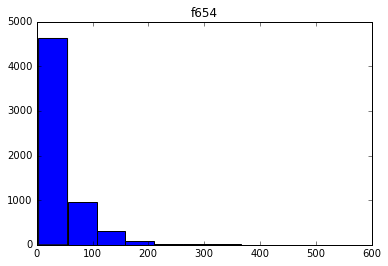

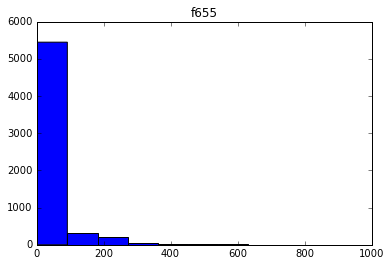

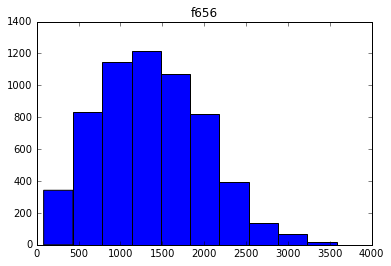

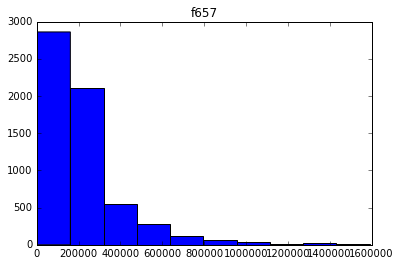

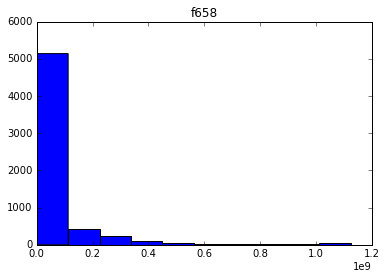

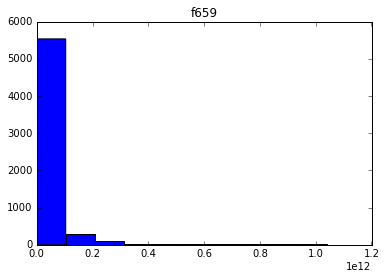

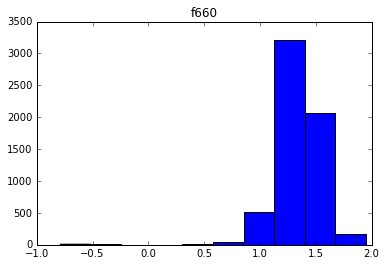

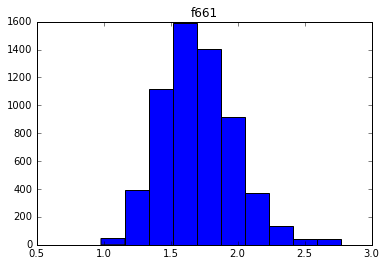

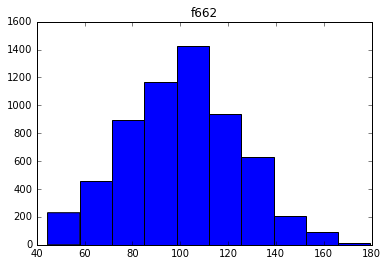

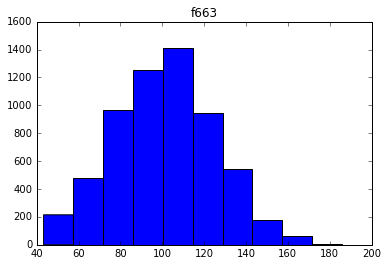

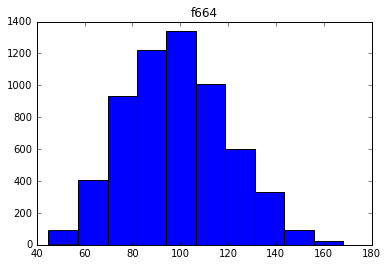

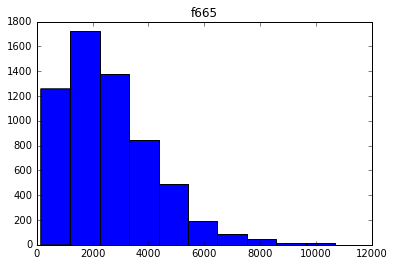

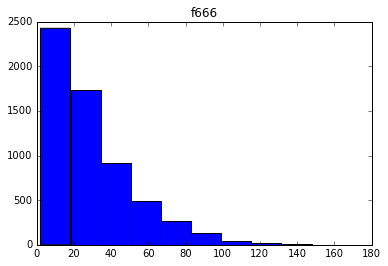

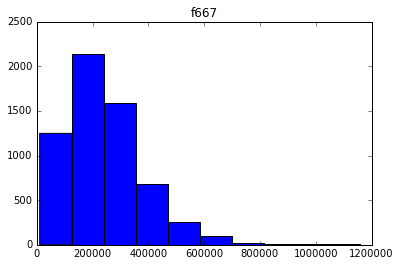

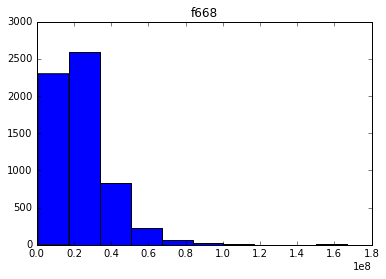

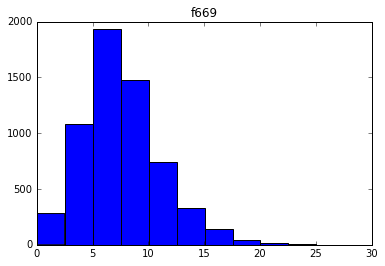

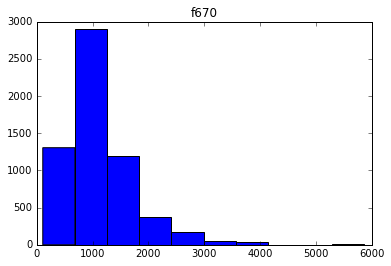

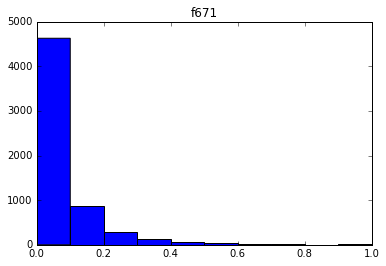

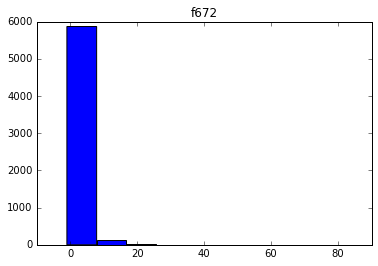

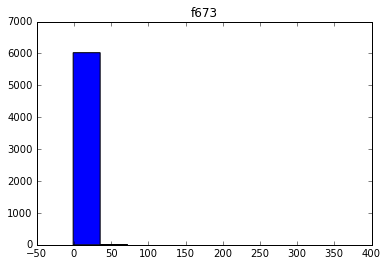

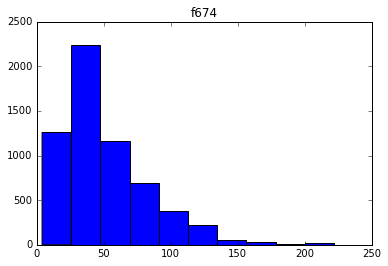

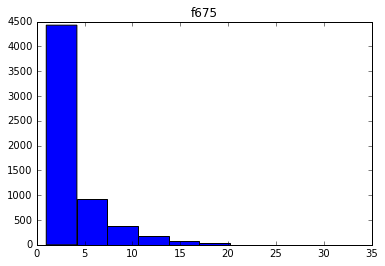

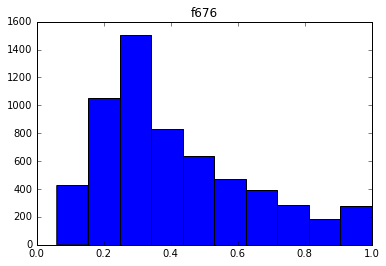

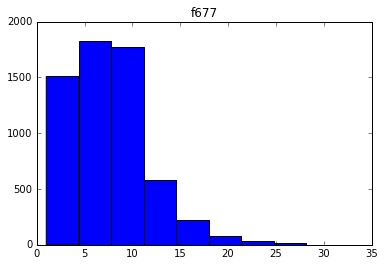

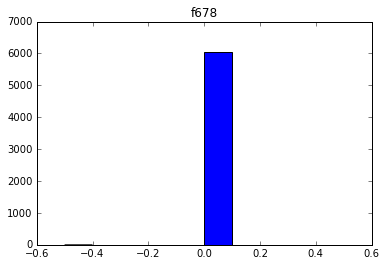

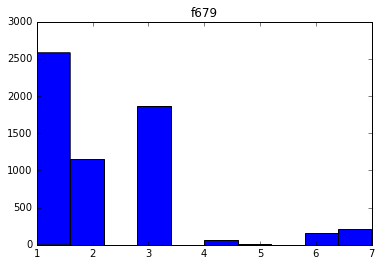

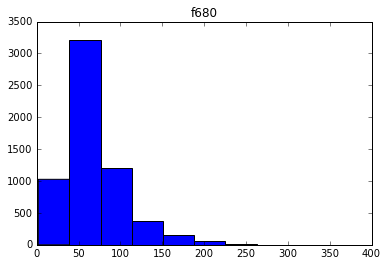

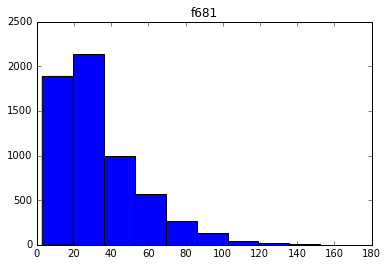

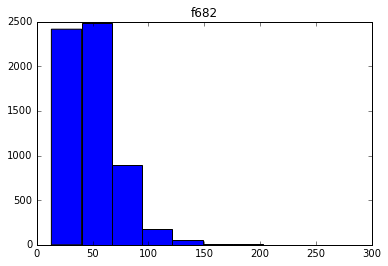

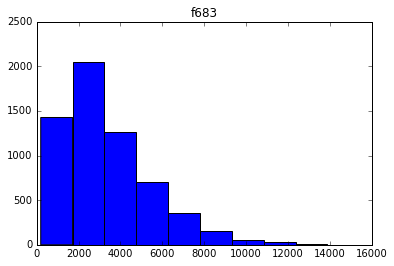

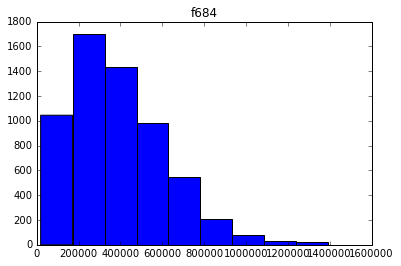

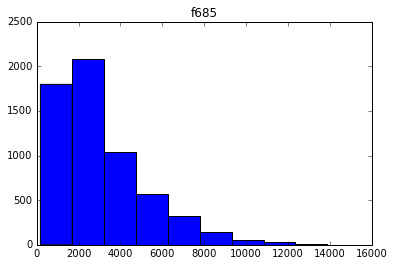

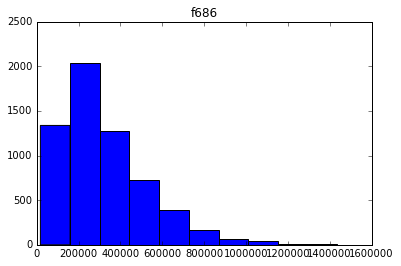

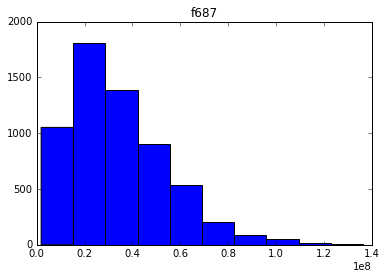

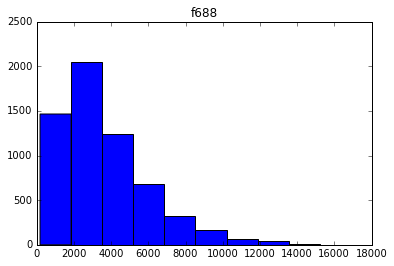

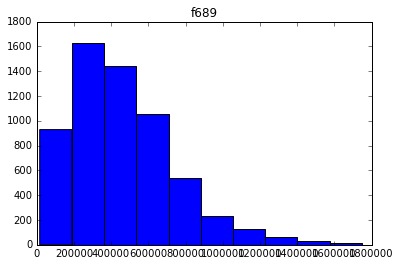

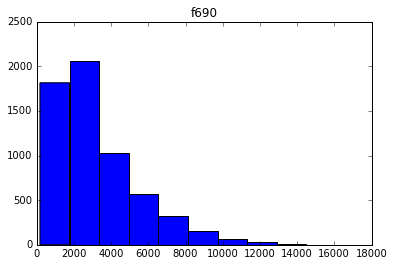

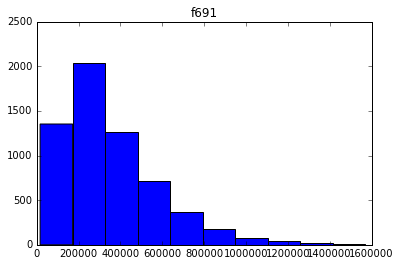

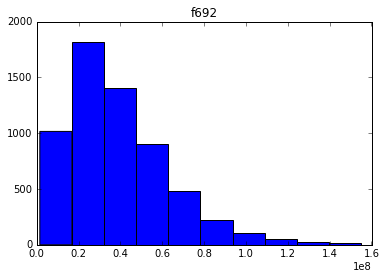

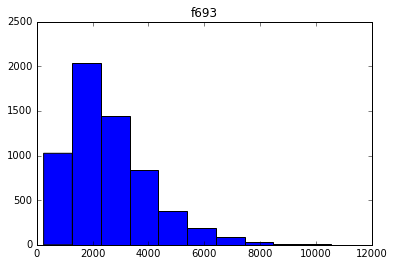

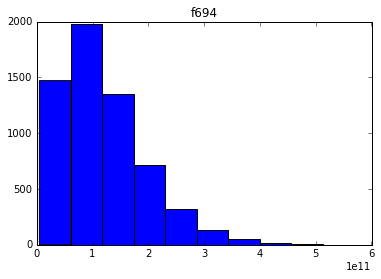

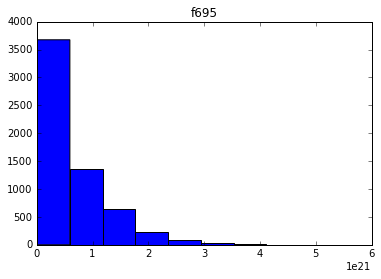

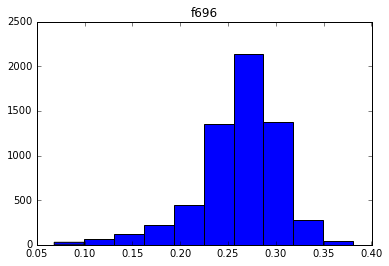

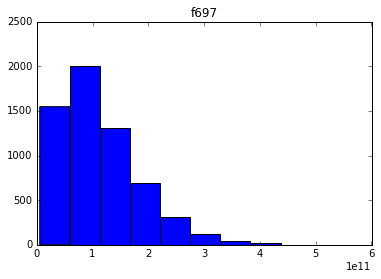

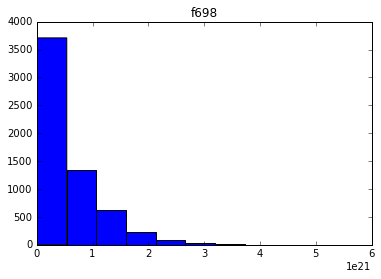

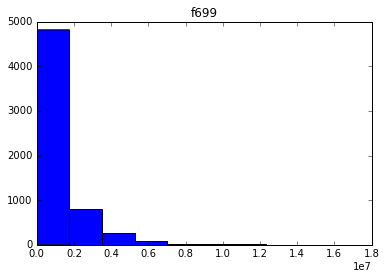

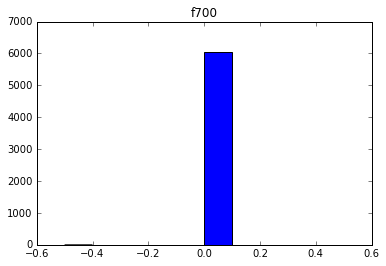

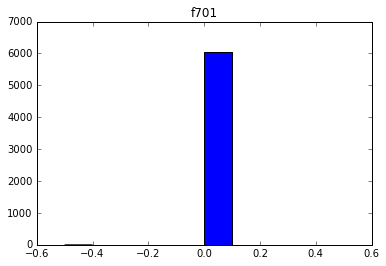

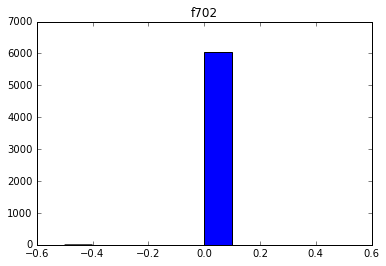

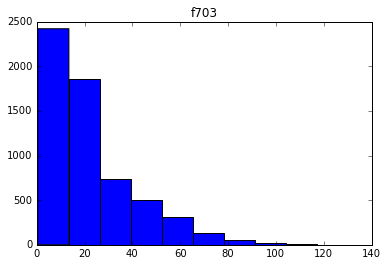

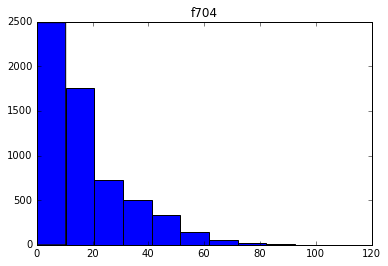

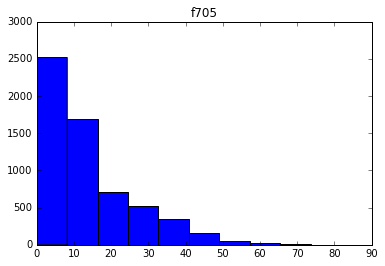

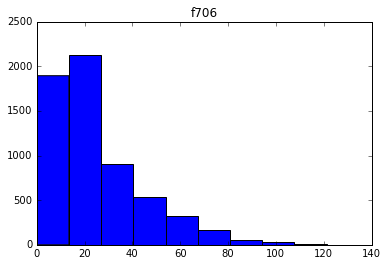

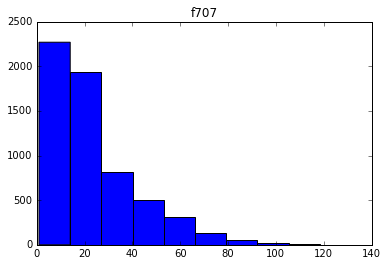

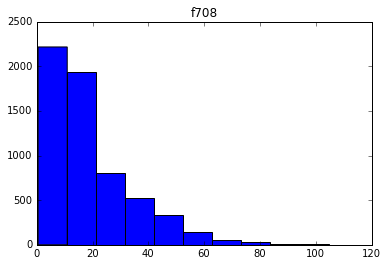

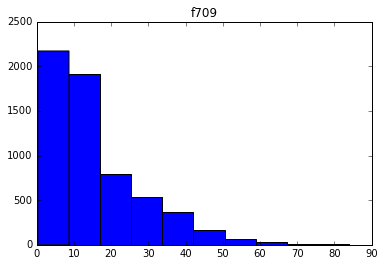

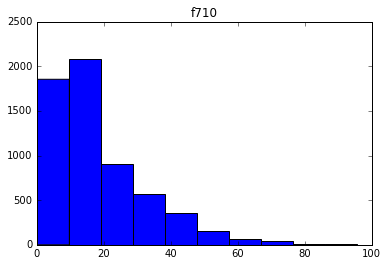

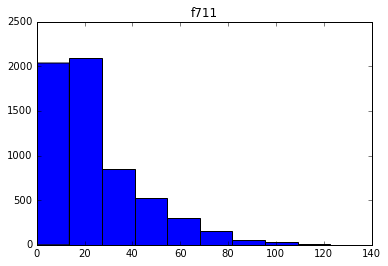

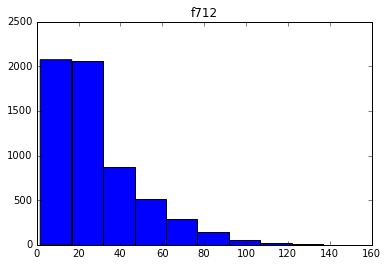

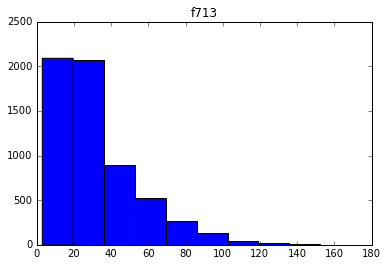

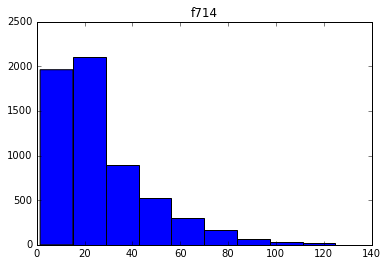

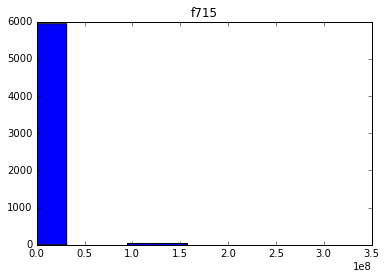

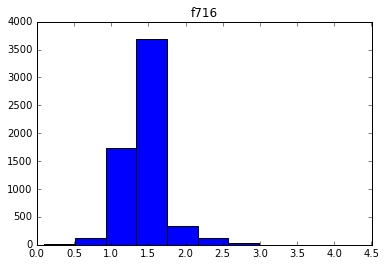

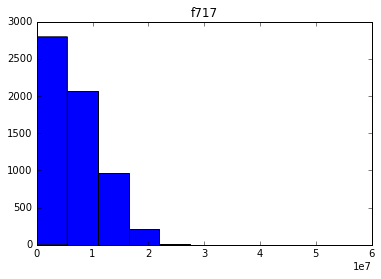

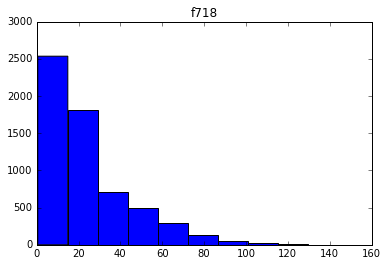

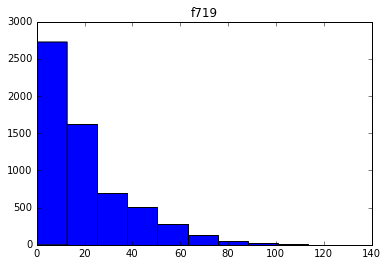

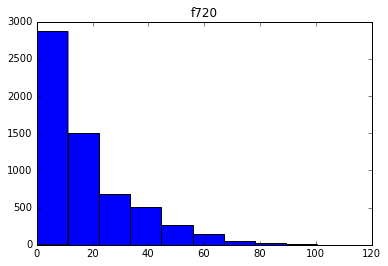

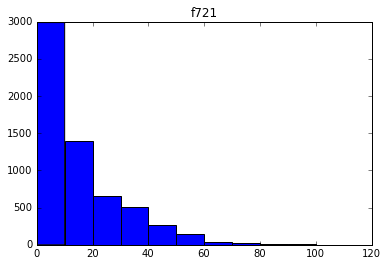

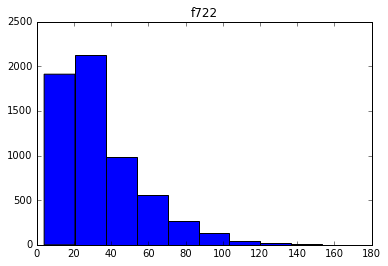

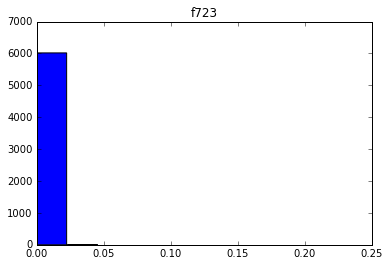

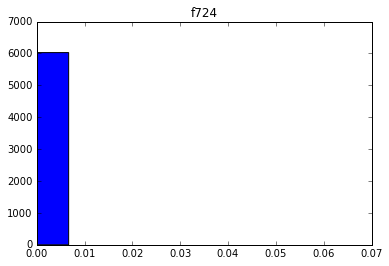

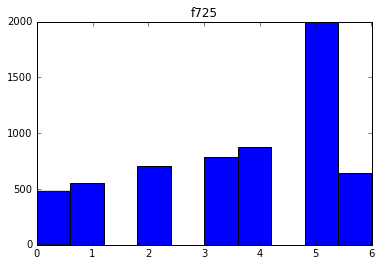

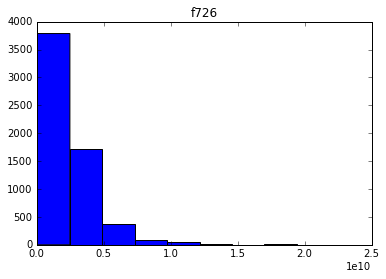

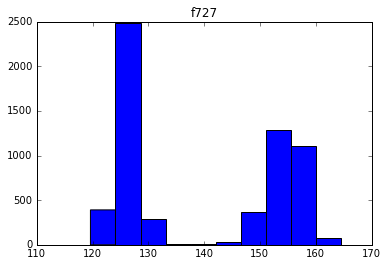

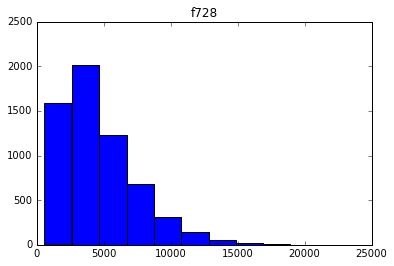

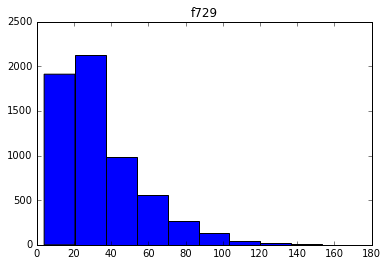

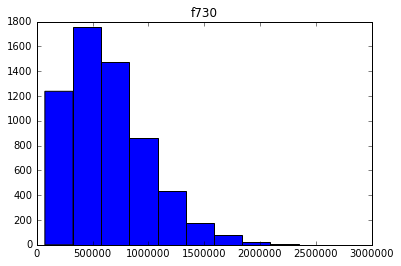

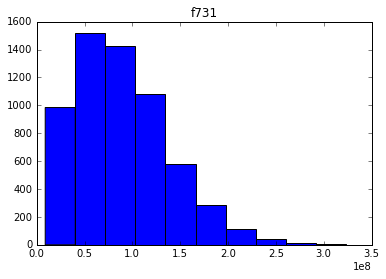

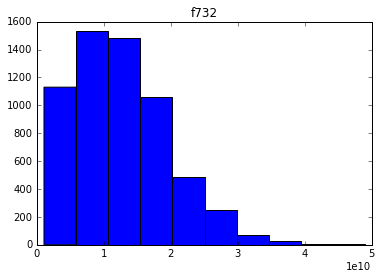

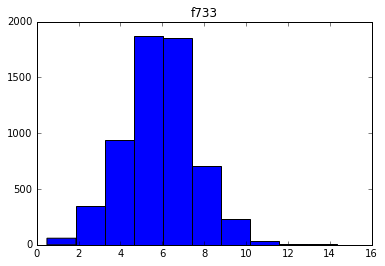

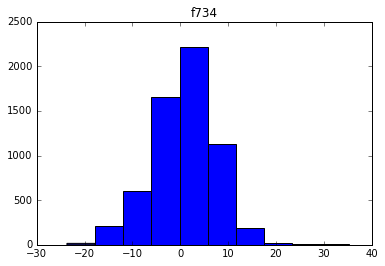

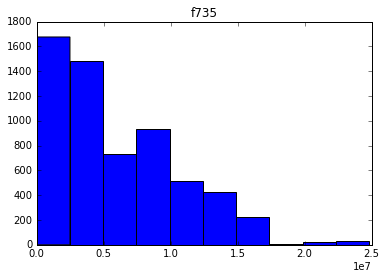

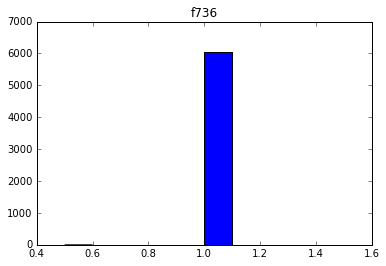

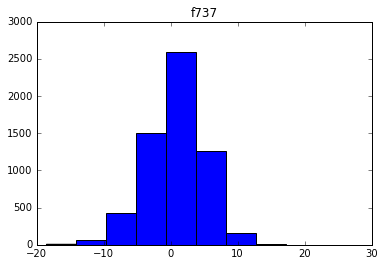

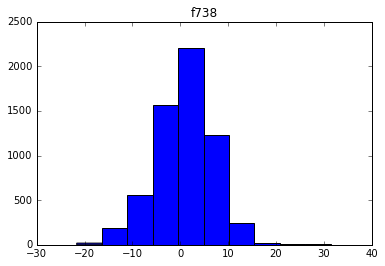

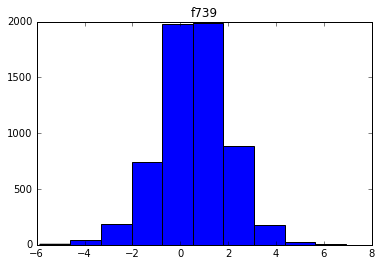

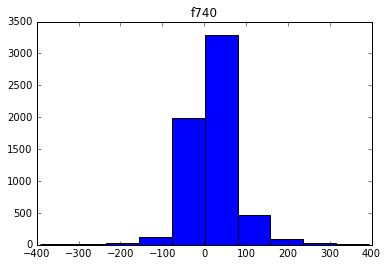

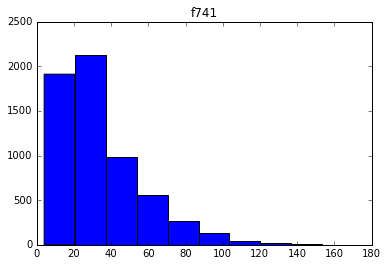

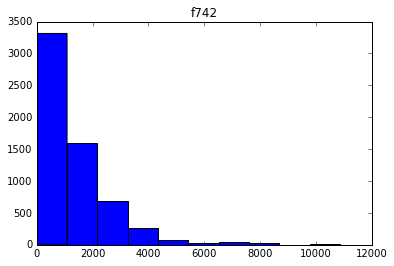

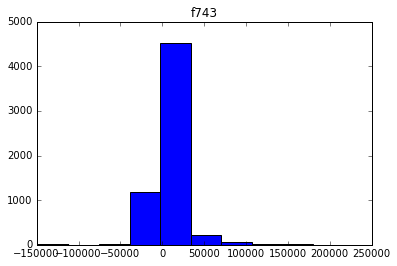

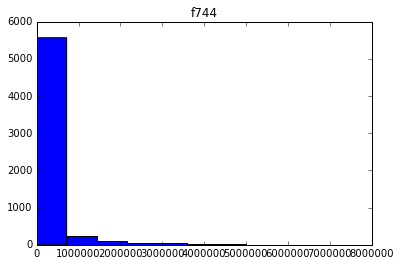

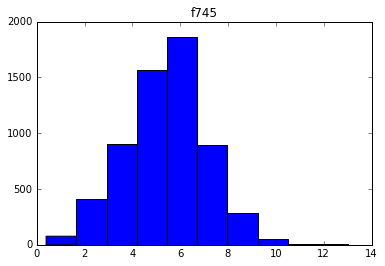

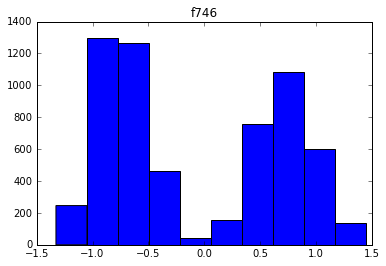

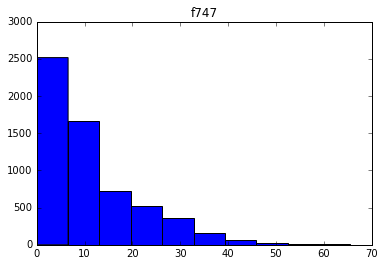

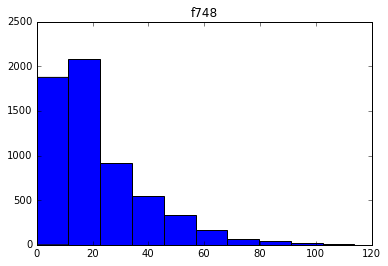

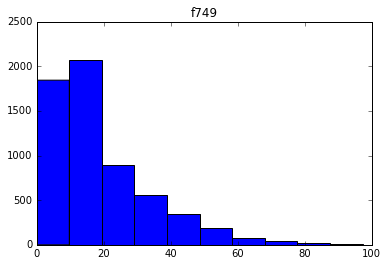

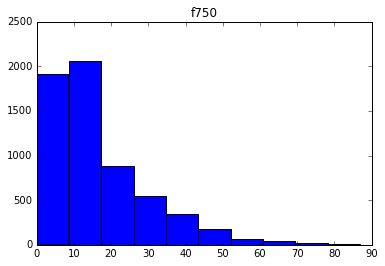

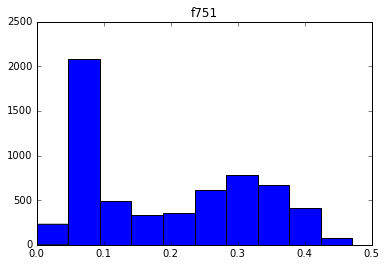

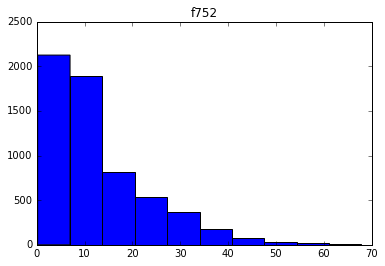

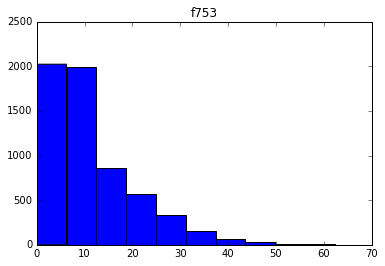

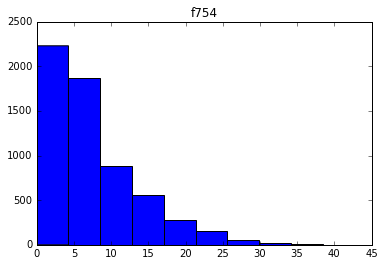

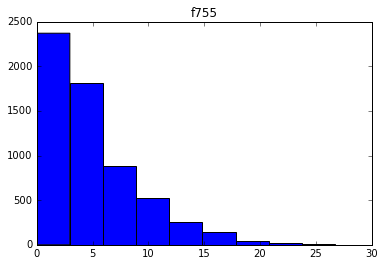

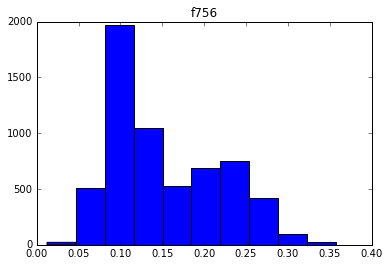

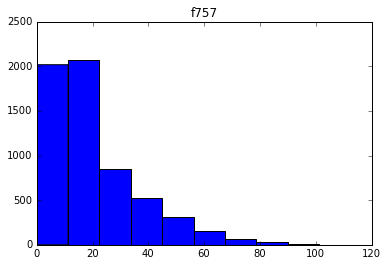

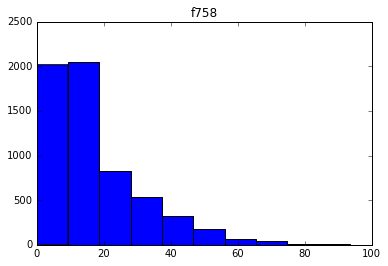

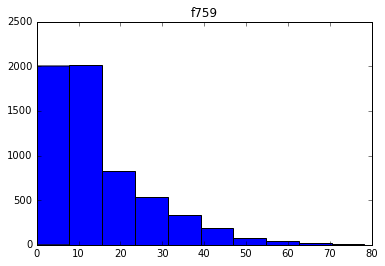

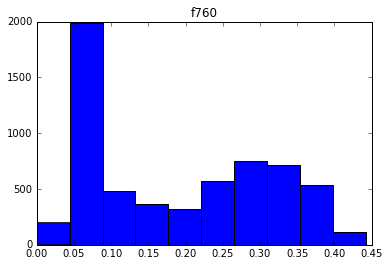

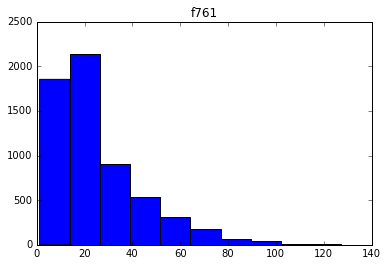

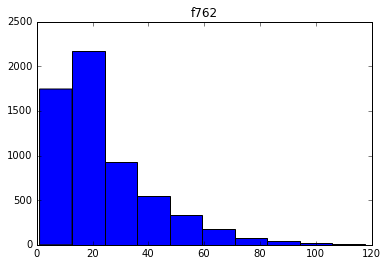

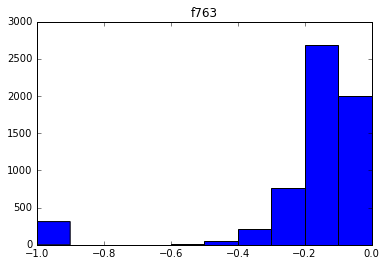

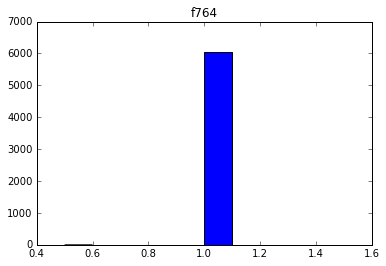

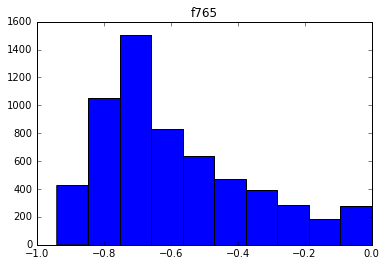

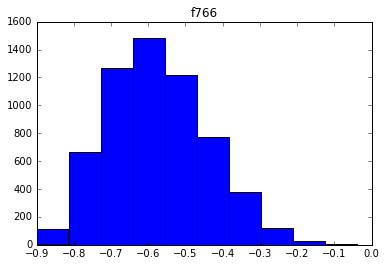

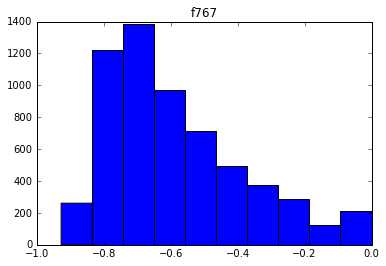

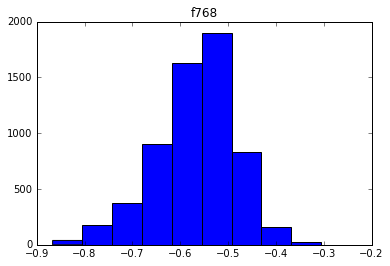

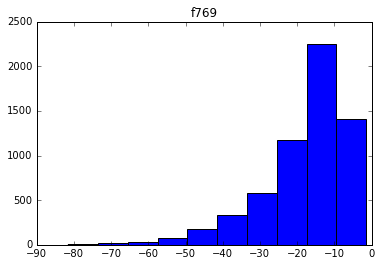

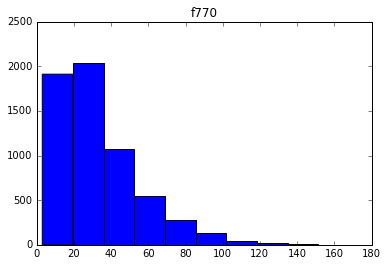

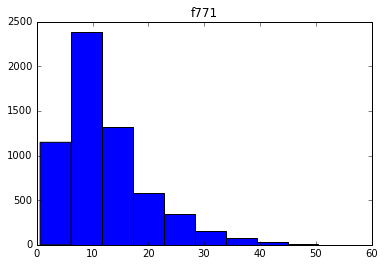

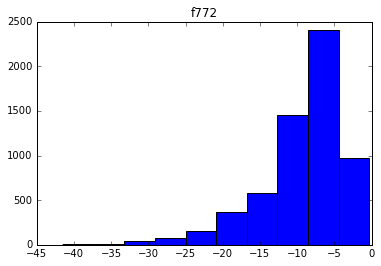

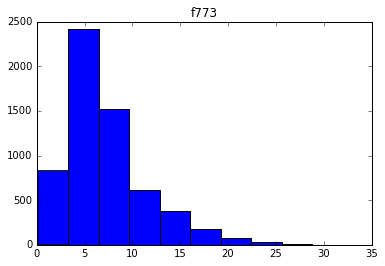

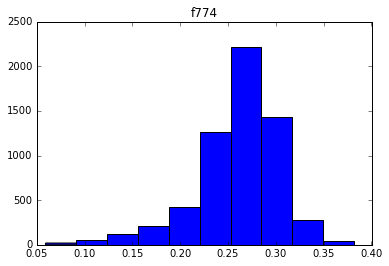

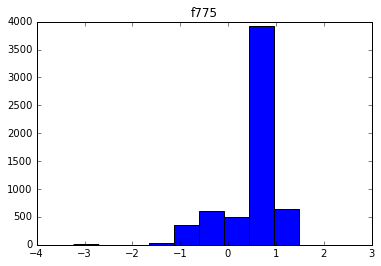

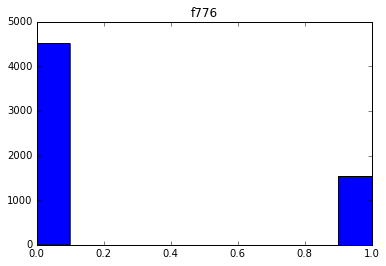

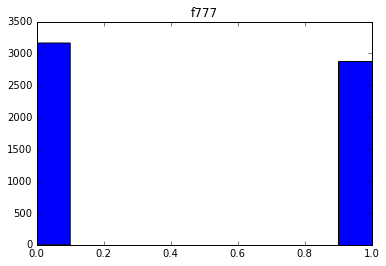

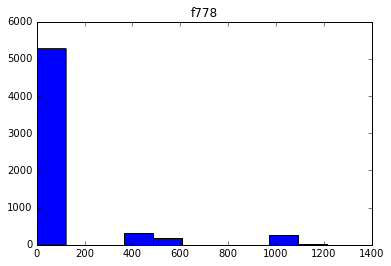

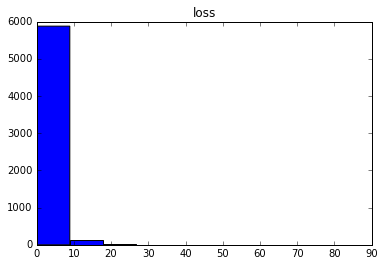

In [122]:
# histogram of columns

for c in trainset.columns:
    plt.subplot().hist(trainset[c])
    plt.title(c)
    plt.show()

In [123]:
#ISIQR Rule
# range for loss is 0 to 100
r1=np.percentile(trainset['loss'],25)
r2=np.percentile(trainset['loss'],50)
r3=np.percentile(trainset['loss'],75)

iqr= r3-r1
print iqr


0.0


In [124]:
#range 
range_lower = 50 - 1.5*iqr
range_upper = 50 + 1.5*iqr
loss_outliers ={}

j=0
for i in np.nditer(trainset['loss']):
    if((i>range_upper)|(i<range_lower)):
        loss_outliers[j]=i
        j=j+1        
        
print 'There are ', j, ' outliers for loss'




There are  6049  outliers for loss


In [125]:


#response 
response=unicode('loss')

#features
features = data_hex.names

#find indexs of response variable
for idx, feature in enumerate(features):
    if feature == response:
        idx_response = idx
        
#number of features
num_features_all = len(features)


In [126]:
data_hex[response]

H2OFrame with 6049 rows and 1 columns: 
   loss
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0


In [127]:
print features

[u'id', u'f1', u'f2', u'f3', u'f4', u'f5', u'f6', u'f7', u'f8', u'f9', u'f10', u'f13', u'f14', u'f15', u'f16', u'f17', u'f18', u'f19', u'f20', u'f21', u'f22', u'f23', u'f24', u'f25', u'f26', u'f27', u'f28', u'f29', u'f30', u'f31', u'f32', u'f33', u'f34', u'f35', u'f36', u'f37', u'f38', u'f39', u'f40', u'f41', u'f42', u'f43', u'f44', u'f45', u'f46', u'f47', u'f48', u'f49', u'f50', u'f51', u'f52', u'f53', u'f54', u'f55', u'f56', u'f57', u'f58', u'f59', u'f60', u'f61', u'f62', u'f63', u'f64', u'f65', u'f66', u'f67', u'f68', u'f69', u'f70', u'f71', u'f72', u'f73', u'f74', u'f75', u'f76', u'f77', u'f78', u'f79', u'f80', u'f81', u'f82', u'f83', u'f84', u'f85', u'f86', u'f87', u'f88', u'f89', u'f90', u'f91', u'f92', u'f93', u'f94', u'f95', u'f96', u'f97', u'f98', u'f99', u'f100', u'f101', u'f102', u'f103', u'f104', u'f105', u'f106', u'f107', u'f108', u'f109', u'f110', u'f111', u'f112', u'f113', u'f114', u'f115', u'f116', u'f117', u'f118', u'f119', u'f120', u'f121', u'f122', u'f123', u'f124', 

In [128]:
#remove response
features.remove(response)
# number of resulting features
num_features = len(features)

In [129]:
print num_features_all
print num_features

771
770


In [149]:
#PCA-Pricipal Component Analysis
# define parameter for PCA

params_pca ={'x': data_hex[features],'k':10,'transform':'NORMALIZE','seed': 1234}

#pca model
pca_model= h2o.prcomp(**params_pca)
#resulting matrix of pca
pca_matrix = pca_model.predict(data_hex[features])



pca Model Build Progress: [##################################################] 100%


In [131]:
#Merge the resulting matrix  and the response column

# pull out the  resulting matrix from h2o
pca_df = pca_matrix.as_data_frame()

#pull out the response column from h20
col_response= data_hex[response].as_data_frame()

#combine them with pandas

data_pca_df = pd.concat([col_response, pca_df],axis = 1)

#generate dictionary from the combined data frame
temp_dic = {}
temp_keys = list(data_pca_df.keys())
for key in temp_keys:
    temp_data = list( data_pca_df[key].values)
    temp_dic.update({key:temp_data})
    
#transform the combined data frame into h2o
data_pca_hex = h2o.H2OFrame(temp_dic,column_names = temp_keys) 





Parse Progress: [##################################################] 100%
Uploaded py05629b11-de6c-4156-880e-4086654cff75 into cluster with 6,049 rows and 11 cols


In [132]:
# new features are a result of pca matrix
features_pca = data_pca_hex.names

#find indec of response varaible
for idx, feature in enumerate (features_pca):
    if feature == response:
        idx_response_pca = idx
        
#remove response
features_pca.remove(response)

#count number of features
num_features_pca = len(features_pca)

In [133]:
#print out summary of data set
data_pca_hex.summary()


Column-by-Column Summary:



loss           PC8             PC9             PC2             PC3             PC1             PC6             PC7             PC4             PC5             PC10
-------------  -------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------
type           int            real            real            real            real            real            real            real            real            real            real
mins           0.0            -2.22280066287  -1.76016627129  -3.70635916953  -4.92407306908  -4.24085508886  -4.24737684361  -2.15907986971  -4.96629333598  -3.00095385185  -2.30704173947
maxs           89.0           3.96826484863   2.58576030537   6.77922268043   6.46674673071   6.87140965757   2.43243403239   3.95508829541   3.03682625776   3.73257647085   3.47324861079
sigma          3.65143213953  0.745674705221  0.707548436922  1.69132648542   1.44429075358   2.13750937075   0.874950614567  0.783552755176  1.08027755254   1.03746089324   0.636821530027
zero_count     5412           0               0               0               0               0               0               0               0               0               0
missing_count  0              0               0               0               0               0               0               0               0               0               0

In [134]:
#convert data type to factor
data_pca_hex[response] = data_pca_hex[response].asfactor()

#summary
data_pca_hex.summary()


Column-by-Column Summary:



loss           PC8             PC9             PC2             PC3             PC1             PC6             PC7             PC4             PC5             PC10
-------------  -------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------
type           enum           real            real            real            real            real            real            real            real            real            real
mins           0.0            -2.22280066287  -1.76016627129  -3.70635916953  -4.92407306908  -4.24085508886  -4.24737684361  -2.15907986971  -4.96629333598  -3.00095385185  -2.30704173947
maxs           42.0           3.96826484863   2.58576030537   6.77922268043   6.46674673071   6.87140965757   2.43243403239   3.95508829541   3.03682625776   3.73257647085   3.47324861079
sigma          3.15199769372  0.745674705221  0.707548436922  1.69132648542   1.44429075358   2.13750937075   0.874950614567  0.783552755176  1.08027755254   1.03746089324   0.636821530027
zero_count     5412           0               0               0               0               0               0               0               0               0               0
missing_count  0              0               0               0               0               0               0               0               0               0               0

In [135]:
#shuffle records 

#a vector with uniformly distributed numbers betweenn 0 and 1
random_idx = data_pca_hex[response].runif(seed = 1234)



In [136]:
#data split 
train_pca_hex = data_pca_hex [random_idx < 0.7]
test_pca_hex = data_pca_hex [random_idx >= 0.7]




In [137]:
# holdouts splits

#vector uniformly distributed numbers
random_idx = train_pca_hex[response].runif(seed = 1234)

#split data
train_holdout_pca_hex = train_pca_hex[ random_idx < 0.8]
validation_holdout_pca_hex = train_pca_hex [ random_idx >= 0.8]



In [138]:
#GBM model development
#range of grid search

range_ntrees = np.arange(1500,2100,100)
range_depth = np.arange(1,3,1)
range_min_rows = np.arange(10,21, 1)

#sampling number
num_models = 5

In [139]:
#define empty list to store the models
gbm_models = []

#loop over
for id_model in range(num_models):
    
    #choose mode parameters
    ntree = random.sample(range_ntrees, 1)[0]
    depth = random.sample(range_depth,1)[0]
    min_rows= random.sample(range_min_rows, 1)[0]
    
    # build model
    params_model = {'x': features_pca, 'y': response, 'training_frame': train_holdout_pca_hex,
                   'validation_frame': validation_holdout_pca_hex,
                   'ntrees':ntree,
                   'max_depth': depth,
                   'learn_rate': 0.005
                   }
    
    gbm_model=h2o.gbm(**params_model)
    
    #store model
    gbm_models.append(gbm_model)
    


gbm Model Build Progress: [##################################################] 100%

gbm Model Build Progress: [##################################################] 100%

gbm Model Build Progress: [##################################################] 100%

gbm Model Build Progress: [##################################################] 100%

gbm Model Build Progress: [##################################################] 100%


In [140]:
#Determine the best model based on teh highest accuracy
best_acc = 0
#loop
for id_model, model in enumerate (gbm_models):
    
    #predicted and actual values (in H2O)
    y_predict = model.predict(validation_holdout_pca_hex)[0]
    y_actual = validation_holdout_pca_hex[response]
    
    #transform values into Pandas
    y_predict_array = y_predict.as_data_frame().iloc[:,0].values
    y_actual_array  = y_actual.as_data_frame().iloc[:,0].values
        
    #calculate accuracy
    accuracy = metrics.accuracy_score(y_actual_array, y_predict_array)
    
    #compare with best_acc and index
    if accuracy > best_acc:
        best_acc = accuracy
        best_acc_id = id_model
        
#store the best model
best_model=gbm_models[best_acc_id]

#print result
print best_acc

0.904328018223


In [141]:
#load and show the parameters from the best model

list_model_params = list (best_model.params.keys())
bmps = best_model.params.items()

best_ntree = bmps[list_model_params.index('ntrees')][1]['actual']
best_depth = bmps[list_model_params.index('max_depth')][1]['actual']
best_min_rows = bmps[list_model_params.index('min_rows')][1]['actual']

In [142]:
#rebuild gbm model using best parameters
start_time=time.time()

#model parameters
params_best_model = {'x': features_pca,
                    'y': response,
                    'training_frame': train_pca_hex,
                    'validation_frame': test_pca_hex,
                    'ntrees':best_ntree,
                    'max_depth': best_depth,
                    'min_rows': best_min_rows,
                    'learn_rate':0.005
                    }

#build model
rebuild_gbm_model = h2o.gbm(**params_best_model)

#calculate elapsed time
elapsed_time = time.time()-start_time

#print out elapsed time in seconds
print round(elapsed_time,0)


gbm Model Build Progress: [##################################################] 100%
338.0


In [143]:
# predict and actual values (in H2O)
y_predict =  rebuild_gbm_model.predict(test_pca_hex)[0]
y_actual = test_pca_hex[response]

#transform values into Pandas
y_predict_array =  y_predict.as_data_frame().iloc[:,0].values
y_actual_array = y_actual.as_data_frame().iloc[:,0].values

#calculate accuracy
accuracy_rebuild = metrics.accuracy_score(y_actual_array,y_predict_array)

#print out the accuracy
print round(accuracy_rebuild, 3)

0.893


In [144]:
#slipt data into train and test data sets
random_idx = data_hex[response].runif(seed =1234)
train_hex = data_hex[random_idx < 0.7]
test_hex = data_hex[random_idx >= 0.7]

#convert data type to factor
data_hex[response] = data_hex[response].asfactor()

#start measuring time
start_time = time.time()

#model parameters
params_full_model ={'x': features,
                   'y':response,
                   'training_frame': train_hex,
                   'validation_frame': test_hex,
                   'ntrees': best_ntree,
                   'max_depth':best_depth,
                   'min_rows':best_min_rows,
                   'learn_rate': 0.005
                   }

#build model
gbm_full_model=h2o.gbm(**params_full_model)

#calculate elapsed time
elapsed_time_full = time.time() - start_time

#print out elapsed time in secounds
print round(elapsed_time_full,0)

#predicted and actual values (in H2O)
y_predict = gbm_full_model.predict(test_hex)[0]
y_actual = test_hex[response]

#transform values into Pandas
y_predict_array = y_predict.as_data_frame().iloc[:,0].values
y_actual_array = y_actual.as_data_frame().iloc[:,0].values

#calculate accuracy
accuracy_full = metrics.accuracy_score(y_actual_array,y_predict_array)

#print out the accuracy
print round (accuracy_full, 3)


gbm Model Build Progress: [##################################################] 100%
83261.0
0.895


In [152]:
#save gbm model
file_path = 'C:\\Users\\Administrator\\Desktop\\Loan Default Prediction\\final_gbm_model'

params_save = {'model': rebuild_gbm_model,
              'path': file_path,
              'force': True}

h2o.save_model(**params_save)

u'C:\\Users\\Administrator\\Desktop\\Loan Default Prediction\\final_gbm_model\\GBM_model_python_1469840360997_14'